<a href="https://colab.research.google.com/github/grinaldo-oliveira/IC009/blob/main/Capitulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===================================
# 📌 Cell 1: Install Dependencies
# ===================================
!pip install -q numpy scikit-image scikit-learn opencv-python matplotlib pandas torch keras ultralytics reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.6 MB/s eta 0:00:00


In [ ]:
# ===================================
# 📌 Cell 2: Validate Imports & Versions
# ===================================
import importlib

# List of required libraries (module_name, alias, attr for version check)
libs = [
    ("numpy", "np", "__version__"),
    ("skimage", None, "__version__"),
    ("sklearn", None, "__version__"),
    ("cv2", None, "__version__"),
    ("matplotlib", None, "__version__"),
    ("pandas", "pd", "__version__"),
    ("torch", None, "__version__"),
    ("keras", None, "__version__"),
    ("ultralytics", None, "__version__")
]

status_report = {}

for lib, alias, ver_attr in libs:
    try:
        module = importlib.import_module(lib)
        if alias:
            globals()[alias] = module
        version = getattr(module, ver_attr, "N/A")
        status_report[lib] = f"✅ Success (v{version})"
    except Exception as e:
        status_report[lib] = f"❌ Failed: {str(e)}"


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# ===================================
# 📌 Cell 3: Final Environment Report
# ===================================
print("=== Environment Setup Report ===\n")
for lib, result in status_report.items():
    print(f"{lib:<15} : {result}")
print("\nSetup complete. If any ❌ are present, please re-run installation or check versions.")


=== Environment Setup Report ===

numpy           : ✅ Success (v2.0.2)
skimage         : ✅ Success (v0.25.2)
sklearn         : ✅ Success (v1.6.1)
cv2             : ✅ Success (v4.12.0)
matplotlib      : ✅ Success (v3.10.0)
pandas          : ✅ Success (v2.2.2)
torch           : ✅ Success (v2.8.0+cu126)
keras           : ✅ Success (v3.10.0)
ultralytics     : ✅ Success (v8.3.204)

Setup complete. If any ❌ are present, please re-run installation or check versions.


In [ ]:
# ===================================
# 📌 Cell 4: Mounting Drive
# ===================================

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/IC009/dataset/pascal_voc_2012

Mounted at /content/drive
/content/drive/MyDrive/IC009/dataset/pascal_voc_2012


Step 1/6 — Loading data.yaml and enumerating files...
Found 13690 image files and 13690 label files (train split).

100% match: all images have corresponding labels.
No CSV cache found — starting scan of images and labels.
Step 2/6 — Scanning 13690 images (single pass). Progress updates every 10%...)
  Scanning... 0% (1/13690)
  Scanning... 10% (1369/13690)
  Scanning... 20% (2738/13690)
  Scanning... 30% (4107/13690)
  Scanning... 40% (5476/13690)
  Scanning... 50% (6845/13690)
  Scanning... 60% (8214/13690)
  Scanning... 70% (9583/13690)
  Scanning... 80% (10952/13690)
  Scanning... 90% (12321/13690)
  Scanning... 100% (13690/13690)
Scan complete. Wrote CSV cache to ./image_analysis.csv with 13690 rows.
Validation OK: CSV has 13690 rows (matches image count).
Step 3/6 — Computing summary tables...


### Table 1 — Metrics per Image (min / max / mean)

,metric,min,max,mean
0,bounding_boxes_per_image,0,56,2.29
1,unique_classes_per_image,0,6,1.35
2,image_file_size_bytes,4464,108148,35727.90


Validation: Table 1 computed and displayed.
Computing Table 2 (per-class metrics)...


### Table 2 — Metrics per Class (ordered by class index; final row = ALL)

,class_index,class_name,num_images_with_>=1,total_bounding_boxes,mean_bbox_area_px2,median_bbox_area_px2,avg_img_width_px,avg_img_height_px,avg_bbox_w_h_ratio,pct_images_with_>1_instance,bbox_invalid_coord_count
0,0,aeroplane,582,808,48516.57,40257.0,493.66,347.97,2.50,19.59,0
1,1,bicycle,496,695,48130.34,25662.0,463.29,395.40,1.18,23.59,0
2,2,bird,665,1056,32983.95,14189.0,471.36,390.32,1.16,22.56,0
3,3,boat,425,854,24581.95,6585.0,477.90,373.12,2.05,43.06,0
4,4,bottle,646,1226,11704.69,2679.5,457.28,402.36,0.54,33.44,0
5,5,bus,372,537,54324.26,42630.0,484.17,374.60,1.39,29.57,0
6,6,car,1012,1988,24872.50,4369.0,481.11,373.43,1.69,40.71,0
7,7,cat,913,1034,86491.68,81124.5,466.17,395.45,1.20,11.06,0
8,8,chair,1108,2467,21841.60,10974.0,464.57,396.73,0.93,49.28,0
9,9,cow,270,638,30982.33,10881.0,481.19,376.56,1.24,54.81,0


Validation: Table 2 computed and displayed.
Step 4/6 — Creating histograms (displayed inline and saved for report)...


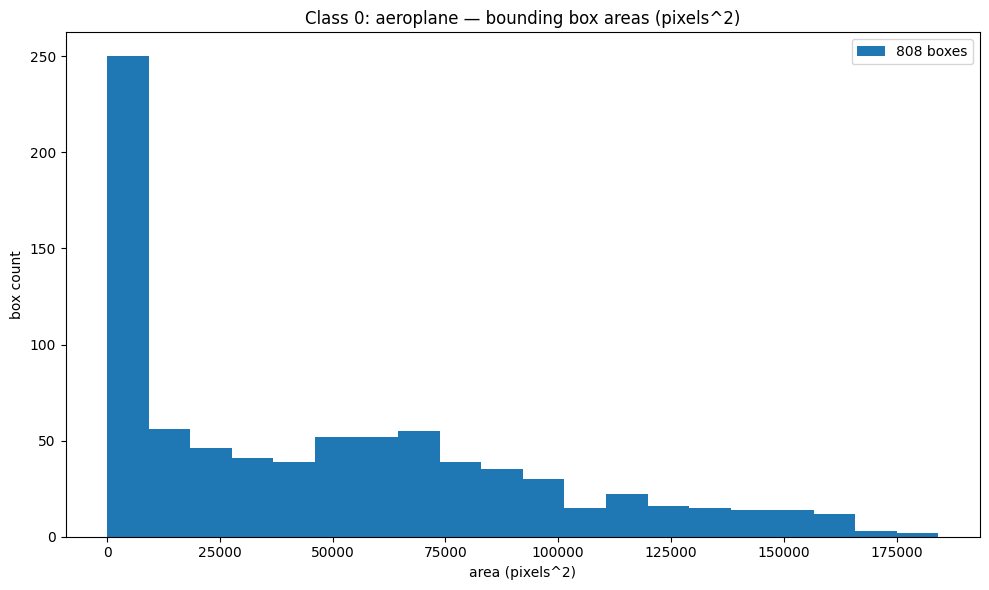

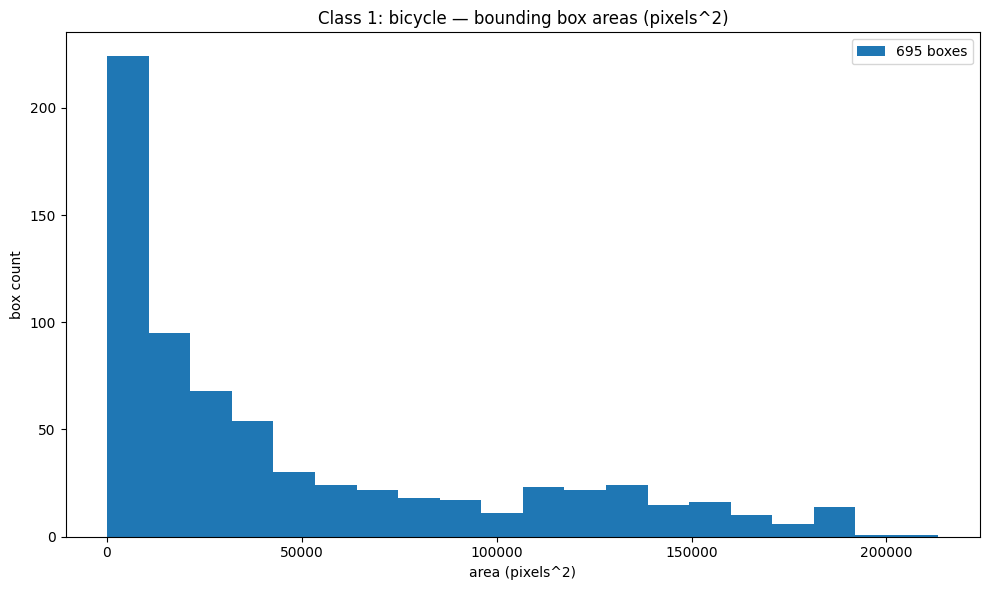

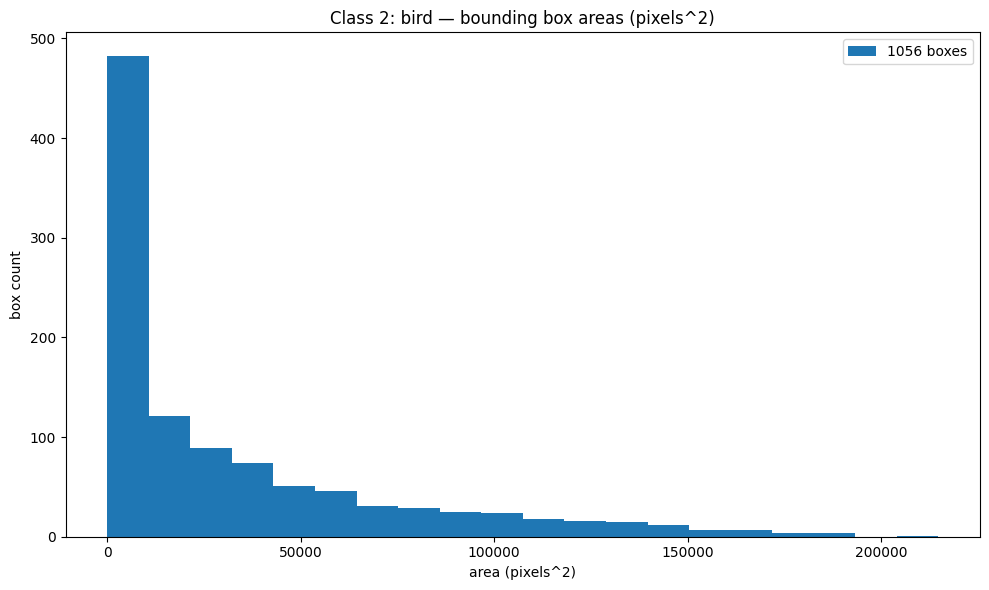

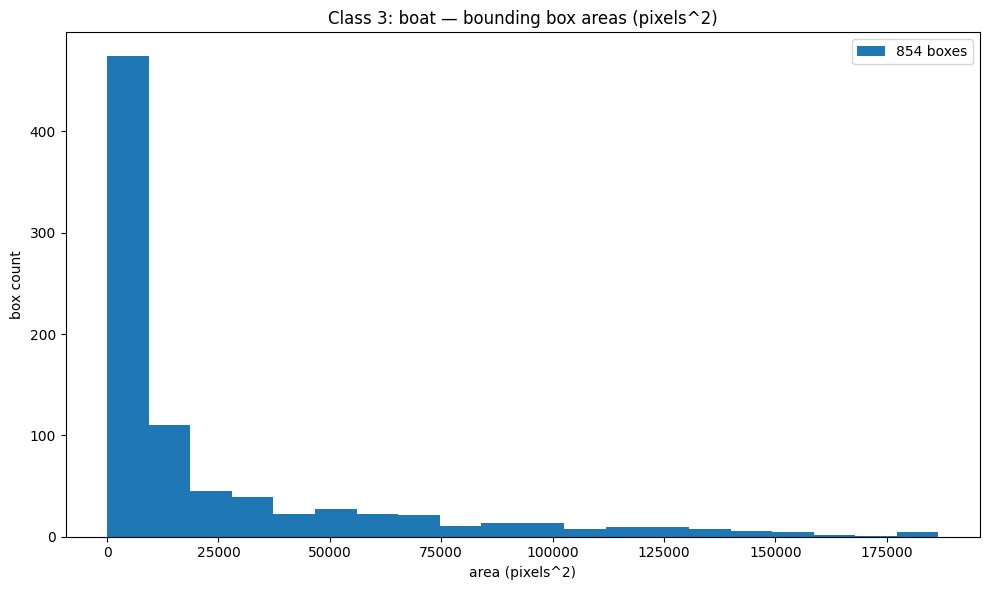

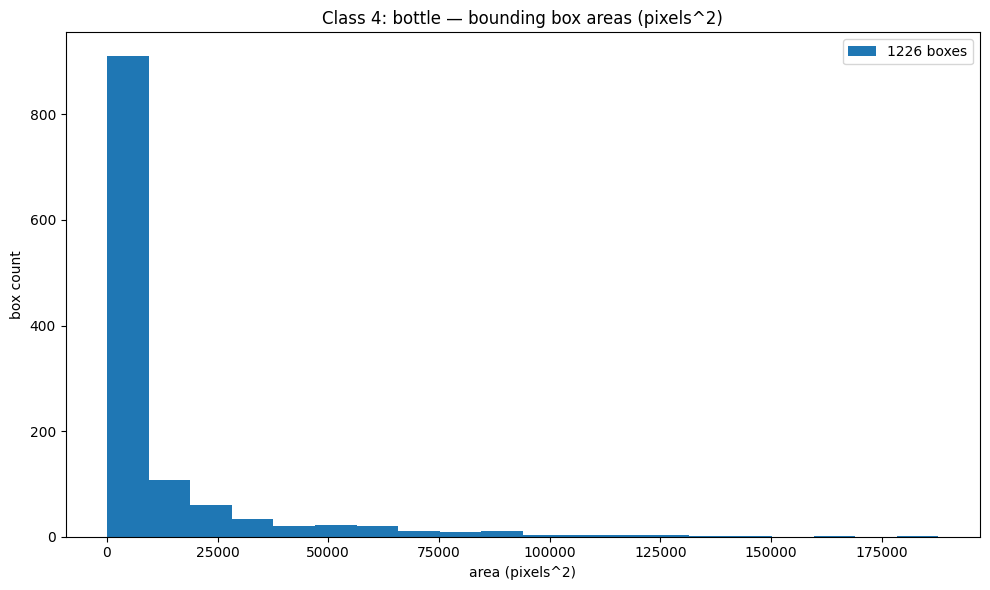

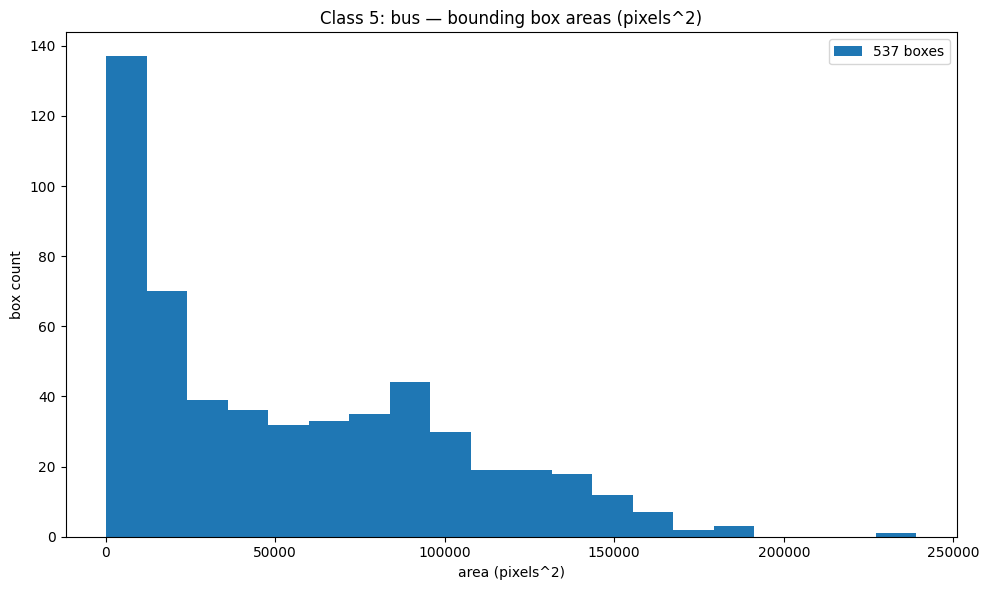

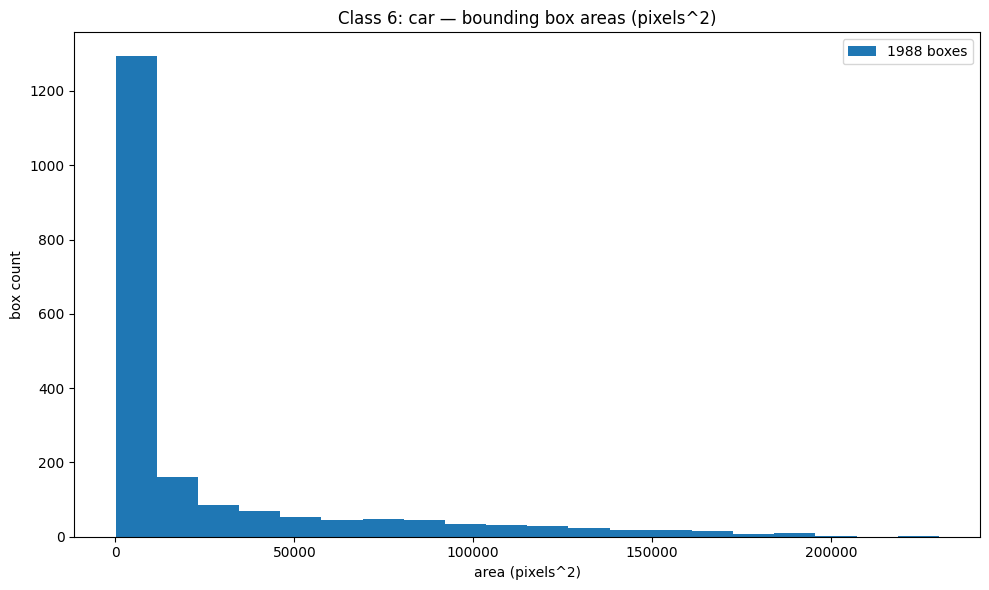

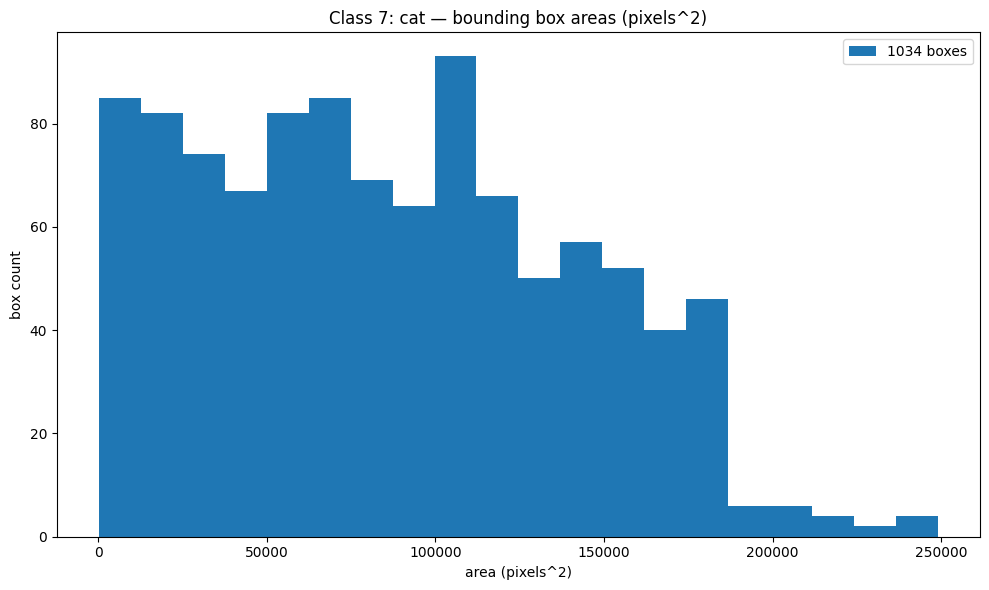

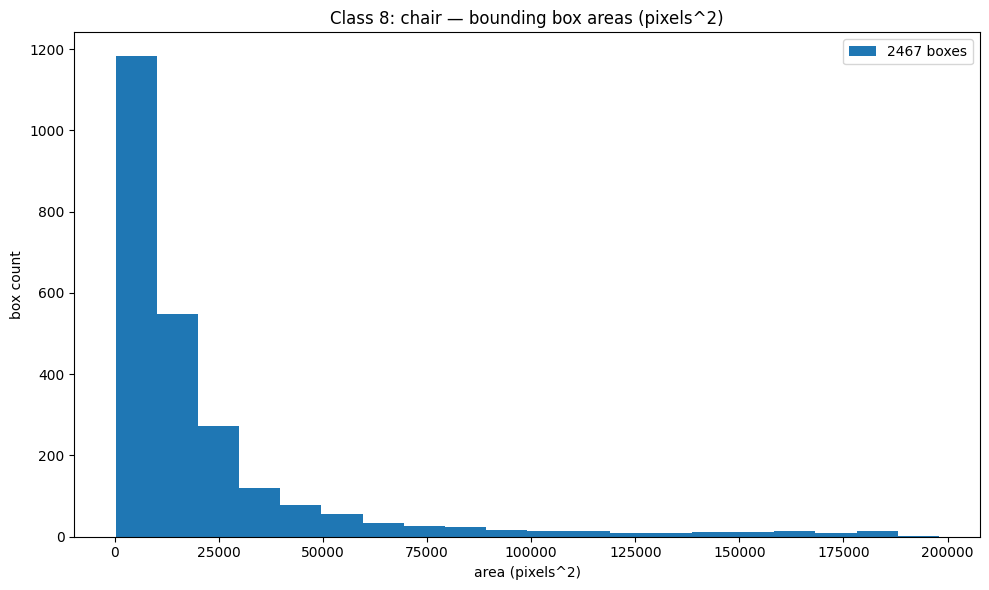

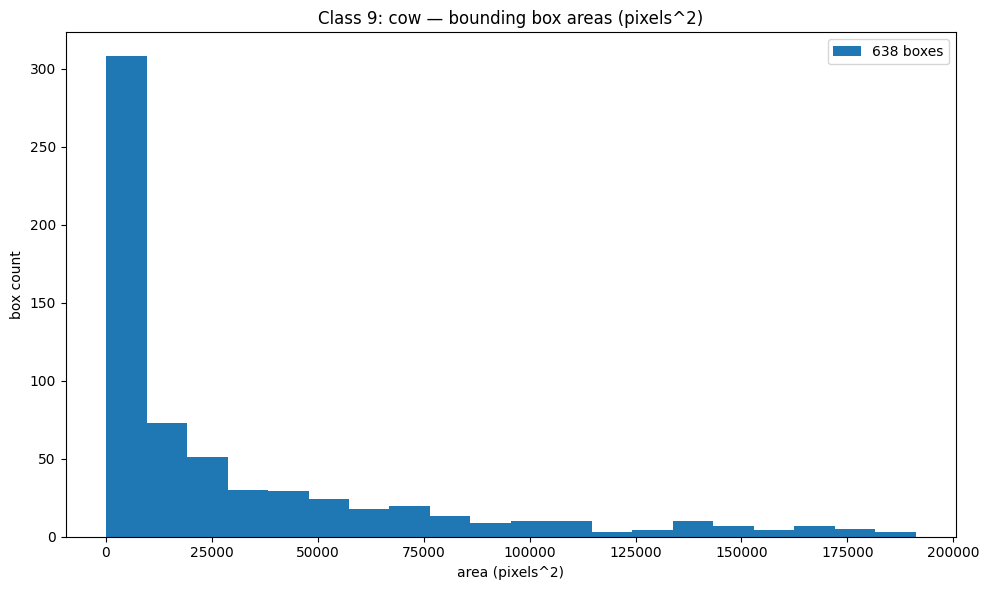

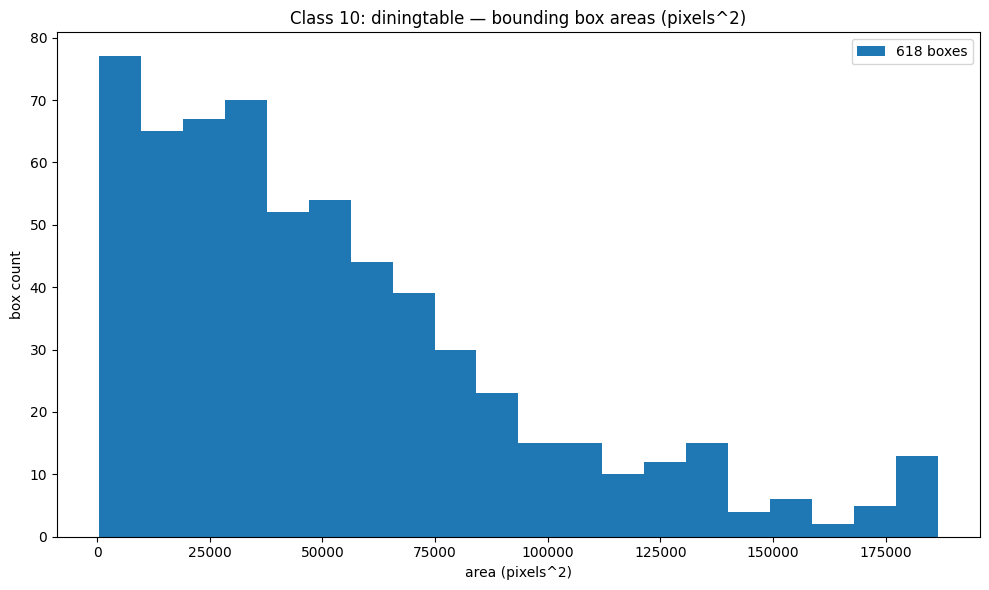

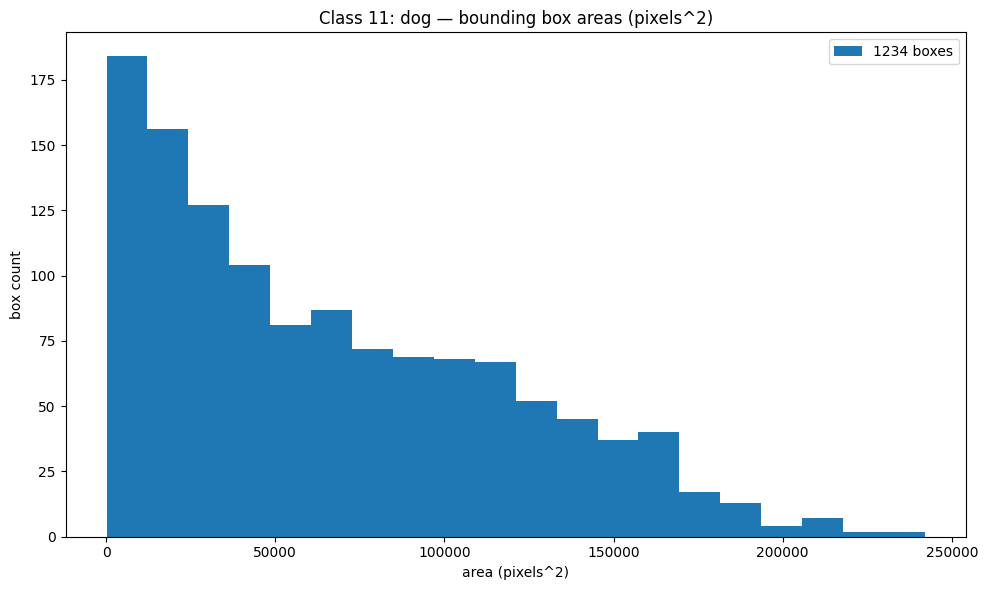

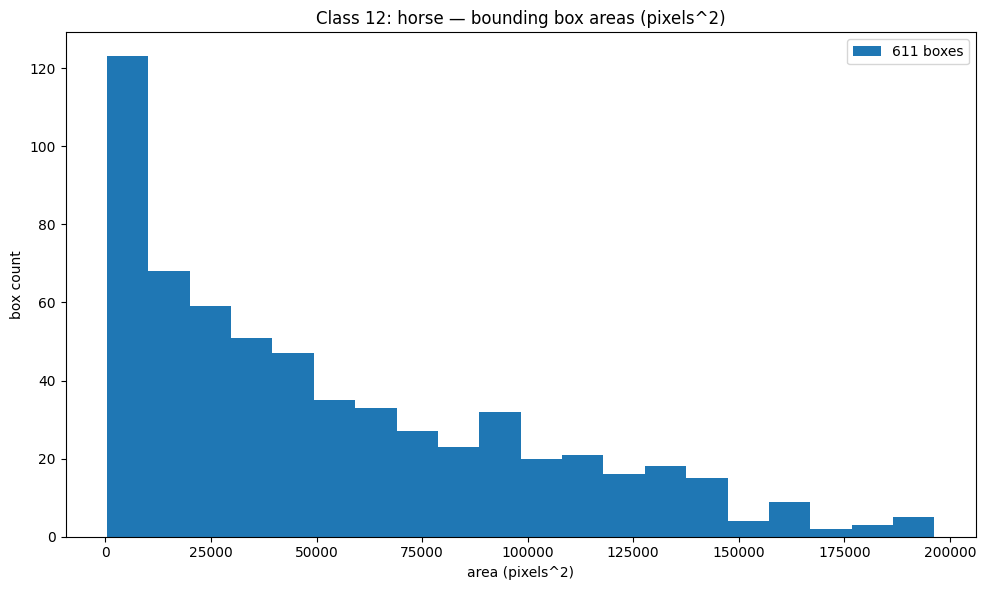

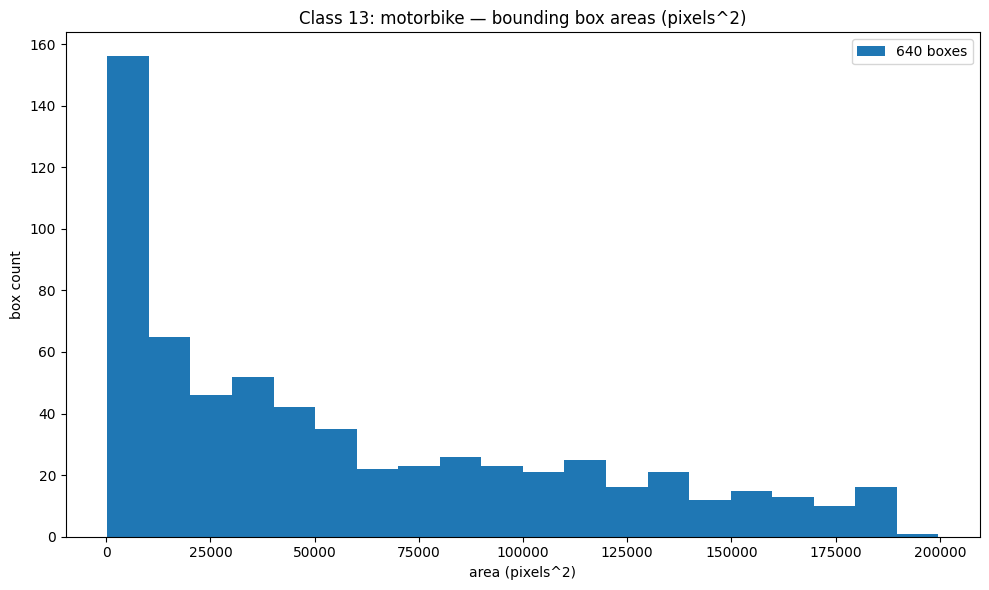

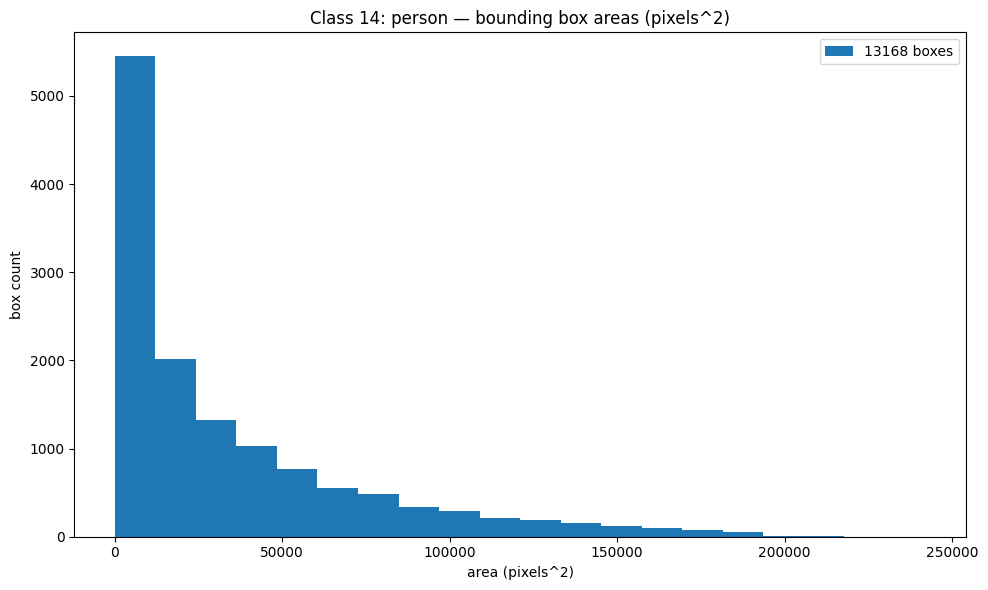

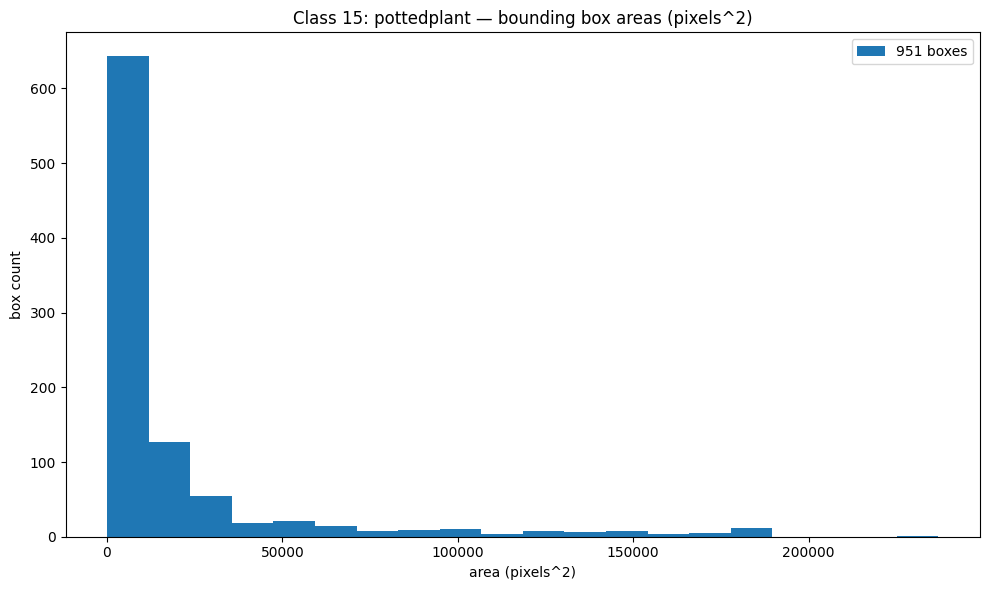

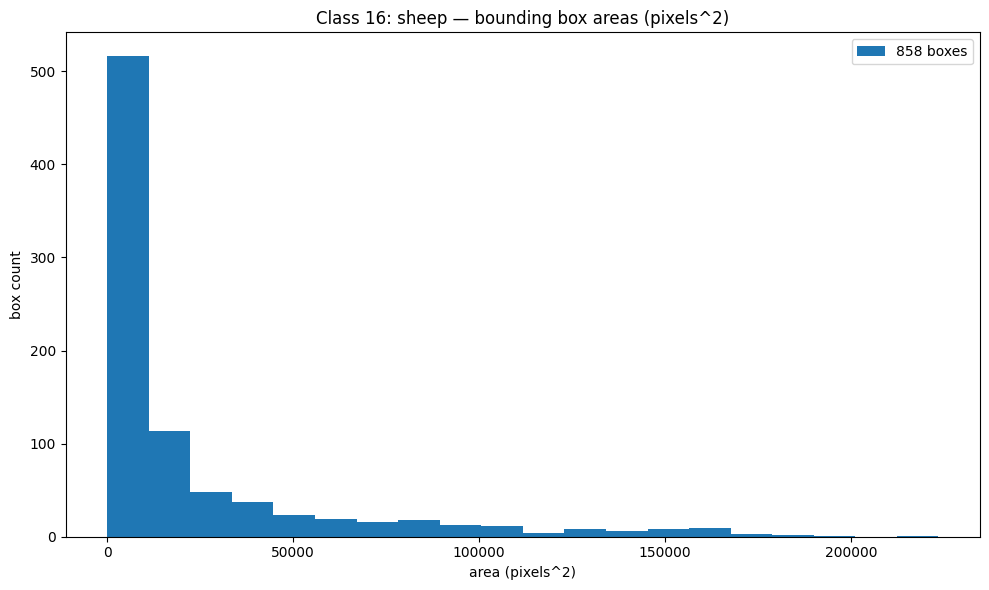

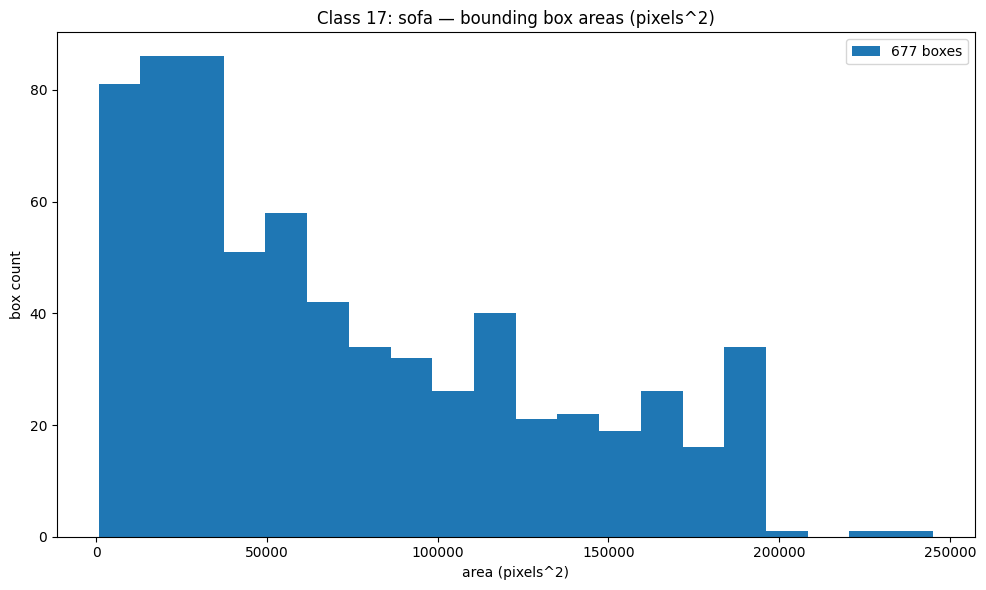

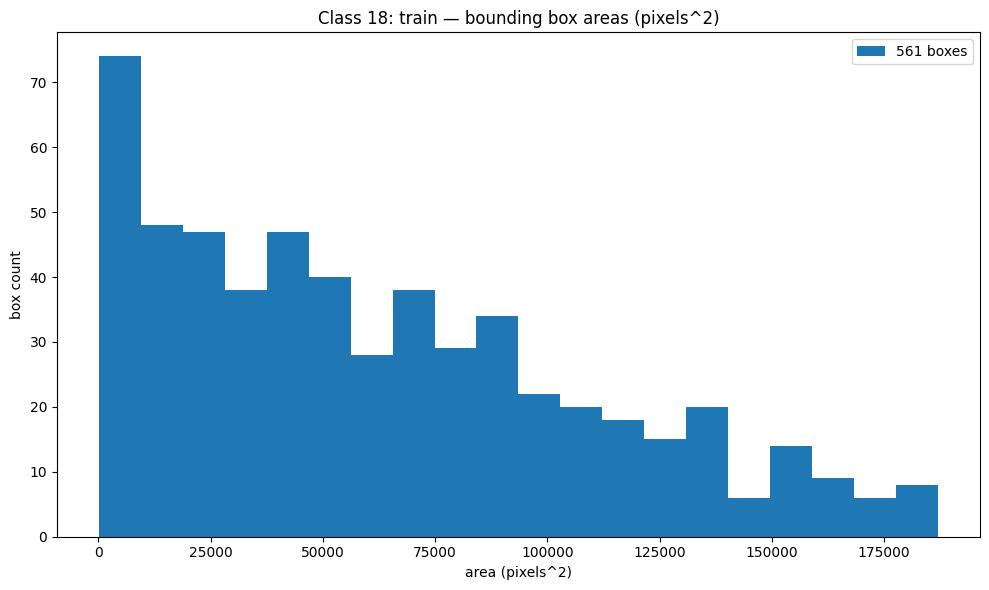

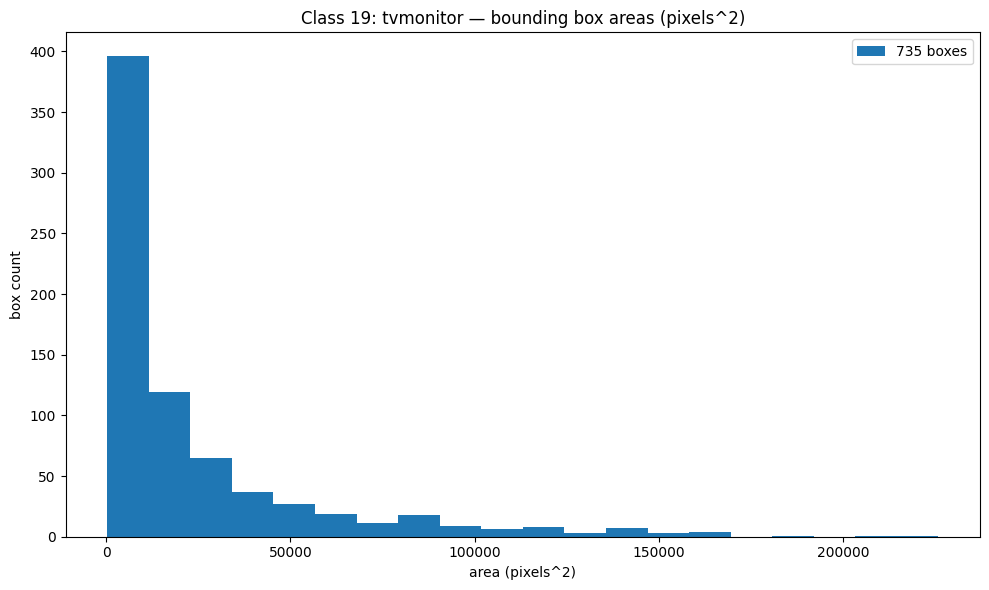

/tmp/ipython-input-920977544.py:561: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig_bp = plt.figure(figsize=(10,6))


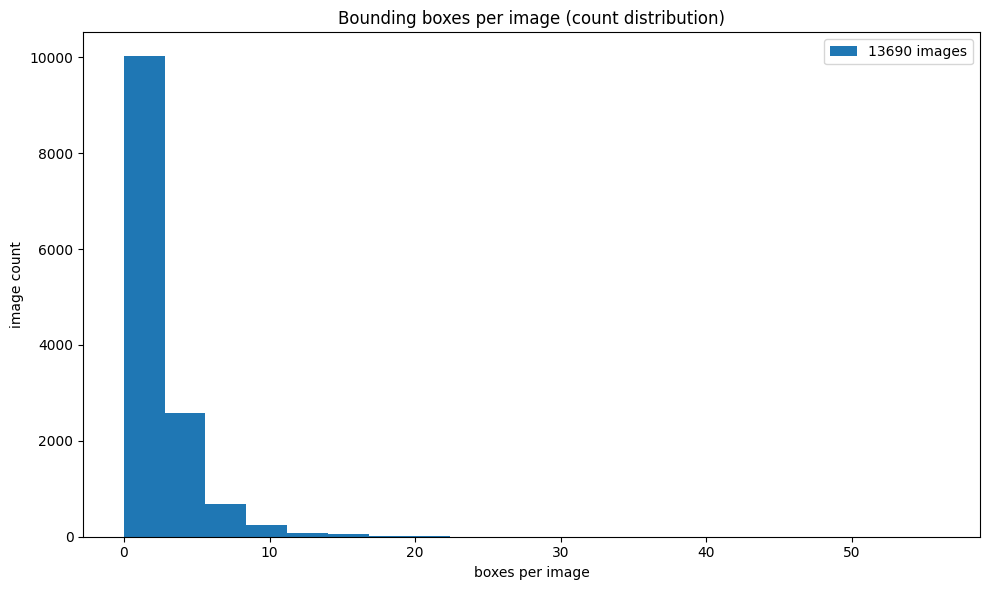

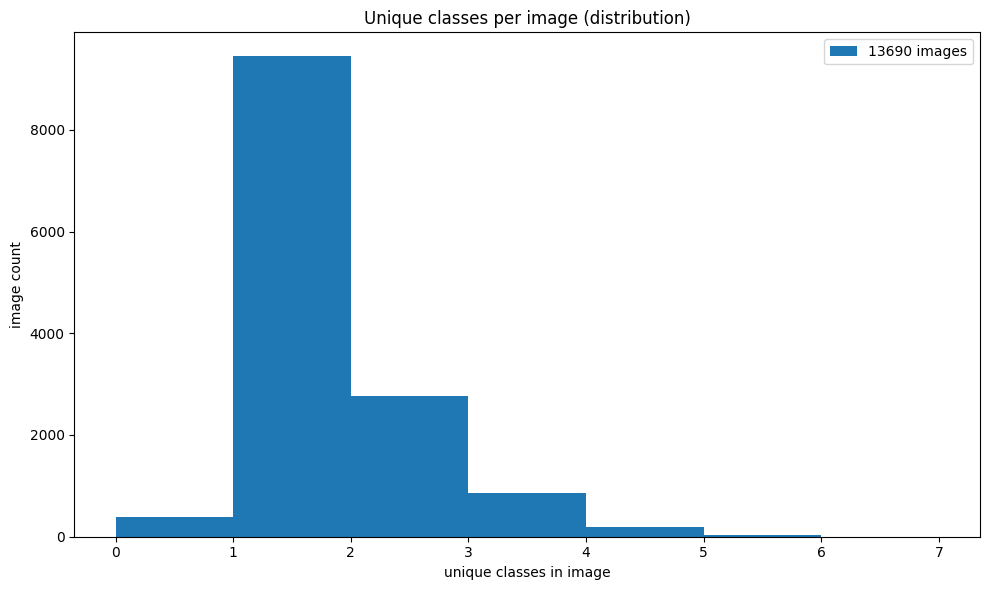

Validation: Histograms created and displayed.

Step 5/6 — Generating landscape PDF report (tables + histograms) ...
PDF report successfully written to ./pascal_voc_train_analysis_report.pdf (64719 bytes).

Step 6/6 — Final validation and summary:
  - CSV cache: ./image_analysis.csv (3110375 bytes)
  - PDF report: ./pascal_voc_train_analysis_report.pdf (64719 bytes)

All steps completed. If you want me to change any formatting, include additional plots, or output Excel/PowerPoint exports, tell me which parts to modify.


In [ ]:
# ======================================================================================
# 📌 Cell 5: Dataset analysis and report generation (Train split)
# Checklist (conceptual):
# 1) Load data.yaml (class index → name) and list files; validate lists
# 2) Scan images & label files in a single optimized pass, cache results to image_analysis.csv
# 3) Compute summary tables (per-image and per-class) and display them
# 4) Produce required histograms (classwise + per-image) and show them
# 5) Bundle tables + figures into a landscape PDF report (matching on-screen order)
# 6) Validate outputs after each major write and print concise validation lines
# ======================================================================================

# ---------------------
# Implementation starts here
# ---------------------

%matplotlib inline

import os
import glob
import json
import math
import warnings
import ast
import re
from collections import defaultdict

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display, Markdown

ROOT = './'
DATA_YAML = os.path.join(ROOT, 'data.yaml')
TRAIN_IMG_DIR = os.path.join(ROOT, 'train', 'images')
TRAIN_LABEL_DIR = os.path.join(ROOT, 'train', 'labels')
CSV_PATH = os.path.join(ROOT, 'image_analysis.csv')
REPORT_PDF = os.path.join(ROOT, 'pascal_voc_train_analysis_report.pdf')

# Helper: shoelace polygon area (points list of (x,y))
def polygon_area(points):
    if len(points) < 3:
        return 0.0
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    x.append(x[0]); y.append(y[0])
    a = 0.0
    for i in range(len(points)):
        a += x[i]*y[i+1] - x[i+1]*y[i]
    return abs(a)/2.0

# 1) Load class mapping from data.yaml (robust parsing)
print("Step 1/6 — Loading data.yaml and enumerating files...")
classes_map = {}
try:
    import yaml
    with open(DATA_YAML, 'r') as f:
        y = yaml.safe_load(f)
    # common YOLO formats: {'names': ['aeroplane', ...]} or {'names': {0: 'aeroplane', ...}}
    if isinstance(y, dict) and 'names' in y:
        names = y['names']
        if isinstance(names, dict):
            classes_map = {int(k): v for k, v in names.items()}
        elif isinstance(names, list):
            classes_map = {i: n for i, n in enumerate(names)}
    elif isinstance(y, dict):
        # maybe direct mapping
        classes_map = {int(k): v for k, v in y.items()}
    else:
        raise ValueError('Unexpected YAML structure')
except Exception:
    # fallback parsing
    try:
        with open(DATA_YAML, 'r') as f:
            txt = f.read()
        # try to find a Python-like literal after 'names:'
        m = re.search(r'names\s*:\s*(\[[^\]]*\]|\{[^\}]*\})', txt, re.S)
        if m:
            literal = m.group(1)
            parsed = ast.literal_eval(literal)
            if isinstance(parsed, dict):
                classes_map = {int(k): v for k, v in parsed.items()}
            else:
                classes_map = {i: n for i, n in enumerate(parsed)}
        else:
            # try lines like '0: aeroplane' or '0: "aeroplane"'
            classes_map = {}
            for line in txt.splitlines():
                m2 = re.match(r'\s*(\d+)\s*:\s*(.+)', line)
                if m2:
                    classes_map[int(m2.group(1))] = m2.group(2).strip().strip('\"\'')
    except Exception as e:
        warnings.warn(f"Failed to parse data.yaml: {e}")

# If still empty, create default placeholders for 20 classes to guarantee presence
if len(classes_map) == 0:
    warnings.warn('No classes found in data.yaml — creating placeholder class names 0..19')
    classes_map = {i: f'class_{i}' for i in range(20)}

# Ensure classes are ordered by index
max_class_idx = max(classes_map.keys())
expected_class_indices = list(range(0, max_class_idx + 1))

# enumerate image and label files
img_exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
images = sorted([os.path.basename(p) for p in glob.glob(os.path.join(TRAIN_IMG_DIR, '*')) if p.lower().endswith(img_exts)])
labels = sorted([os.path.basename(p) for p in glob.glob(os.path.join(TRAIN_LABEL_DIR, '*')) if p.lower().endswith('.txt')])
image_basenames = set([os.path.splitext(n)[0] for n in images])
label_basenames = set([os.path.splitext(n)[0] for n in labels])

print(f"Found {len(images)} image files and {len(labels)} label files (train split).\n")

# Report mismatches
missing_label_basenames = sorted(list(image_basenames - label_basenames))
missing_image_basenames = sorted(list(label_basenames - image_basenames))
if len(missing_label_basenames) == 0:
    print("100% match: all images have corresponding labels.")
else:
    warnings.warn(f"{len(missing_label_basenames)} images are missing label files. Example(s): {missing_label_basenames[:5]}")
if len(missing_image_basenames) > 0:
    warnings.warn(f"{len(missing_image_basenames)} label files have no corresponding image. Example(s): {missing_image_basenames[:5]}")

# 2) Decide whether to re-scan: check CSV presence and basic consistency
need_rescan = True
if os.path.exists(CSV_PATH):
    try:
        df_cache = pd.read_csv(CSV_PATH)
        if 'image_filename' in df_cache.columns:
            cached_images = set(df_cache['image_filename'].astype(str).tolist())
            if cached_images == set(images):
                # also require img_width, img_height, class_indices present
                required_cols = {'image_filename','file_size_bytes','labels_file','class_indices','bounding_boxes','bounding_box_areas','invalid_box_count','img_width','img_height'}
                if required_cols.issubset(set(df_cache.columns)):
                    need_rescan = False
                    print(f"Using existing CSV cache with {len(df_cache)} rows (matches image list).\n")
                else:
                    print("CSV exists but is missing required columns; will re-scan and overwrite CSV.")
            else:
                print("CSV exists but does not match current file list; will re-scan and overwrite CSV.")
        else:
            print("CSV exists but lacks expected schema; will re-scan and overwrite CSV.")
    except Exception as e:
        print(f"Failed to read existing CSV: {e}. Will re-scan.")
else:
    print("No CSV cache found — starting scan of images and labels.")

# Single optimized pass to scan images and labels
rows = []
if need_rescan:
    total = len(images)
    print(f"Step 2/6 — Scanning {total} images (single pass). Progress updates every 10%...)")
    if total == 0:
        warnings.warn('No images found in train/images — aborting scanning step but will create empty CSV')
    prev_percent = -1
    unknown_classes_reported = set()

    for idx, im_name in enumerate(images):
        im_path = os.path.join(TRAIN_IMG_DIR, im_name)
        base = os.path.splitext(im_name)[0]
        lbl_name = base + '.txt'
        lbl_path = os.path.join(TRAIN_LABEL_DIR, lbl_name)

        # progress
        percent = int((idx+1)/max(total,1) * 100)
        if percent % 10 == 0 and percent != prev_percent:
            print(f"  Scanning... {percent}% ({idx+1}/{total})")
            prev_percent = percent

        # defaults
        file_size_bytes = None
        img_w = 0
        img_h = 0
        class_indices = []
        bounding_box_areas = []
        bounding_box_ratios = []
        bounding_box_valid = []
        invalid_box_count = 0  # coords invalid
        skipped_class_count = 0

        # image size
        try:
            file_size_bytes = os.path.getsize(im_path)
        except Exception as e:
            warnings.warn(f"Could not get file size for {im_path}: {e}")

        try:
            img = cv2.imread(im_path)
            if img is None:
                warnings.warn(f"Could not read image (cv2) {im_path}")
            else:
                img_h, img_w = img.shape[:2]
        except Exception as e:
            warnings.warn(f"Error reading image {im_path}: {e}")

        # read label file (if present)
        if os.path.exists(lbl_path):
            try:
                with open(lbl_path, 'r') as f:
                    lines = [ln.strip() for ln in f.readlines() if ln.strip()]
            except Exception as e:
                warnings.warn(f"Could not read label file {lbl_path}: {e}")
                lines = []

            for ln in lines:
                toks = ln.split()
                if len(toks) < 9:
                    warnings.warn(f"Label line malformed (too few tokens) in {lbl_path}: '{ln}'")
                    # try to salvage class index if present
                    try:
                        cls_idx = int(float(toks[0]))
                        if cls_idx not in classes_map:
                            skipped_class_count += 1
                            if cls_idx not in unknown_classes_reported:
                                warnings.warn(f"Unknown class index {cls_idx} in {lbl_path}; skipping those entries.")
                                unknown_classes_reported.add(cls_idx)
                            continue
                        class_indices.append(cls_idx)
                        bounding_box_areas.append(None)
                        bounding_box_ratios.append(None)
                        bounding_box_valid.append(False)
                        invalid_box_count += 1
                    except Exception:
                        # can't salvage
                        continue
                    continue

                # parse
                try:
                    cls_idx = int(float(toks[0]))
                except Exception:
                    warnings.warn(f"Failed to parse class index in {lbl_path}: '{toks[0]}' — skipping line")
                    continue

                if cls_idx not in classes_map:
                    skipped_class_count += 1
                    if cls_idx not in unknown_classes_reported:
                        warnings.warn(f"Unknown class index {cls_idx} in {lbl_path}; skipping entries for this class.")
                        unknown_classes_reported.add(cls_idx)
                    continue

                # coords
                try:
                    coords = list(map(float, toks[1:9]))
                except Exception:
                    warnings.warn(f"Failed to parse coords in {lbl_path}: '{toks[1:]}'")
                    coords = []

                if len(coords) != 8:
                    warnings.warn(f"Coord length != 8 in {lbl_path}: '{ln}'")
                    valid = False
                else:
                    # check normalized bounds
                    valid = all((0.0 <= c <= 1.0) for c in coords)

                if not valid:
                    invalid_box_count += 1
                    # keep class index but mark invalid box
                    class_indices.append(cls_idx)
                    bounding_box_areas.append(None)
                    bounding_box_ratios.append(None)
                    bounding_box_valid.append(False)
                    continue

                # compute polygon area & bbox dims in pixels
                # coords ordering: x1 y1 x2 y2 x3 y3 x4 y4 (normalized)
                pts_norm = [(coords[i], coords[i+1]) for i in range(0,8,2)]
                pts_px = [(x * img_w, y * img_h) for x,y in pts_norm]
                area = polygon_area(pts_px)
                xs = [p[0] for p in pts_px]
                ys = [p[1] for p in pts_px]
                w_px = max(xs) - min(xs)
                h_px = max(ys) - min(ys)
                ratio = (w_px / h_px) if (h_px != 0) else None

                class_indices.append(cls_idx)
                bounding_box_areas.append(float(area))
                bounding_box_ratios.append(float(ratio) if ratio is not None else None)
                bounding_box_valid.append(True)
        else:
            # no label file -> leave lists empty
            pass

        bounding_boxes = len(class_indices)  # count of known-class boxes (may include invalid coords)

        row = {
            'image_filename': im_name,
            'file_size_bytes': int(file_size_bytes) if file_size_bytes is not None else None,
            'labels_file': lbl_name if os.path.exists(os.path.join(TRAIN_LABEL_DIR, lbl_name)) else '',
            'class_indices': json.dumps(class_indices),
            'bounding_boxes': int(bounding_boxes),
            'bounding_box_areas': json.dumps(bounding_box_areas),
            'bounding_box_ratios': json.dumps(bounding_box_ratios),
            'bounding_box_valid': json.dumps(bounding_box_valid),
            'invalid_box_count': int(invalid_box_count),
            'skipped_class_count': int(skipped_class_count),
            'img_width': int(img_w),
            'img_height': int(img_h)
        }
        rows.append(row)

    # write CSV
    df = pd.DataFrame(rows)
    df.to_csv(CSV_PATH, index=False)

    # Immediately reload the written CSV and parse JSON columns so downstream code
    # always operates on Python lists (not JSON strings). Also normalize numeric types.
    try:
        df = pd.read_csv(CSV_PATH)
        for col in ['class_indices','bounding_box_areas','bounding_box_ratios','bounding_box_valid']:
            if col in df.columns:
                df[col] = df[col].apply(lambda x: json.loads(x) if pd.notna(x) and x != '' else [])
        # normalize numeric columns that we'll rely on later
        if 'file_size_bytes' in df.columns:
            df['file_size_bytes'] = df['file_size_bytes'].fillna(0).astype(int)
        if 'bounding_boxes' in df.columns:
            df['bounding_boxes'] = df['bounding_boxes'].fillna(0).astype(int)
        if 'img_width' in df.columns:
            df['img_width'] = df['img_width'].fillna(0).astype(int)
        if 'img_height' in df.columns:
            df['img_height'] = df['img_height'].fillna(0).astype(int)

        print(f"Scan complete. Wrote CSV cache to {CSV_PATH} with {len(df)} rows.")

        # validation
        try:
            df_check = pd.read_csv(CSV_PATH)
            if len(df_check) == len(images):
                print(f"Validation OK: CSV has {len(df_check)} rows (matches image count).")
            else:
                warnings.warn(f"CSV validation mismatch: CSV rows={len(df_check)} vs images={len(images)}")
        except Exception as e:
            warnings.warn(f"Failed to validate CSV after write: {e}")
    except Exception as e:
        warnings.warn(f"Scan complete but failed to reload/parse CSV: {e}")
        # fall back to DataFrame built from rows (these columns will be JSON strings)
        df = pd.DataFrame(rows)
else:
    # load cached
    df = pd.read_csv(CSV_PATH)
    # parse JSON columns
    for col in ['class_indices','bounding_box_areas','bounding_box_ratios','bounding_box_valid']:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: json.loads(x) if pd.notna(x) and x != '' else [])
    # normalize numeric columns
    if 'file_size_bytes' in df.columns:
        df['file_size_bytes'] = df['file_size_bytes'].fillna(0).astype(int)
    if 'bounding_boxes' in df.columns:
        df['bounding_boxes'] = df['bounding_boxes'].fillna(0).astype(int)
    if 'img_width' in df.columns:
        df['img_width'] = df['img_width'].fillna(0).astype(int)
    if 'img_height' in df.columns:
        df['img_height'] = df['img_height'].fillna(0).astype(int)

    print("Loaded cached CSV into DataFrame.")

# 3) Compute summary tables
print("Step 3/6 — Computing summary tables...")
# per-image derived metrics
if 'class_indices' not in df.columns:
    warnings.warn('CSV missing expected columns after load — aborting analysis.')
else:
    df['num_unique_classes'] = df['class_indices'].apply(lambda s: len(set(s)) if isinstance(s, (list,tuple)) else 0)
    df['file_size_bytes'] = df['file_size_bytes'].fillna(0).astype(int)
    df['bounding_boxes'] = df['bounding_boxes'].fillna(0).astype(int)

    # Table 1: Metrics per Image (min, max, mean) for bounding_boxes, unique classes, file sizes
    tbl1 = pd.DataFrame({
        'metric': ['bounding_boxes_per_image','unique_classes_per_image','image_file_size_bytes'],
        'min': [int(df['bounding_boxes'].min()), int(df['num_unique_classes'].min()), int(df['file_size_bytes'].min())],
        'max': [int(df['bounding_boxes'].max()), int(df['num_unique_classes'].max()), int(df['file_size_bytes'].max())],
        'mean': [round(float(df['bounding_boxes'].mean()),2), round(float(df['num_unique_classes'].mean()),2), round(float(df['file_size_bytes'].mean()),2)]
    })

    display(Markdown('### Table 1 — Metrics per Image (min / max / mean)'))
    display(tbl1)
    print('Validation: Table 1 computed and displayed.')

    # Table 2: Metrics per Class
    print('Computing Table 2 (per-class metrics)...')
    class_rows = []
    total_images = len(df)

    # prepare per-class accumulators
    per_class_areas = {ci: [] for ci in sorted(classes_map.keys())}
    per_class_ratios = {ci: [] for ci in sorted(classes_map.keys())}
    per_class_img_set = {ci: set() for ci in sorted(classes_map.keys())}
    per_class_invalid_count = {ci: 0 for ci in sorted(classes_map.keys())}
    per_class_box_count = {ci: 0 for ci in sorted(classes_map.keys())}

    for _, r in df.iterrows():
        cls_list = json.loads(r['class_indices']) if isinstance(r['class_indices'], str) else r['class_indices']
        areas_list = json.loads(r['bounding_box_areas']) if isinstance(r['bounding_box_areas'], str) else r['bounding_box_areas']
        ratios_list = json.loads(r['bounding_box_ratios']) if isinstance(r['bounding_box_ratios'], str) else r['bounding_box_ratios']
        valid_list = json.loads(r.get('bounding_box_valid','')) if isinstance(r.get('bounding_box_valid',''), str) else r.get('bounding_box_valid', [])

        for i, cls in enumerate(cls_list):
            if cls not in classes_map:
                continue
            per_class_img_set[cls].add(r['image_filename'])
            per_class_box_count[cls] += 1
            # area
            area = None
            try:
                area = areas_list[i] if i < len(areas_list) else None
            except Exception:
                area = None
            if area is not None:
                per_class_areas[cls].append(float(area))
            # ratio
            ratio = None
            try:
                ratio = ratios_list[i] if i < len(ratios_list) else None
            except Exception:
                ratio = None
            if ratio is not None:
                try:
                    per_class_ratios[cls].append(float(ratio))
                except Exception:
                    pass
            # invalid
            is_valid = True
            try:
                is_valid = valid_list[i] if i < len(valid_list) else True
            except Exception:
                is_valid = True
            if not is_valid:
                per_class_invalid_count[cls] += 1

    # build rows
    for ci in sorted(classes_map.keys()):
        name = classes_map.get(ci, f'class_{ci}')
        num_images_with = len(per_class_img_set[ci])
        total_bboxes = int(per_class_box_count[ci])
        areas = per_class_areas[ci]
        ratios = per_class_ratios[ci]
        mean_area = round(float(np.mean(areas)),2) if len(areas)>0 else 0.0
        median_area = round(float(np.median(areas)),2) if len(areas)>0 else 0.0
        # avg dimensions of images containing class
        if num_images_with > 0:
            widths = []
            heights = []
            for fname in per_class_img_set[ci]:
                rowr = df[df['image_filename']==fname].iloc[0]
                widths.append(int(rowr.get('img_width',0)))
                heights.append(int(rowr.get('img_height',0)))
            avg_w = round(float(np.mean(widths)),2) if len(widths)>0 else 0.0
            avg_h = round(float(np.mean(heights)),2) if len(heights)>0 else 0.0
        else:
            avg_w = 0.0
            avg_h = 0.0
        avg_ratio = round(float(np.mean(ratios)),2) if len(ratios)>0 else 0.0
        # percent of images with >1 instance of class (relative to images containing the class)
        images_with_more_than_one = 0
        for fname in per_class_img_set[ci]:
            rowr = df[df['image_filename']==fname].iloc[0]
            cls_list = json.loads(rowr['class_indices']) if isinstance(rowr['class_indices'], str) else rowr['class_indices']
            count_in_img = sum(1 for c in cls_list if c==ci)
            if count_in_img > 1:
                images_with_more_than_one += 1
        pct_images_gt1 = round((images_with_more_than_one / num_images_with * 100),2) if num_images_with>0 else 0.0
        invalid_count = int(per_class_invalid_count[ci])

        class_rows.append({
            'class_index': int(ci),
            'class_name': name,
            'num_images_with_>=1': int(num_images_with),
            'total_bounding_boxes': int(total_bboxes),
            'mean_bbox_area_px2': mean_area,
            'median_bbox_area_px2': median_area,
            'avg_img_width_px': avg_w,
            'avg_img_height_px': avg_h,
            'avg_bbox_w_h_ratio': avg_ratio,
            'pct_images_with_>1_instance': pct_images_gt1,
            'bbox_invalid_coord_count': invalid_count
        })

    # aggregate ALL row
    all_num_images_with = int(sum(1 for _ in df[df['bounding_boxes']>0].index))
    all_total_bboxes = int(sum([r['total_bounding_boxes'] for r in class_rows]))
    all_areas = []
    for ci in per_class_areas:
        all_areas.extend(per_class_areas[ci])
    all_mean_area = round(float(np.mean(all_areas)),2) if len(all_areas)>0 else 0.0
    all_median_area = round(float(np.median(all_areas)),2) if len(all_areas)>0 else 0.0
    # avg img width/height for images containing any object
    imgs_with_any = df[df['bounding_boxes']>0]
    if len(imgs_with_any)>0:
        all_avg_w = round(float(imgs_with_any['img_width'].mean()),2)
        all_avg_h = round(float(imgs_with_any['img_height'].mean()),2)
    else:
        all_avg_w = 0.0
        all_avg_h = 0.0
    all_ratios = []
    for ci in per_class_ratios:
        all_ratios.extend(per_class_ratios[ci])
    all_avg_ratio = round(float(np.mean(all_ratios)),2) if len(all_ratios)>0 else 0.0
    all_invalid = int(sum(per_class_invalid_count.values()))

    # create DataFrame for Table 2
    table2_df = pd.DataFrame(class_rows)
    # ensure order by class_index
    table2_df = table2_df.sort_values('class_index').reset_index(drop=True)
    # append ALL row
    all_row = {
        'class_index': 'ALL',
        'class_name': 'ALL',
        'num_images_with_>=1': all_num_images_with,
        'total_bounding_boxes': all_total_bboxes,
        'mean_bbox_area_px2': all_mean_area,
        'median_bbox_area_px2': all_median_area,
        'avg_img_width_px': all_avg_w,
        'avg_img_height_px': all_avg_h,
        'avg_bbox_w_h_ratio': all_avg_ratio,
        'pct_images_with_>1_instance': round(float(sum([r['pct_images_with_>1_instance'] for r in class_rows])/len(class_rows)),2) if len(class_rows)>0 else 0.0,
        'bbox_invalid_coord_count': all_invalid
    }
    table2_df = pd.concat([table2_df, pd.DataFrame([all_row])], ignore_index=True, sort=False)

    # Formatting
    int_cols = ['num_images_with_>=1','total_bounding_boxes','bbox_invalid_coord_count']
    float_cols = ['mean_bbox_area_px2','median_bbox_area_px2','avg_img_width_px','avg_img_height_px','avg_bbox_w_h_ratio','pct_images_with_>1_instance']
    for c in int_cols:
        if c in table2_df.columns:
            table2_df[c] = table2_df[c].fillna(0).astype(int)
    for c in float_cols:
        if c in table2_df.columns:
            table2_df[c] = table2_df[c].fillna(0.0).astype(float).round(2)

    display(Markdown('### Table 2 — Metrics per Class (ordered by class index; final row = ALL)'))
    display(table2_df)
    print('Validation: Table 2 computed and displayed.')

# 4) Visualizations
print('Step 4/6 — Creating histograms (displayed inline and saved for report)...')

# helper to build figure and keep for PDF
figs_for_pdf = []

# classwise histograms (ordered by class index in table2)
for row in table2_df[table2_df['class_index']!='ALL'].itertuples():
    ci = int(row.class_index)
    cls_name = row.class_name
    areas = per_class_areas.get(ci, [])
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    if len(areas) == 0:
        ax.text(0.5, 0.5, f'No bounding boxes for class {ci} — {cls_name}', ha='center', va='center')
        ax.set_title(f'Class {ci}: {cls_name} — bounding box areas (pixels^2)')
        ax.set_xlabel('area (pixels^2)')
        ax.set_ylabel('box count')
    else:
        ax.hist(areas, bins=20)
        ax.set_title(f'Class {ci}: {cls_name} — bounding box areas (pixels^2)')
        ax.set_xlabel('area (pixels^2)')
        ax.set_ylabel('box count')
        ax.legend([f'{len(areas)} boxes'])
    plt.tight_layout()
    display(fig)
    figs_for_pdf.append(fig)

# boxes per image histogram
fig_bp = plt.figure(figsize=(10,6))
ax_bp = fig_bp.add_subplot(111)
ax_bp.hist(df['bounding_boxes'], bins=20)
ax_bp.set_title('Bounding boxes per image (count distribution)')
ax_bp.set_xlabel('boxes per image')
ax_bp.set_ylabel('image count')
ax_bp.legend([f'{len(df)} images'])
plt.tight_layout()
display(fig_bp)
figs_for_pdf.append(fig_bp)

# unique classes per image histogram (integer bins)
fig_uc = plt.figure(figsize=(10,6))
ax_uc = fig_uc.add_subplot(111)
ax_uc.hist(df['num_unique_classes'], bins=range(0, int(df['num_unique_classes'].max())+2))
ax_uc.set_title('Unique classes per image (distribution)')
ax_uc.set_xlabel('unique classes in image')
ax_uc.set_ylabel('image count')
ax_uc.legend([f'{len(df)} images'])
plt.tight_layout()
display(fig_uc)
figs_for_pdf.append(fig_uc)

print('Validation: Histograms created and displayed.\n')

# 5) PDF Report (landscape)
print('Step 5/6 — Generating landscape PDF report (tables + histograms) ...')
try:
    with PdfPages(REPORT_PDF) as pdf:
        # page 1: Table 1
        fig_t1 = plt.figure(figsize=(11.69,8.27))
        ax = fig_t1.add_subplot(111)
        ax.axis('off')
        tbl = ax.table(cellText=tbl1.values, colLabels=tbl1.columns, loc='center')
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(10)
        tbl.scale(1,1.5)
        ax.set_title('Table 1 — Metrics per Image (min / max / mean)')
        pdf.savefig(fig_t1)
        plt.close(fig_t1)

        # page 2: Table 2 (may span — but for 20 classes + ALL fits)
        fig_t2 = plt.figure(figsize=(11.69,8.27))
        ax2 = fig_t2.add_subplot(111)
        ax2.axis('off')
        # prepare table2 values as strings (ensure formatting)
        table2_display = table2_df.copy()
        table2_display = table2_display.rename(columns={
            'class_index': 'class_index',
            'class_name': 'class_name',
            'num_images_with_>=1': '#images_with_>=1',
            'total_bounding_boxes': 'total_bboxes',
            'mean_bbox_area_px2': 'mean_area_px2',
            'median_bbox_area_px2': 'median_area_px2',
            'avg_img_width_px': 'avg_img_w_px',
            'avg_img_height_px': 'avg_img_h_px',
            'avg_bbox_w_h_ratio': 'avg_bbox_w_h_ratio',
            'pct_images_with_>1_instance': '%imgs_with_>1',
            'bbox_invalid_coord_count': 'invalid_bbox_count'
        })
        table2_vals = table2_display.values.astype(str)
        tbl2 = ax2.table(cellText=table2_vals, colLabels=table2_display.columns, loc='center')
        tbl2.auto_set_font_size(False)
        tbl2.set_fontsize(8)
        tbl2.scale(1,1.2)
        ax2.set_title('Table 2 — Metrics per Class')
        pdf.savefig(fig_t2)
        plt.close(fig_t2)

        # following pages: all histograms saved in the same order as displayed
        for fig in figs_for_pdf:
            pdf.savefig(fig)
            plt.close(fig)
    # validation
    if os.path.exists(REPORT_PDF) and os.path.getsize(REPORT_PDF) > 0:
        print(f"PDF report successfully written to {REPORT_PDF} ({os.path.getsize(REPORT_PDF)} bytes).\n")
    else:
        warnings.warn('PDF report generation finished but file not found or empty.')
except Exception as e:
    warnings.warn(f"Failed to generate PDF report: {e}")

print('Step 6/6 — Final validation and summary:')
print(f"  - CSV cache: {CSV_PATH} ({os.path.exists(CSV_PATH) and os.path.getsize(CSV_PATH)} bytes)")
print(f"  - PDF report: {REPORT_PDF} ({os.path.exists(REPORT_PDF) and os.path.getsize(REPORT_PDF)} bytes)")
print('\nAll steps completed. If you want me to change any formatting, include additional plots, or output Excel/PowerPoint exports, tell me which parts to modify.')

**Step 1: Checking for existing CSV and required columns...**
FORCE_RESCAN is True — will (re)scan images and regenerate CSV.
Found 13690 image(s) in ./train/images
**Step 2: Scanning and processing images (conversions + histograms)...**
100% complete
Processing complete.
**Step 3: Saving CSV to ./train/color_histograms.csv ...**
CSV saved and validated (basic write).
**Step 4: Loading CSV and computing mean histograms per color-space/channel...**
Mean histograms computed for each channel and color space (basic validation OK).
**Step 5: Plotting histograms and saving PDF to ./train/color_histograms_plots.pdf ...**


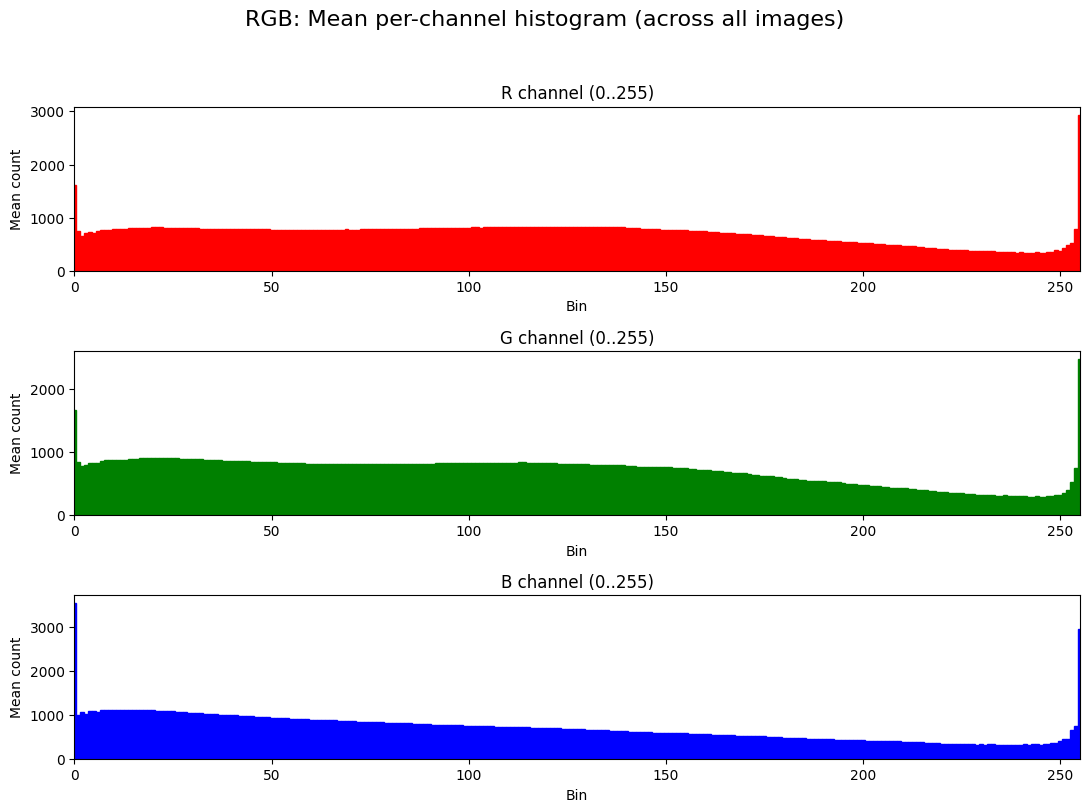

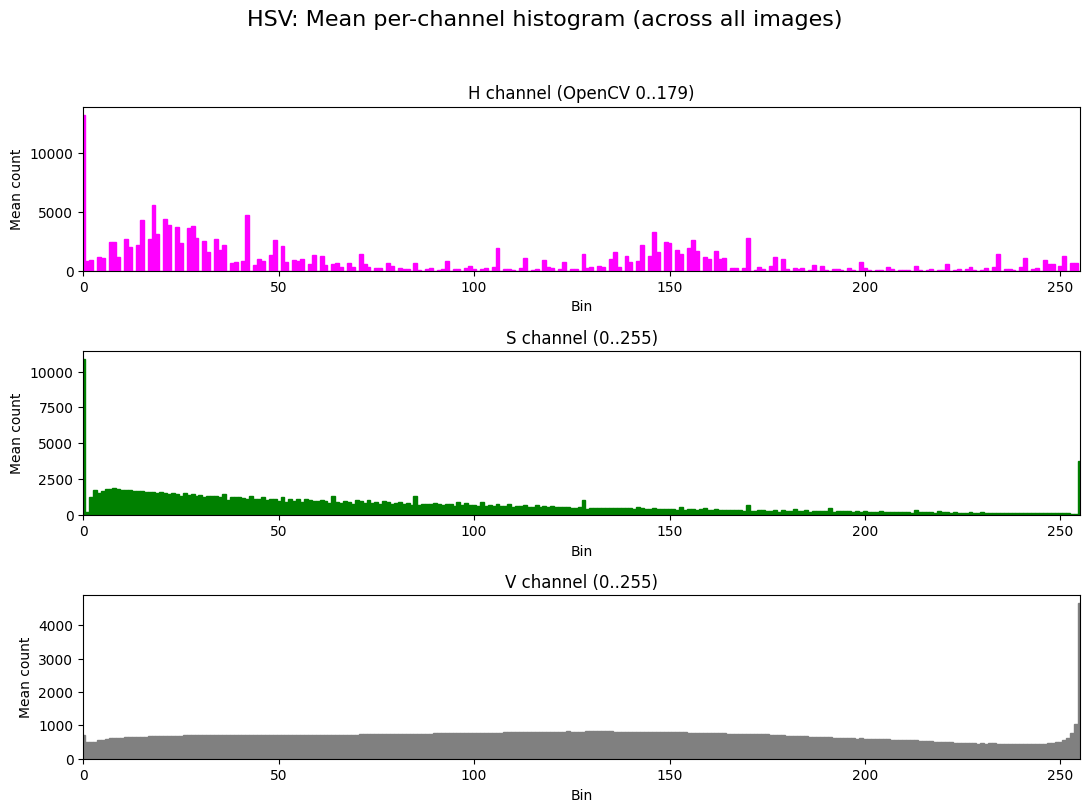

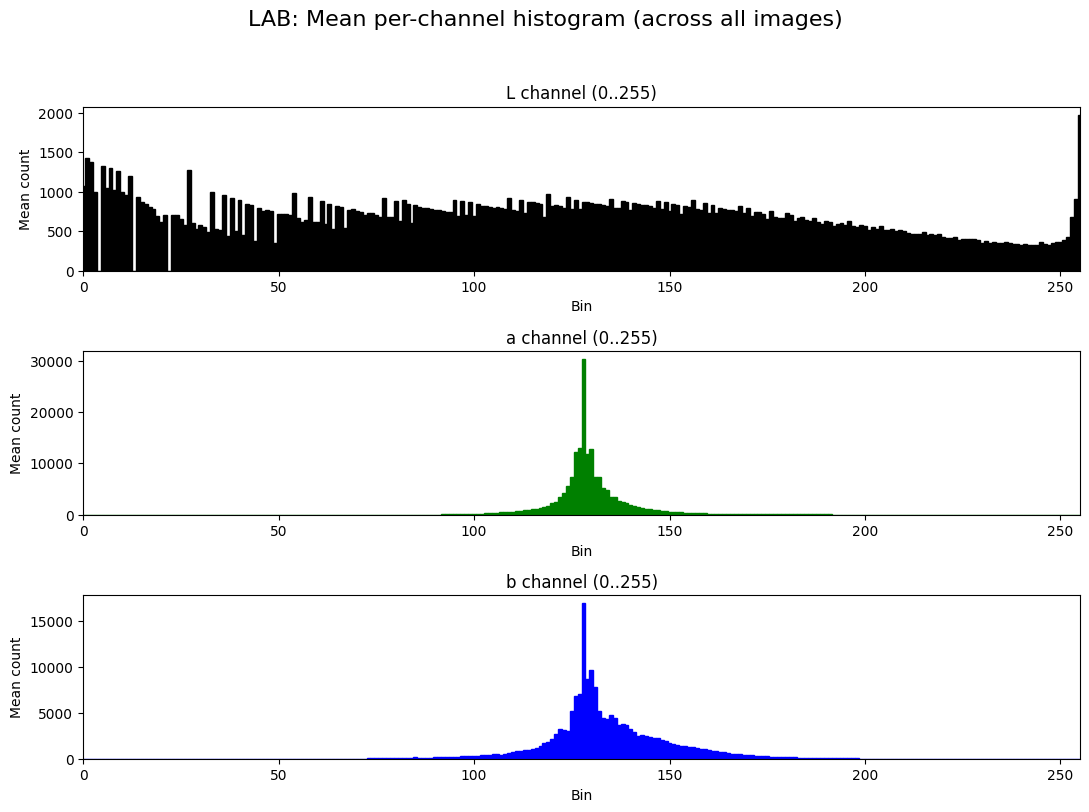

PDF saved. All plots displayed inline.
**Step 6: Final validation**
All outputs present. Task complete.


In [ ]:
# ===================================
# 📌 Cell 6: Color space conversion & histograms (Experiment 2.2)
# - Assumes previous cells (code.txt) ran and set working dir to dataset root
# - Inserts/uses ./train/images as source
# - Produces: ./train/converted_RGB, converted_HSV, converted_LAB
# - Produces CSV: ./train/color_histograms.csv
# - Produces PDF: ./train/color_histograms_plots.pdf
# ===================================

import os, sys, glob, math, csv
from pathlib import Path
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
import traceback

# -------------------------
# Parameters / paths
# -------------------------
TRAIN_DIR = "./train"
IMG_DIR = os.path.join(TRAIN_DIR, "images")
OUT_RGB = os.path.join(TRAIN_DIR, "converted_RGB")
OUT_HSV = os.path.join(TRAIN_DIR, "converted_HSV")
OUT_LAB = os.path.join(TRAIN_DIR, "converted_LAB")
CSV_PATH = os.path.join(TRAIN_DIR, "color_histograms.csv")
PDF_PATH = os.path.join(TRAIN_DIR, "color_histograms_plots.pdf")

# Make output dirs
for d in (OUT_RGB, OUT_HSV, OUT_LAB):
    os.makedirs(d, exist_ok=True)

# -------------------------
# Helpers
# -------------------------
def print_step(n, msg):
    print(f"**Step {n}: {msg}**")

def make_hist_names(prefix, channel_letter):
    return [f"{prefix}_hist_{channel_letter}_{i}" for i in range(256)]

def safe_imread(path):
    try:
        img = cv2.imdecode(np.fromfile(path, dtype=np.uint8), cv2.IMREAD_COLOR)
        # cv2.imdecode allows reading paths with Unicode; fallback to cv2.imread if None
        if img is None:
            img = cv2.imread(path, cv2.IMREAD_COLOR)
        return img
    except Exception:
        return None

def calc_histogram(channel_array, bins, range_):
    # channel_array is single-channel numpy array
    hist = cv2.calcHist([channel_array], [0], None, [bins], range_)
    # flatten to 1D
    return hist.flatten()

def expected_columns():
    # returns ordered list of columns expected in CSV
    cols = ["filename", "height", "width"]
    # RGB channels: R, G, B (we will store in R,G,B order)
    cols += make_hist_names("rgb", "r")
    cols += make_hist_names("rgb", "g")
    cols += make_hist_names("rgb", "b")
    # HSV: H,S,V (H: 0..179 range, but we still use 256 bins as requested)
    cols += make_hist_names("hsv", "h")
    cols += make_hist_names("hsv", "s")
    cols += make_hist_names("hsv", "v")
    # LAB: L, a, b
    cols += make_hist_names("lab", "l")
    cols += make_hist_names("lab", "a")
    cols += make_hist_names("lab", "b")
    return cols

def csv_has_all_columns(path):
    try:
        df = pd.read_csv(path, nrows=0)
        have = set(df.columns.tolist())
        need = set(expected_columns())
        return need.issubset(have)
    except Exception:
        return False

# -------------------------
# Control flag: force rescanning
# -------------------------
FORCE_RESCAN = True   # ⬅️ Set True to ignore existing CSV and reprocess all images

# -------------------------
# Step 1: Decide whether to (re)scan images or reuse CSV
# -------------------------
print_step(1, "Checking for existing CSV and required columns...")
csv_ok = os.path.exists(CSV_PATH) and csv_has_all_columns(CSV_PATH)

if FORCE_RESCAN:
    print("FORCE_RESCAN is True — will (re)scan images and regenerate CSV.")
    csv_ok = False
elif csv_ok:
    print("CSV exists and contains required columns — will reuse it to regenerate plots.")
else:
    print("CSV missing or incomplete — will (re)scan images and regenerate CSV.")

# -------------------------
# Step 2: If CSV incomplete, scan/process images
# -------------------------
image_paths = sorted(glob.glob(os.path.join(IMG_DIR, "*.*")))
n_images = len(image_paths)
if n_images == 0:
    print("Warning: No images found in", IMG_DIR)
else:
    print(f"Found {n_images} image(s) in {IMG_DIR}")

rows = []
if not csv_ok and n_images > 0:
    print_step(2, "Scanning and processing images (conversions + histograms)...")
    # For progress reporting: print update every 5%
    next_progress = 0.05
    unreadable = 0
    processed = 0

    for idx, img_path in enumerate(image_paths, start=1):
        try:
            filename = os.path.basename(img_path)
            img = safe_imread(img_path)
            if img is None:
                # warn and continue
                print(f"\nWarning: cannot read image '{filename}' — skipping.")
                unreadable += 1
                continue

            # Ensure BGR -> RGB ordering for saving when requested
            h, w = img.shape[:2]

            # Convert and save RGB (OpenCV loads BGR)
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Save using imencode + tofile to support unicode paths
            _, buf = cv2.imencode(os.path.splitext(filename)[1], cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR))
            Path(os.path.join(OUT_RGB, filename)).write_bytes(buf.tobytes())

            # Convert and save HSV (OpenCV expects BGR -> HSV)
            hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            _, buf = cv2.imencode(os.path.splitext(filename)[1], cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR))
            Path(os.path.join(OUT_HSV, filename)).write_bytes(buf.tobytes())

            # Convert and save LAB (BGR -> LAB)
            lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
            # To visualize/safe-save LAB using BGR-converted representation so it's viewable
            # Convert LAB back to BGR for saving (so saved file remains a viewable image)
            _, buf = cv2.imencode(os.path.splitext(filename)[1], cv2.cvtColor(lab_img, cv2.COLOR_LAB2BGR))
            Path(os.path.join(OUT_LAB, filename)).write_bytes(buf.tobytes())

            # Compute histograms:
            # OpenCV ranges:
            # - RGB (we'll compute from the RGB image as channels 0:R,1:G,2:B) with range [0,256)
            # - HSV: H range [0,180), S,V [0,256)
            # - LAB: all channels [0,256) (OpenCV encodes a and b in 0..255)
            bins = 256
            # RGB channels
            r_hist = calc_histogram(rgb_img[:, :, 0], bins=bins, range_=(0, 256))
            g_hist = calc_histogram(rgb_img[:, :, 1], bins=bins, range_=(0, 256))
            b_hist = calc_histogram(rgb_img[:, :, 2], bins=bins, range_=(0, 256))

            # HSV channels (H:0..180, S:0..256, V:0..256) -> use ranges accordingly
            h_hist = calc_histogram(hsv_img[:, :, 0], bins=bins, range_=(0, 180))
            s_hist = calc_histogram(hsv_img[:, :, 1], bins=bins, range_=(0, 256))
            v_hist = calc_histogram(hsv_img[:, :, 2], bins=bins, range_=(0, 256))

            # LAB channels
            l_hist = calc_histogram(lab_img[:, :, 0], bins=bins, range_=(0, 256))
            a_hist = calc_histogram(lab_img[:, :, 1], bins=bins, range_=(0, 256))
            bb_hist = calc_histogram(lab_img[:, :, 2], bins=bins, range_=(0, 256))

            # Build row ordered as expected_columns
            row = OrderedDict()
            row["filename"] = filename
            row["height"] = int(h)
            row["width"] = int(w)
            for i, val in enumerate(r_hist): row[f"rgb_hist_r_{i}"] = float(val)
            for i, val in enumerate(g_hist): row[f"rgb_hist_g_{i}"] = float(val)
            for i, val in enumerate(b_hist): row[f"rgb_hist_b_{i}"] = float(val)
            for i, val in enumerate(h_hist): row[f"hsv_hist_h_{i}"] = float(val)
            for i, val in enumerate(s_hist): row[f"hsv_hist_s_{i}"] = float(val)
            for i, val in enumerate(v_hist): row[f"hsv_hist_v_{i}"] = float(val)
            for i, val in enumerate(l_hist): row[f"lab_hist_l_{i}"] = float(val)
            for i, val in enumerate(a_hist): row[f"lab_hist_a_{i}"] = float(val)
            for i, val in enumerate(bb_hist): row[f"lab_hist_b_{i}"] = float(val)

            rows.append(row)
            processed += 1

            # Progress every 5% on same line
            progress = idx / n_images
            if progress >= next_progress or idx == n_images:
                pct = int(progress * 100)
                sys.stdout.write(f"\r{pct}% complete")
                sys.stdout.flush()
                next_progress += 0.05

            # Minimal validation every 100 images: ensure lengths
            if processed % 100 == 0:
                if len(row) != (3 + 9*256):
                    print(f"\nValidation warning: unexpected number of columns in row for {filename}. Fixing by continuing.")
        except Exception as e:
            # warn and continue
            print(f"\nWarning: failed processing '{img_path}'. Error: {e}")
            traceback.print_exc()
            continue

    print("\nProcessing complete.")
    if unreadable:
        print(f"Finished with {unreadable} unreadable image(s) skipped.")

    # Save CSV
    try:
        print_step(3, f"Saving CSV to {CSV_PATH} ...")
        df = pd.DataFrame(rows, columns=expected_columns())
        df.to_csv(CSV_PATH, index=False)
        print("CSV saved and validated (basic write).")
        csv_ok = True
    except Exception as e:
        print("Error saving CSV:", e)
        csv_ok = False

# -------------------------
# Step 4: Load CSV (either reused or freshly created) and compute mean histograms
# -------------------------
if not os.path.exists(CSV_PATH):
    raise RuntimeError(f"CSV not available at {CSV_PATH}; cannot continue plotting.")

print_step(4, "Loading CSV and computing mean histograms per color-space/channel...")
df = pd.read_csv(CSV_PATH)

# Validate columns presence
need_cols = expected_columns()
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise RuntimeError(f"CSV missing required columns: {missing}")

# Number of images that are in the CSV (used for averaging)
m = len(df)
if m == 0:
    raise RuntimeError("CSV contains zero image rows; nothing to plot.")

# Helper to compute mean hist vector from df given prefix and channel letter
def mean_hist_from_df(prefix, ch_letter):
    col_names = [f"{prefix}_hist_{ch_letter}_{i}" for i in range(256)]
    arr = df[col_names].to_numpy(dtype=float)
    mean = np.mean(arr, axis=0)
    return mean

# Compute means
rgb_mean_r = mean_hist_from_df("rgb", "r")
rgb_mean_g = mean_hist_from_df("rgb", "g")
rgb_mean_b = mean_hist_from_df("rgb", "b")

hsv_mean_h = mean_hist_from_df("hsv", "h")
hsv_mean_s = mean_hist_from_df("hsv", "s")
hsv_mean_v = mean_hist_from_df("hsv", "v")

lab_mean_l = mean_hist_from_df("lab", "l")
lab_mean_a = mean_hist_from_df("lab", "a")
lab_mean_b = mean_hist_from_df("lab", "b")

print("Mean histograms computed for each channel and color space (basic validation OK).")

# -------------------------
# Step 5: Plotting & PDF creation (filled histograms)
# -------------------------
print_step(5, f"Plotting histograms and saving PDF to {PDF_PATH} ...")

with PdfPages(PDF_PATH) as pdf:
    # Helper to plot three channels in a single (landscape) page
    def plot_three(title, ch_means, ch_labels, colors):
        fig = plt.figure(figsize=(11, 8.5))  # landscape
        fig.suptitle(title, fontsize=16)
        for i in range(3):
            ax = fig.add_subplot(3, 1, i+1)
            x = np.arange(256)
            # Filled histogram style
            ax.bar(x, ch_means[i], color=colors[i], width=1.0, edgecolor=colors[i])
            ax.set_xlim(0, 255)
            ax.set_ylabel("Mean count")
            ax.set_xlabel("Bin")
            ax.set_title(ch_labels[i])
            ax.grid(False)  # cleaner look
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        pdf.savefig(fig)
        plt.show()
        plt.close(fig)

    # RGB page (Red, Green, Blue)
    plot_three("RGB: Mean per-channel histogram (across all images)",
               [rgb_mean_r, rgb_mean_g, rgb_mean_b],
               ["R channel (0..255)", "G channel (0..255)", "B channel (0..255)"],
               ["red", "green", "blue"])

    # HSV page (Hue: magenta, Saturation: green, Value: gray)
    plot_three("HSV: Mean per-channel histogram (across all images)",
               [hsv_mean_h, hsv_mean_s, hsv_mean_v],
               ["H channel (OpenCV 0..179)", "S channel (0..255)", "V channel (0..255)"],
               ["magenta", "green", "gray"])

    # LAB page (L: black, a: green, b: blue)
    plot_three("LAB: Mean per-channel histogram (across all images)",
               [lab_mean_l, lab_mean_a, lab_mean_b],
               ["L channel (0..255)", "a channel (0..255)", "b channel (0..255)"],
               ["black", "green", "blue"])

print("PDF saved. All plots displayed inline.")



# -------------------------
# Final validation & summary
# -------------------------
print_step(6, "Final validation")
# Validate that outputs exist
valid_out = True
for d in (OUT_RGB, OUT_HSV, OUT_LAB):
    if not os.path.isdir(d):
        print(f"Warning: expected output folder missing: {d}")
        valid_out = False
if not os.path.exists(CSV_PATH):
    print("Error: CSV not found after processing.")
    valid_out = False
if not os.path.exists(PDF_PATH):
    print("Error: PDF not found after plotting.")
    valid_out = False

if valid_out:
    print("All outputs present. Task complete.")
else:
    print("Task completed with warnings; check messages above for issues.")


CSV schema (example header):
operation,color_space,channel,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,bin_10,bin_11,bin_12,bin_13,bin_14,bin_15,bin_16,bin_17,bin_18,bin_19,bin_20,bin_21,bin_22,bin_23,bin_24,bin_25,bin_26,bin_27,bin_28,bin_29,bin_30,bin_31,bin_32,bin_33,bin_34,bin_35,bin_36,bin_37,bin_38,bin_39,bin_40,bin_41,bin_42,bin_43,bin_44,bin_45,bin_46,bin_47,bin_48,bin_49,bin_50,bin_51,bin_52,bin_53,bin_54,bin_55,bin_56,bin_57,bin_58,bin_59,bin_60,bin_61,bin_62,bin_63,bin_64,bin_65,bin_66,bin_67,bin_68,bin_69,bin_70,bin_71,bin_72,bin_73,bin_74,bin_75,bin_76,bin_77,bin_78,bin_79,bin_80,bin_81,bin_82,bin_83,bin_84,bin_85,bin_86,bin_87,bin_88,bin_89,bin_90,bin_91,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,bin_100,bin_101,bin_102,bin_103,bin_104,bin_105,bin_106,bin_107,bin_108,bin_109,bin_110,bin_111,bin_112,bin_113,bin_114,bin_115,bin_116,bin_117,bin_118,bin_119,bin_120,bin_121,bin_122,bin_123,bin_124,bin_125,bin_126,bin_127,bin_128,bin_129,bin_130,bin

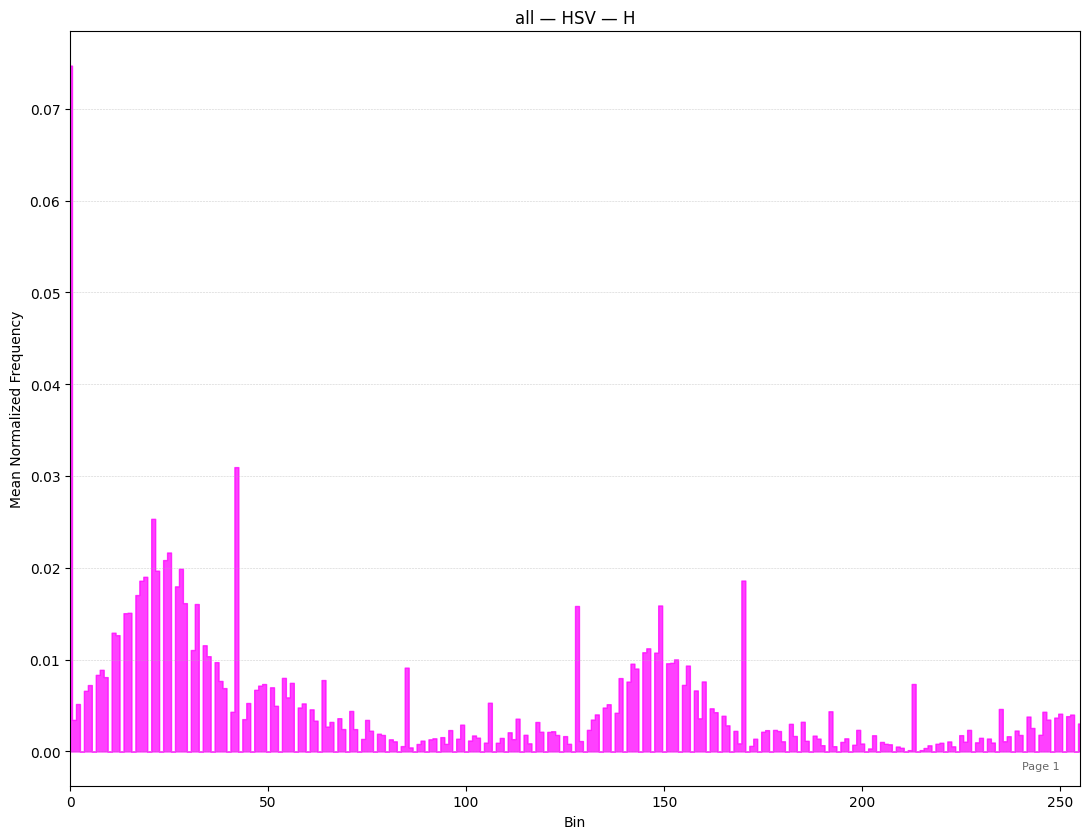

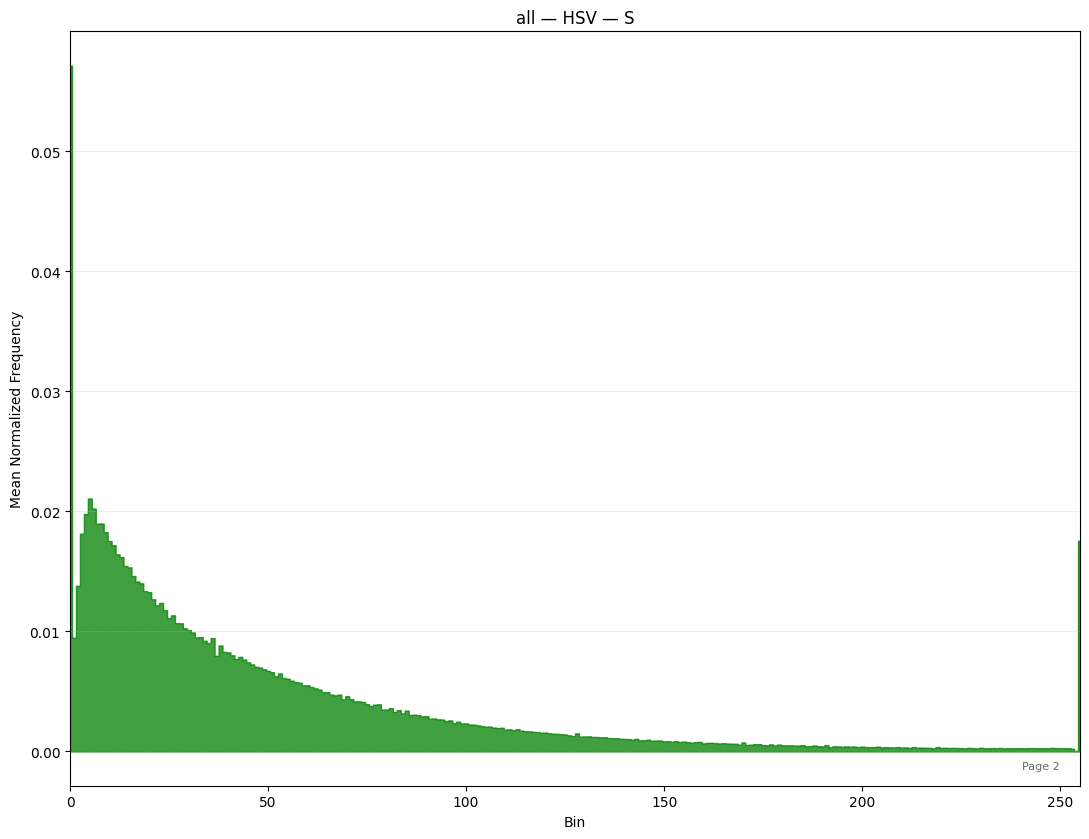

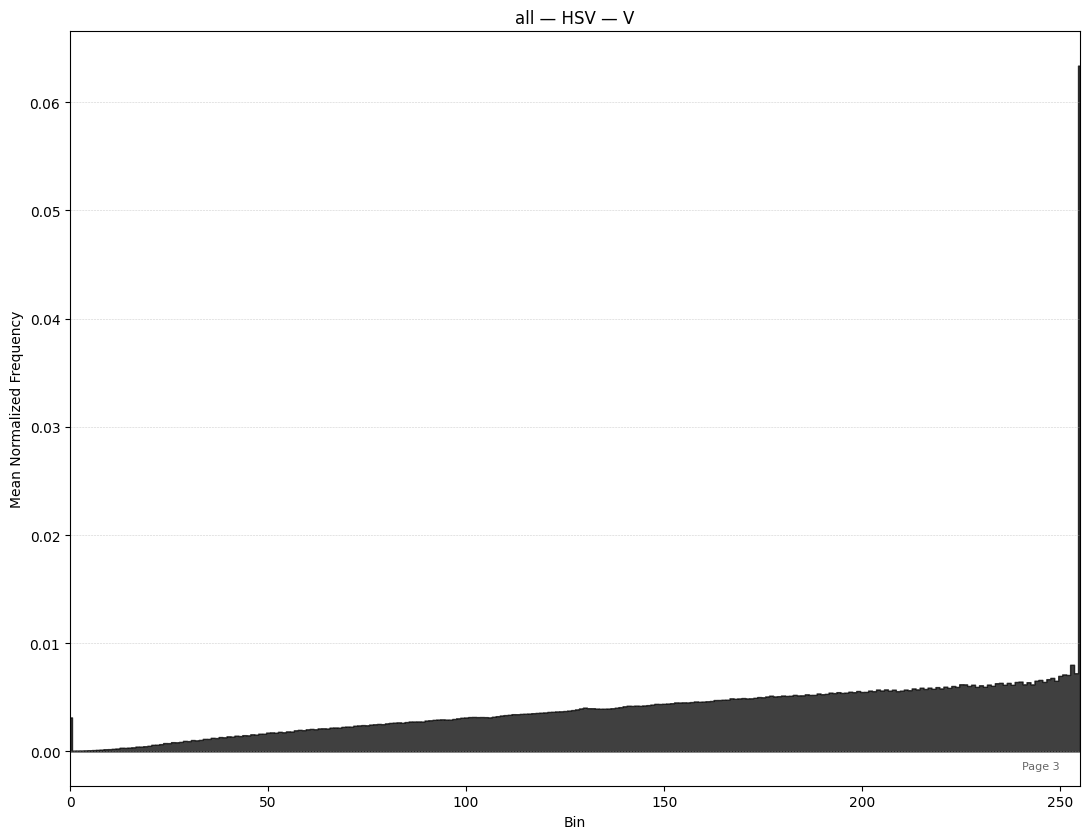

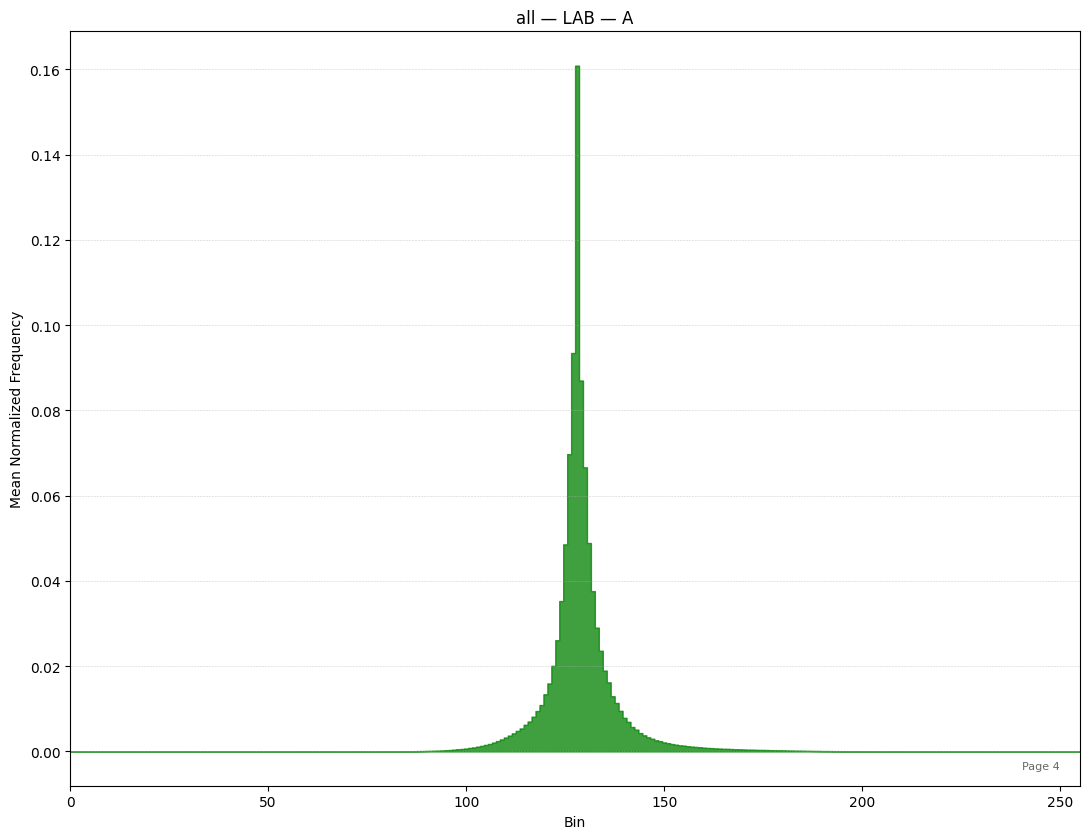

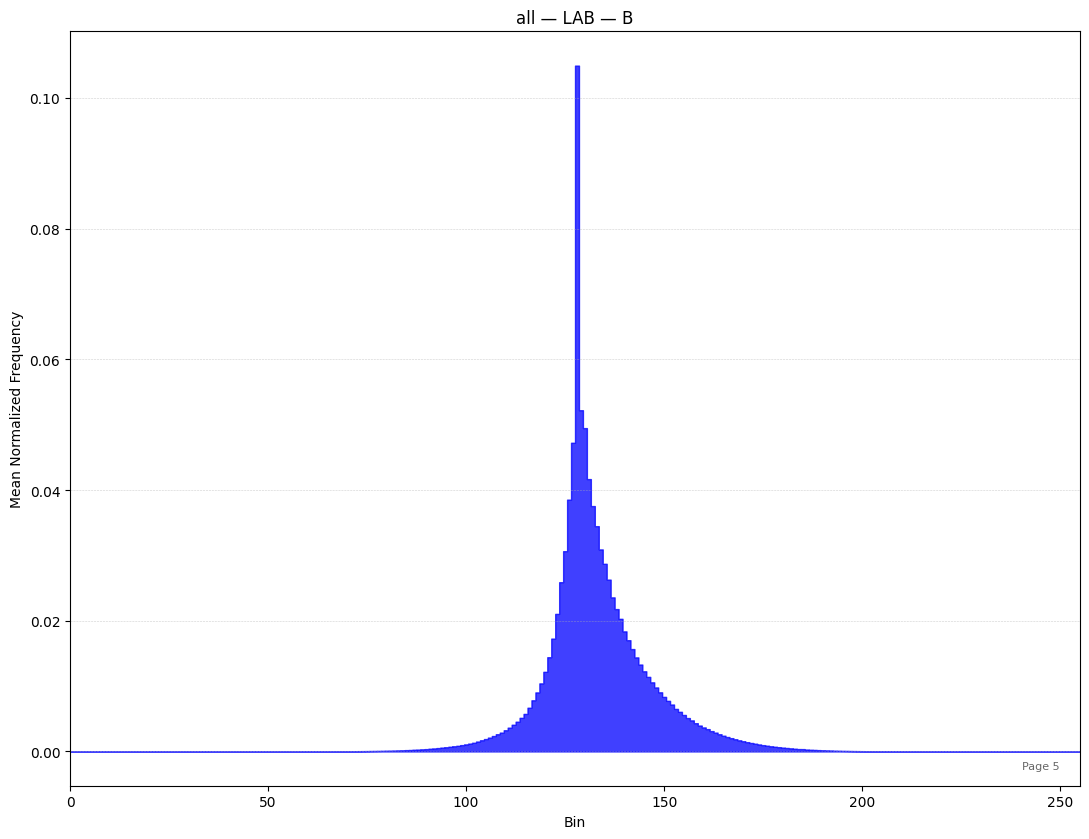

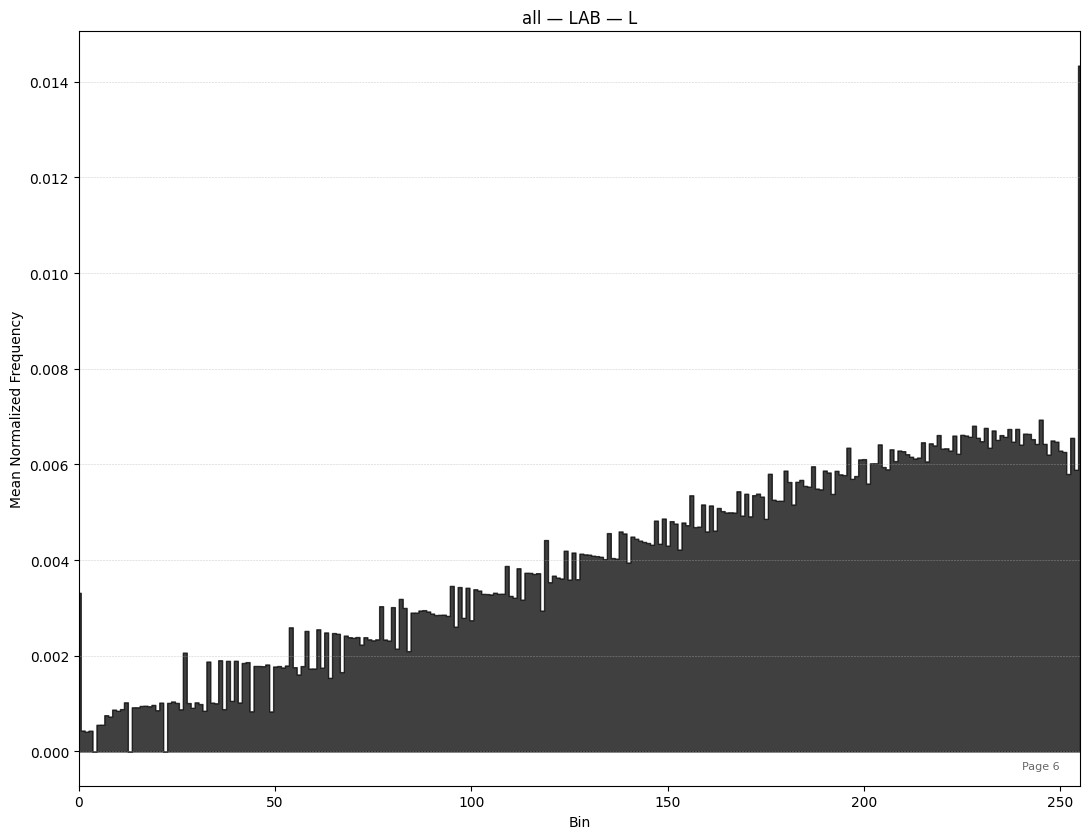

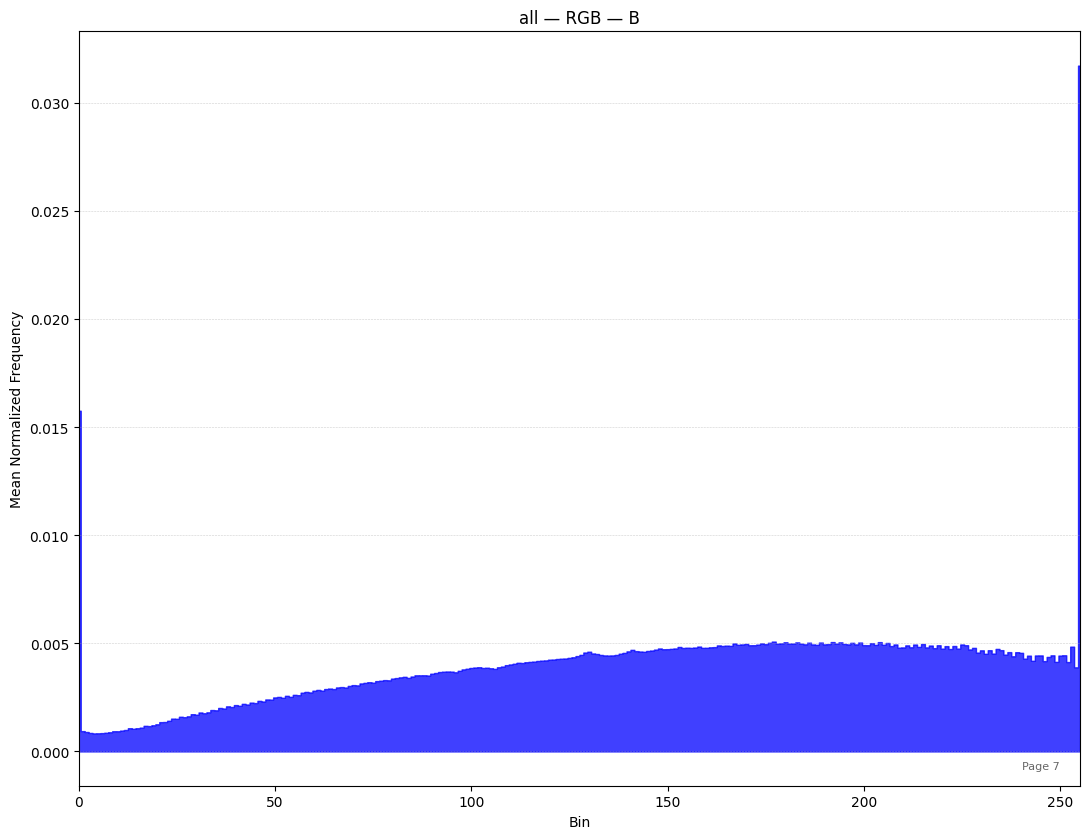

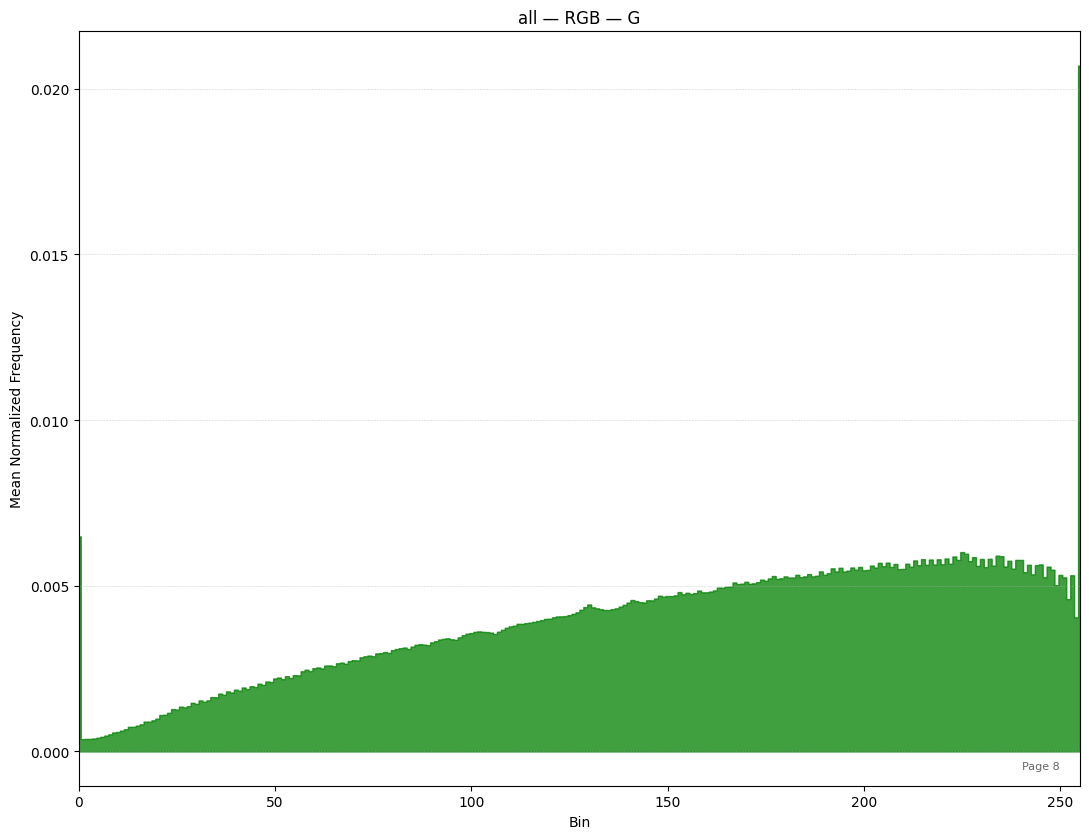

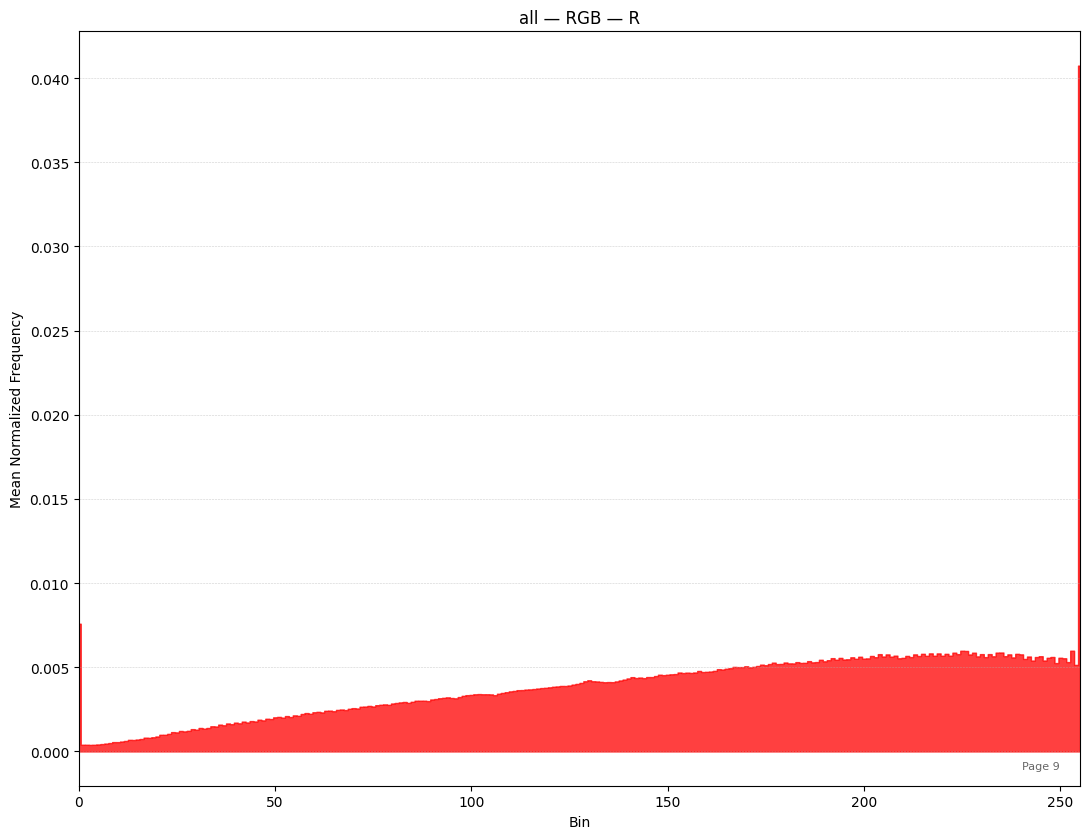

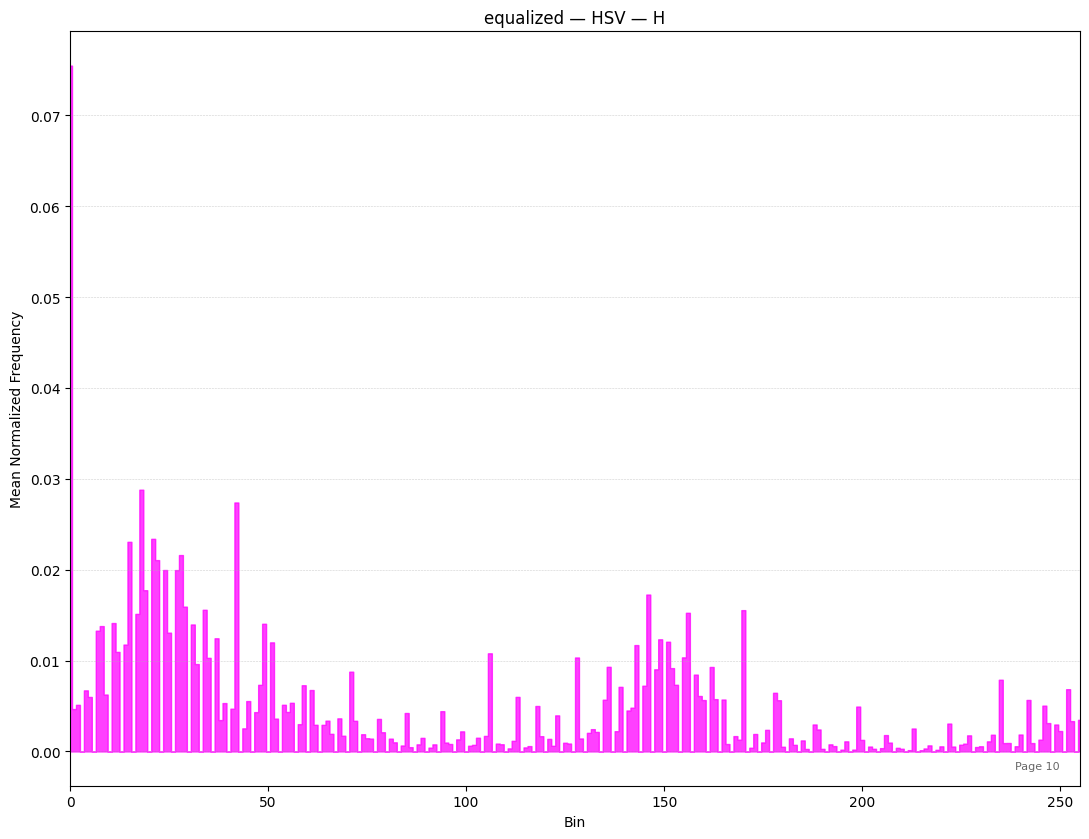

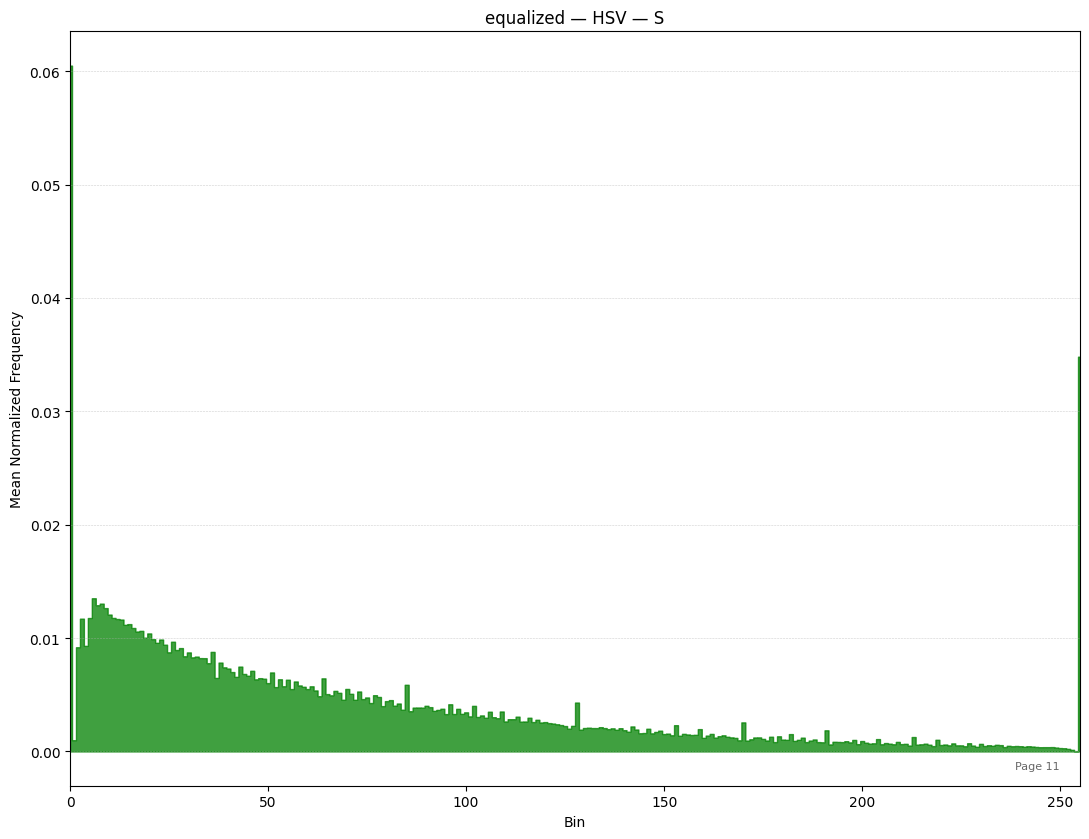

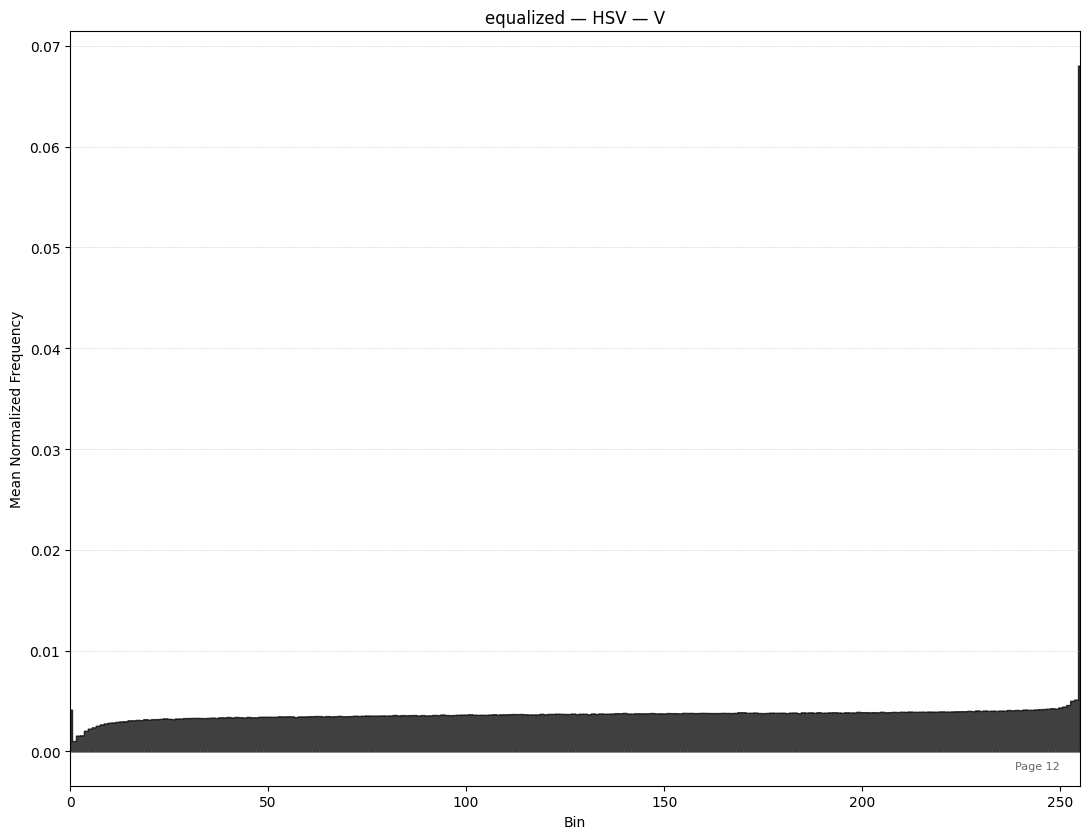

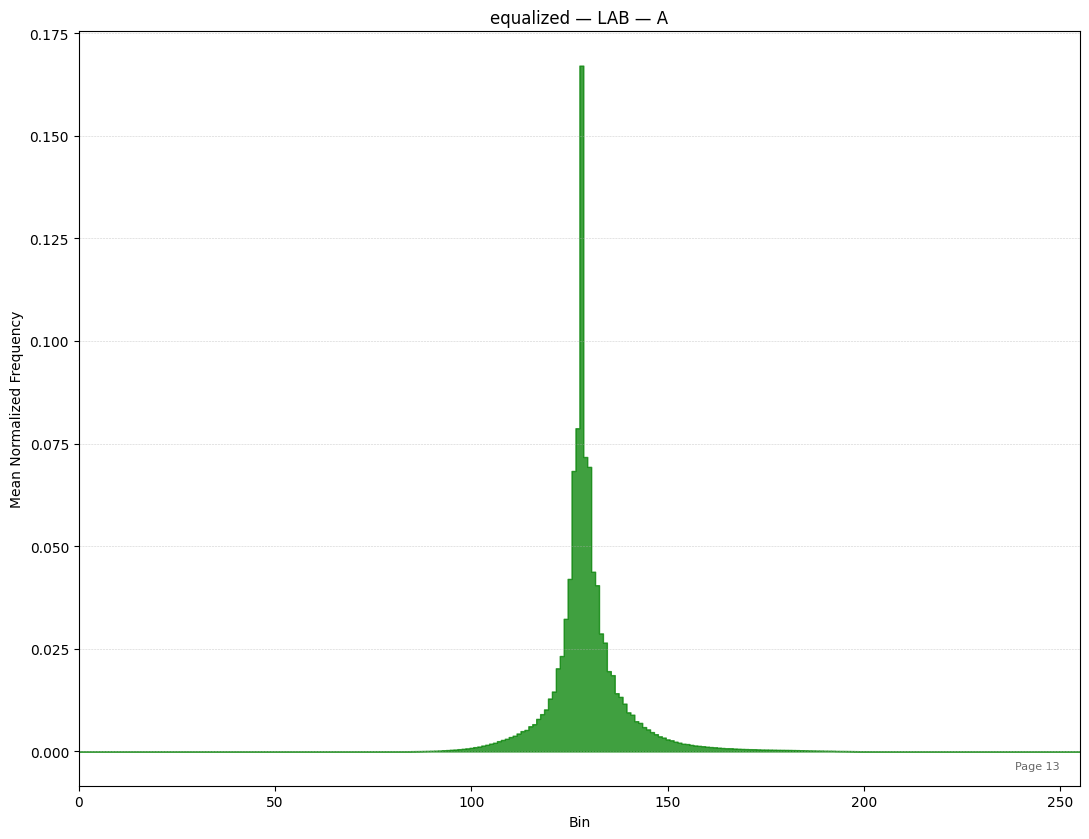

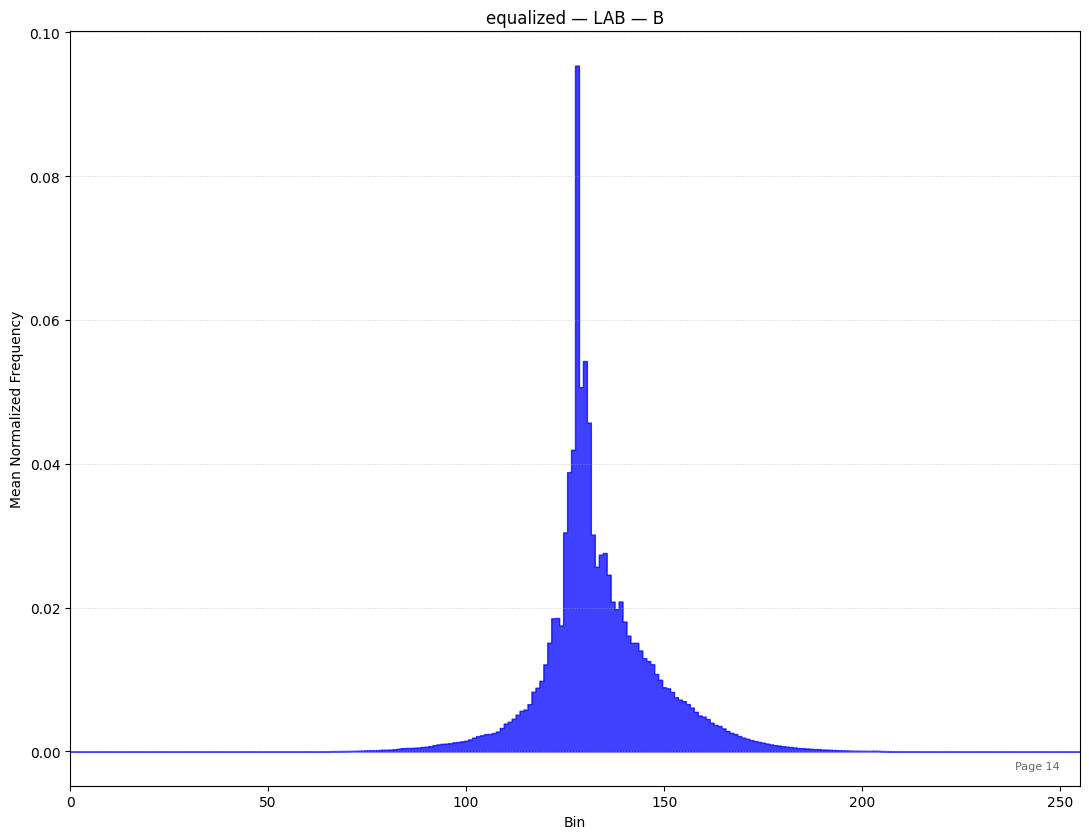

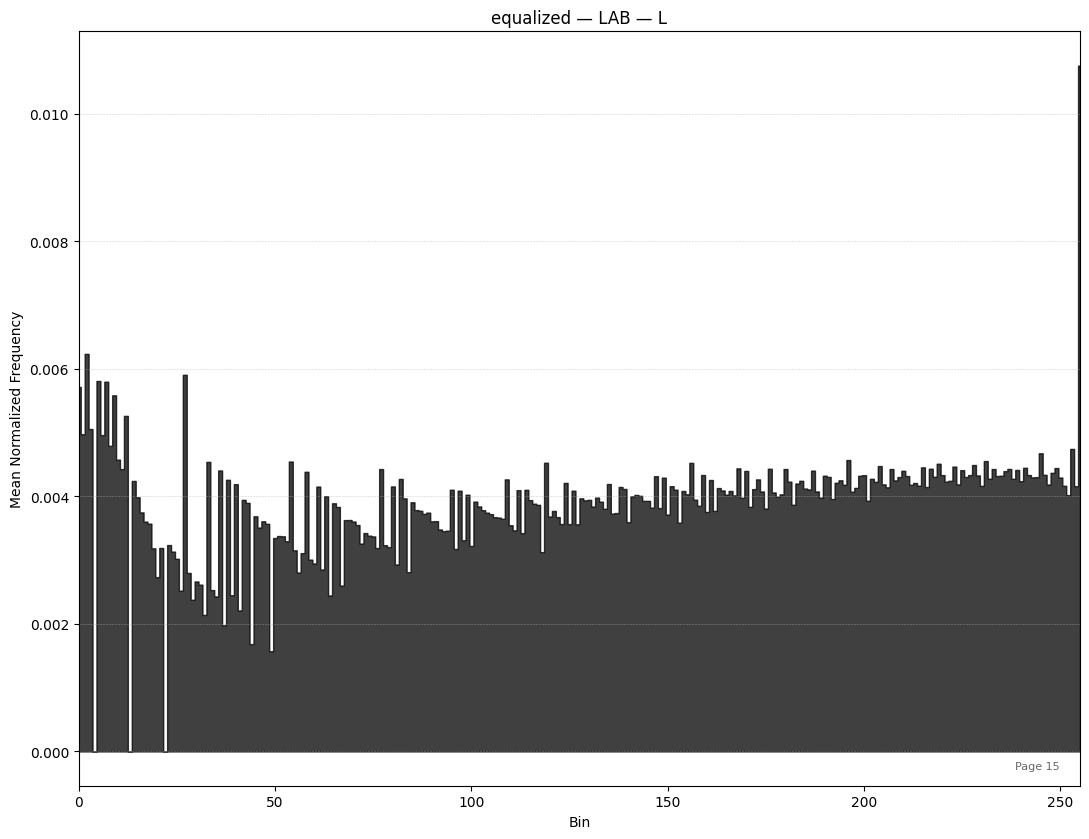

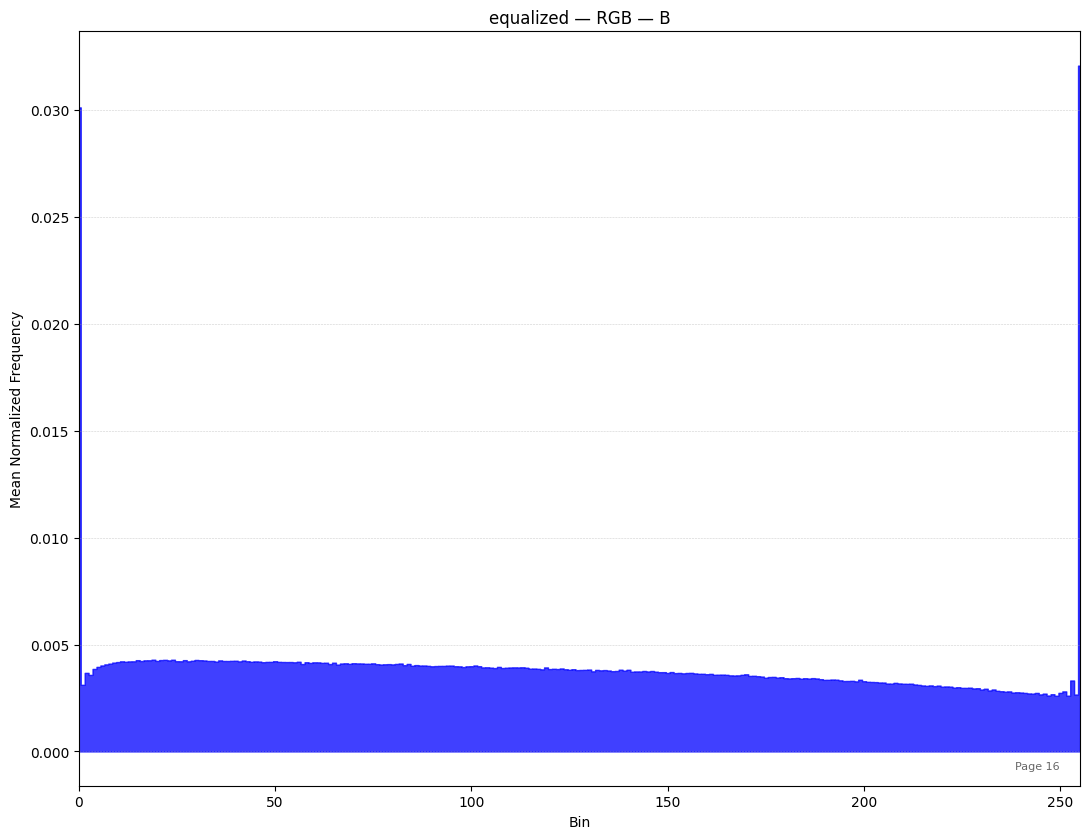

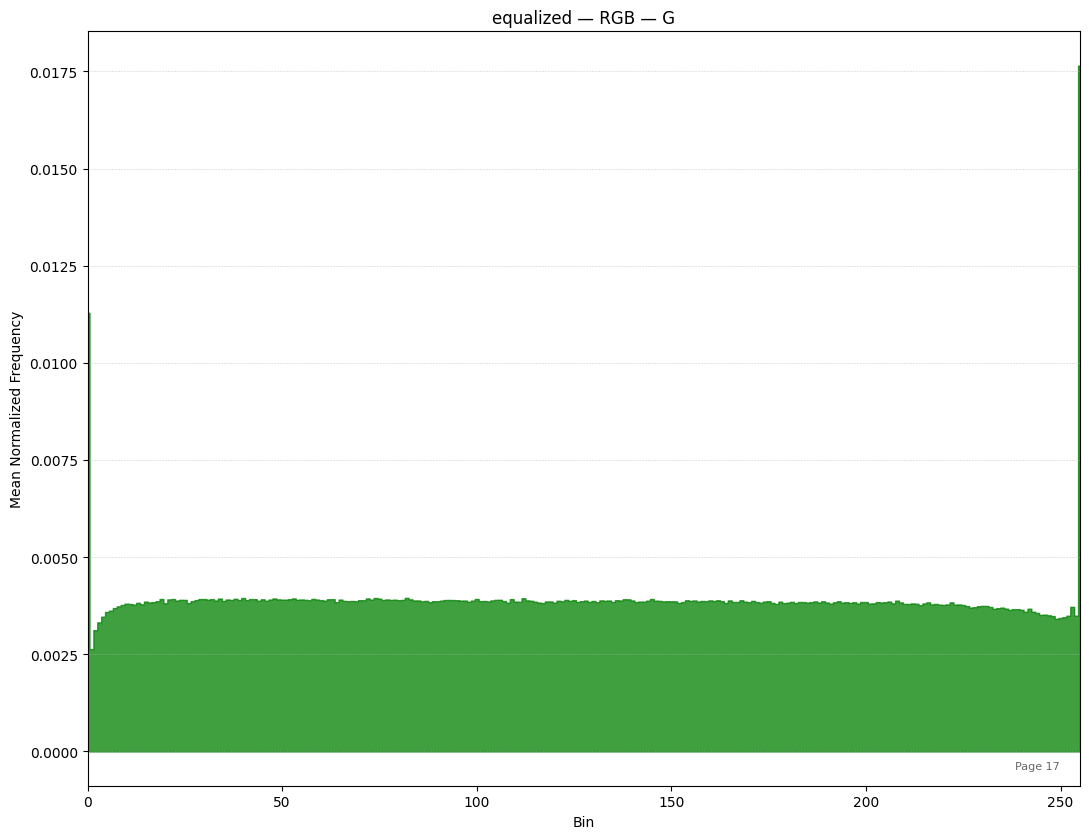

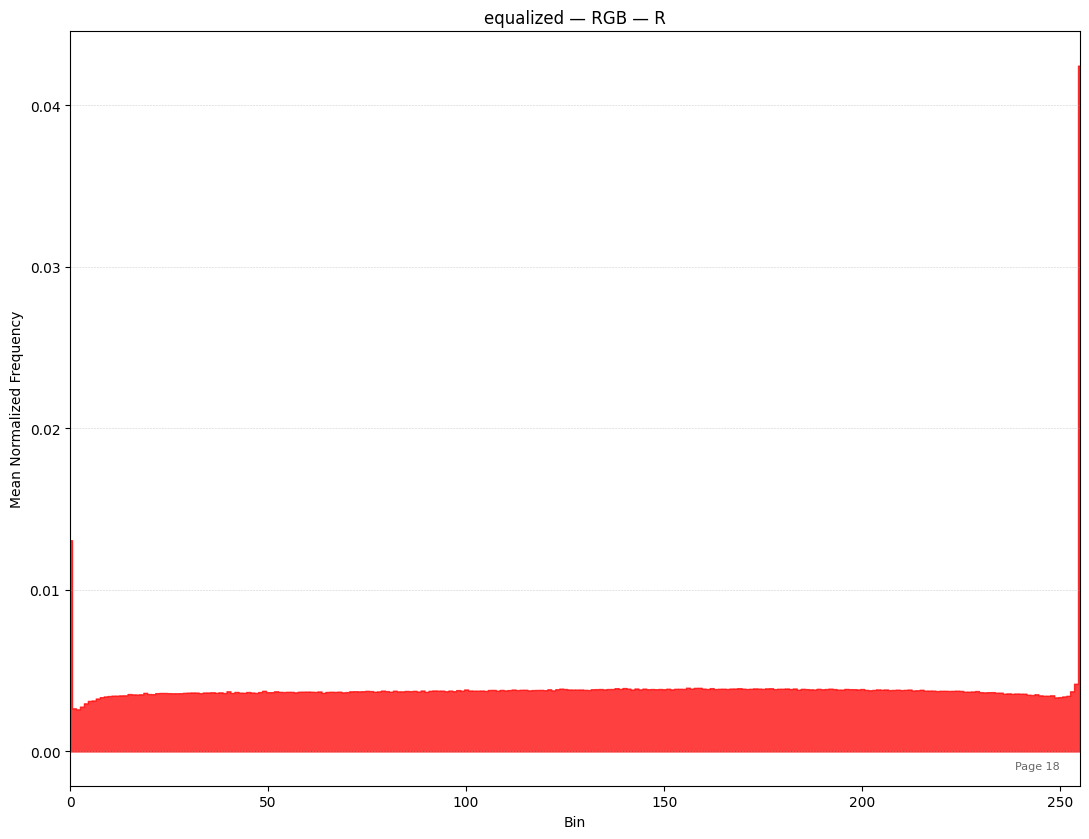

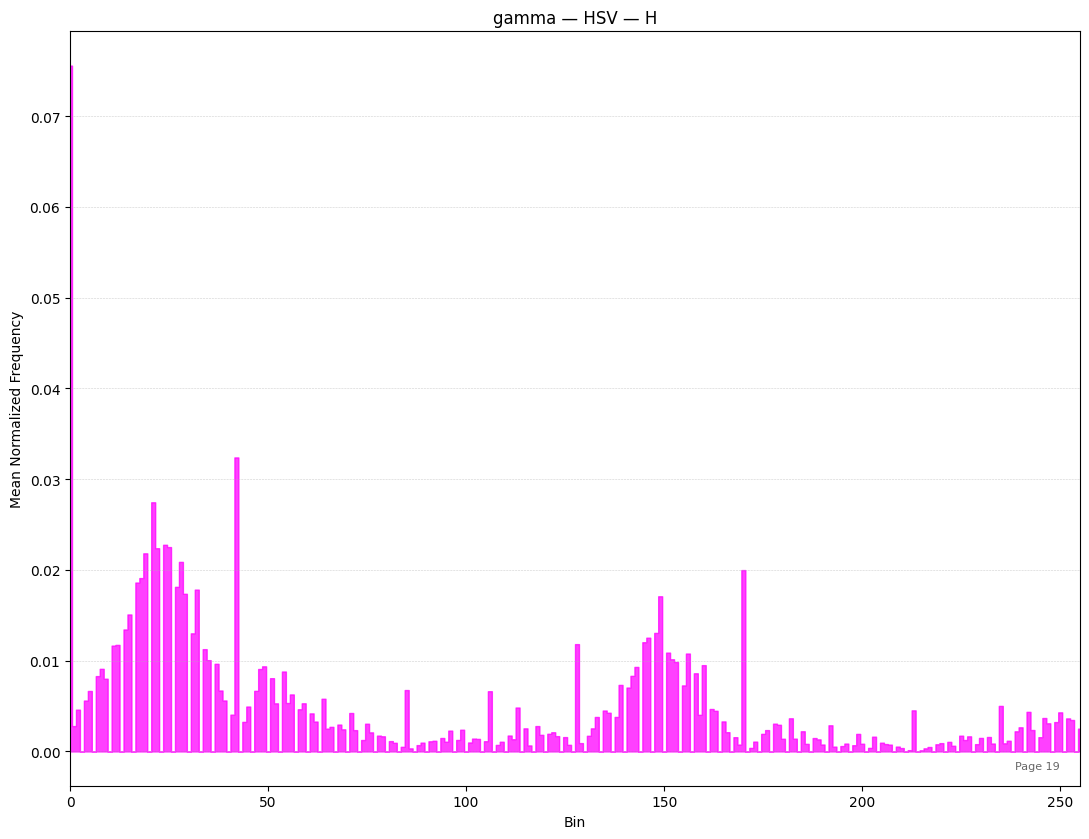

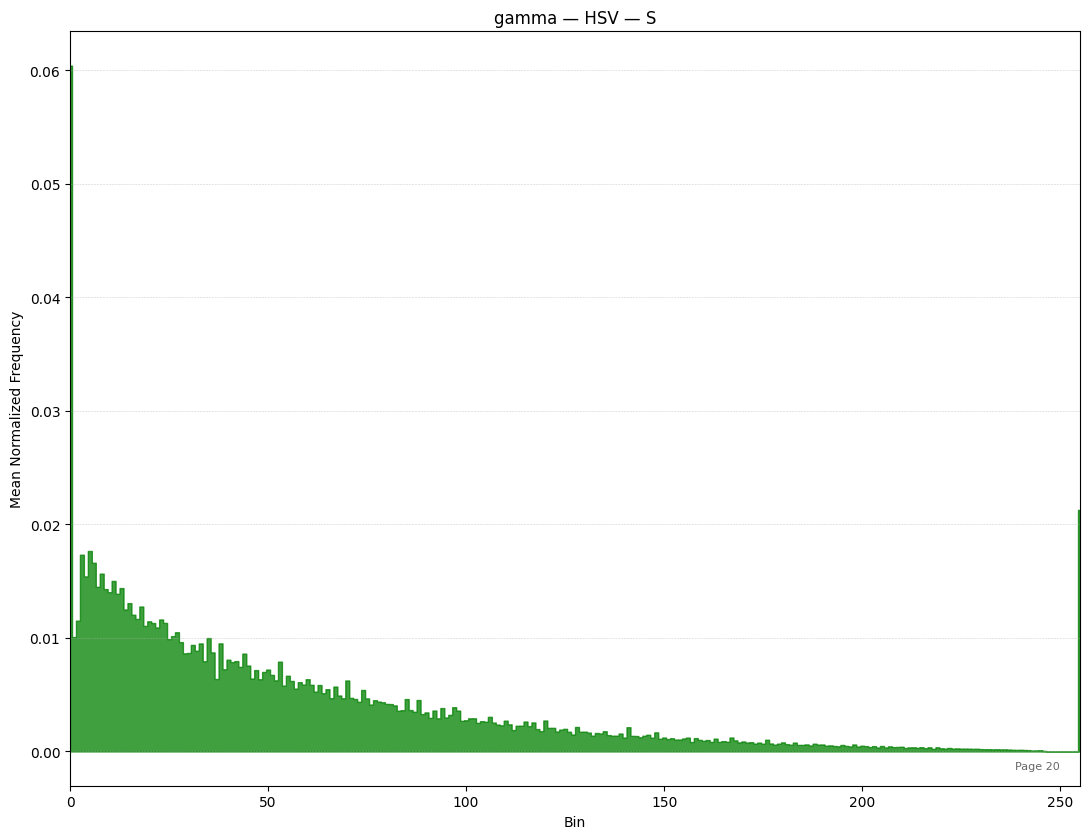

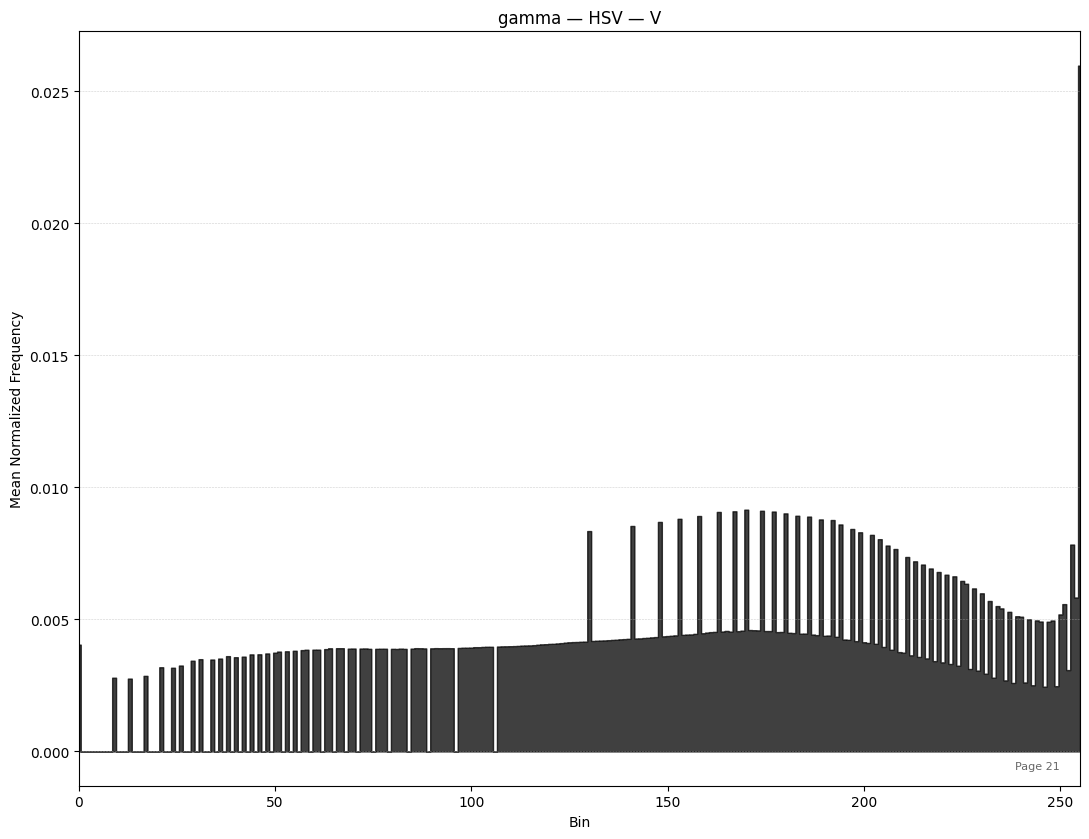

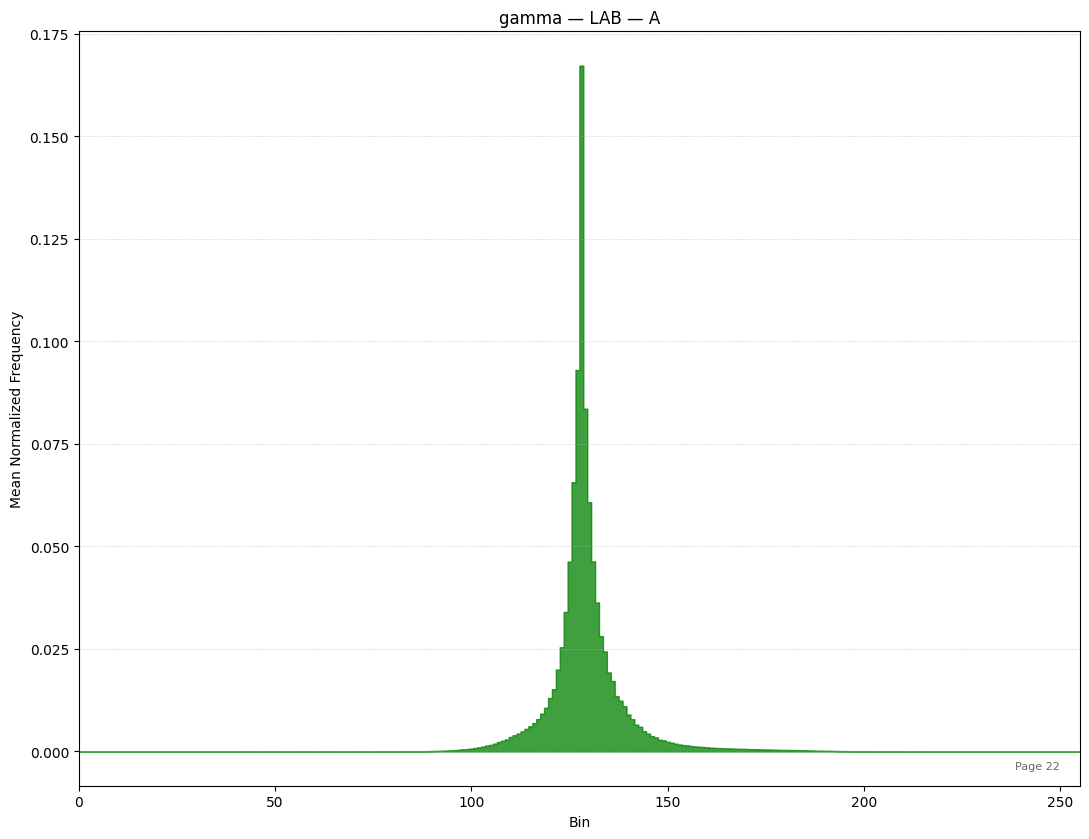

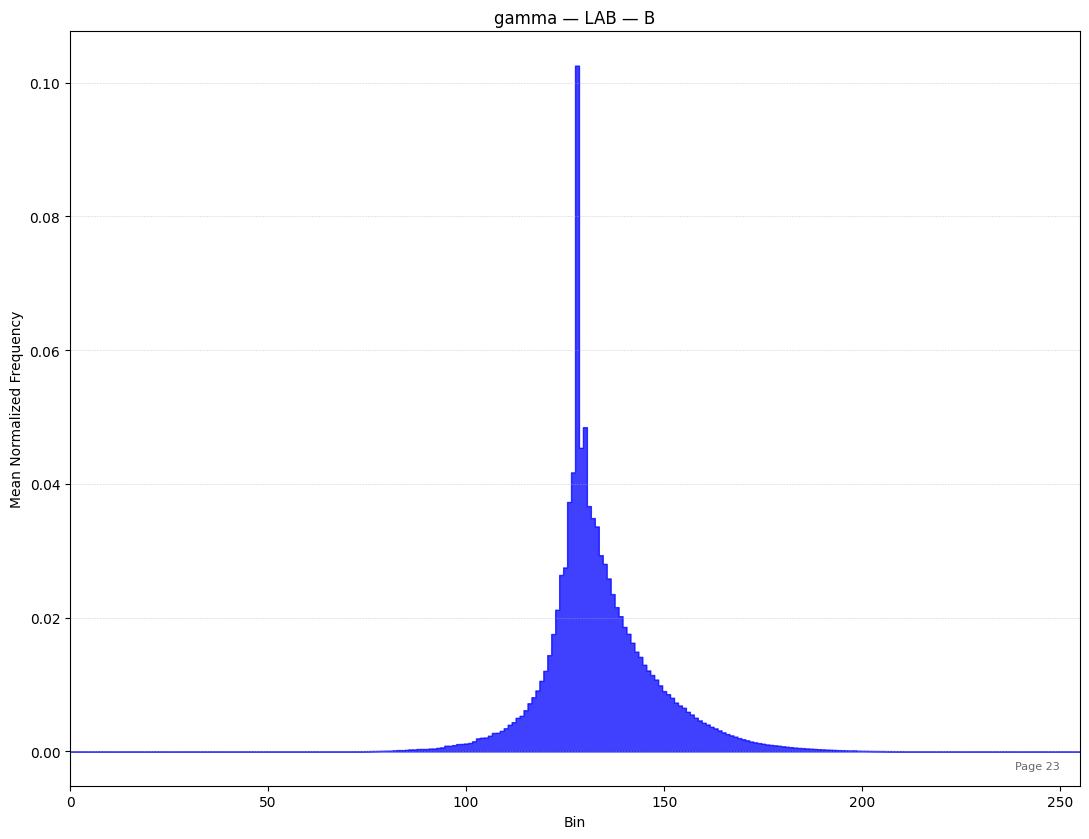

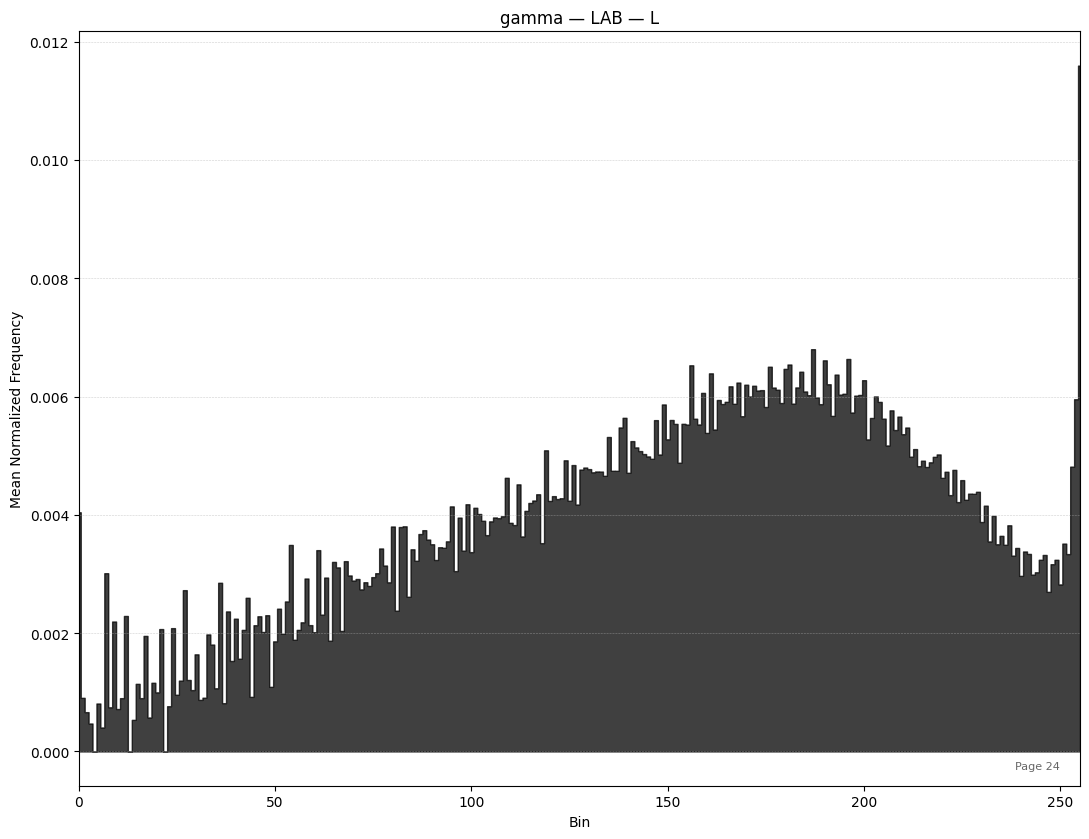

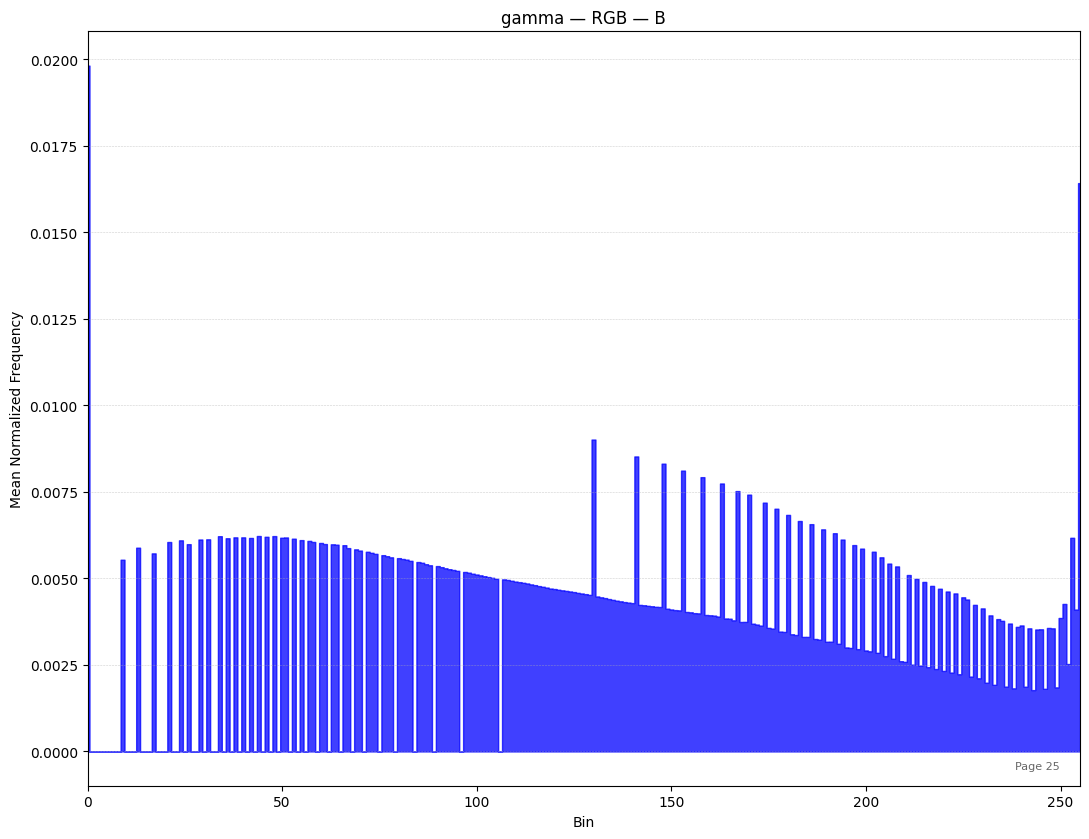

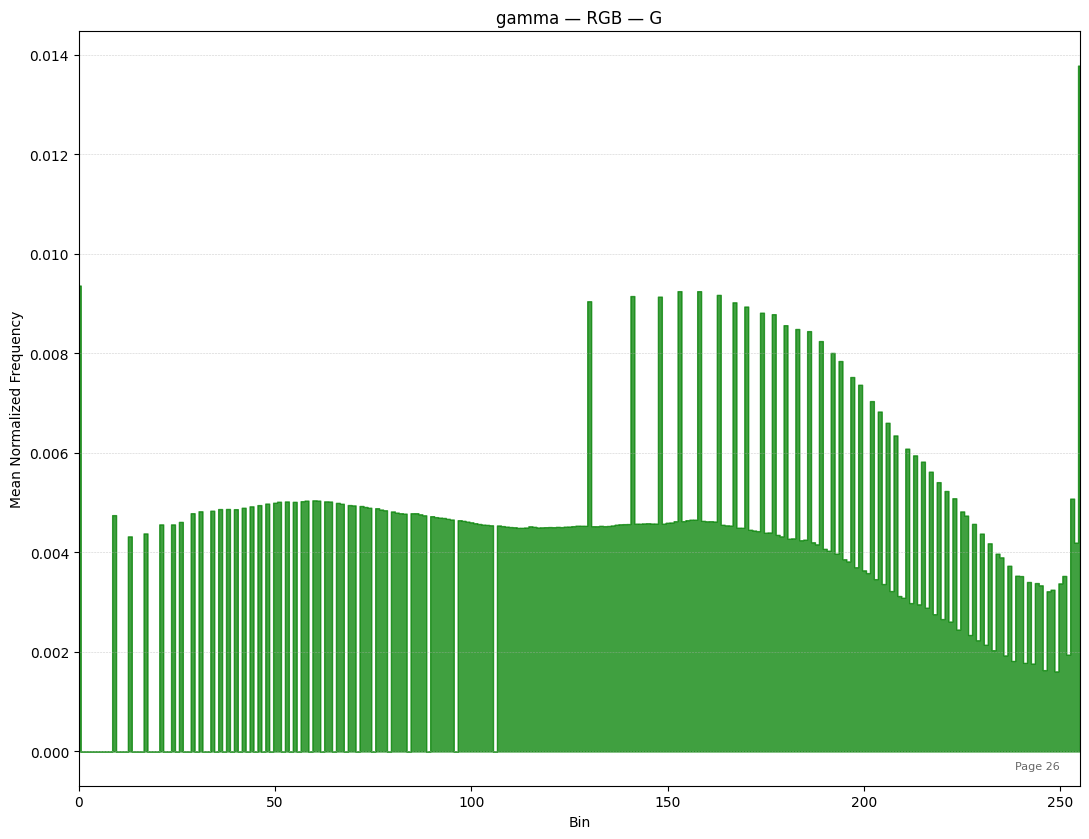

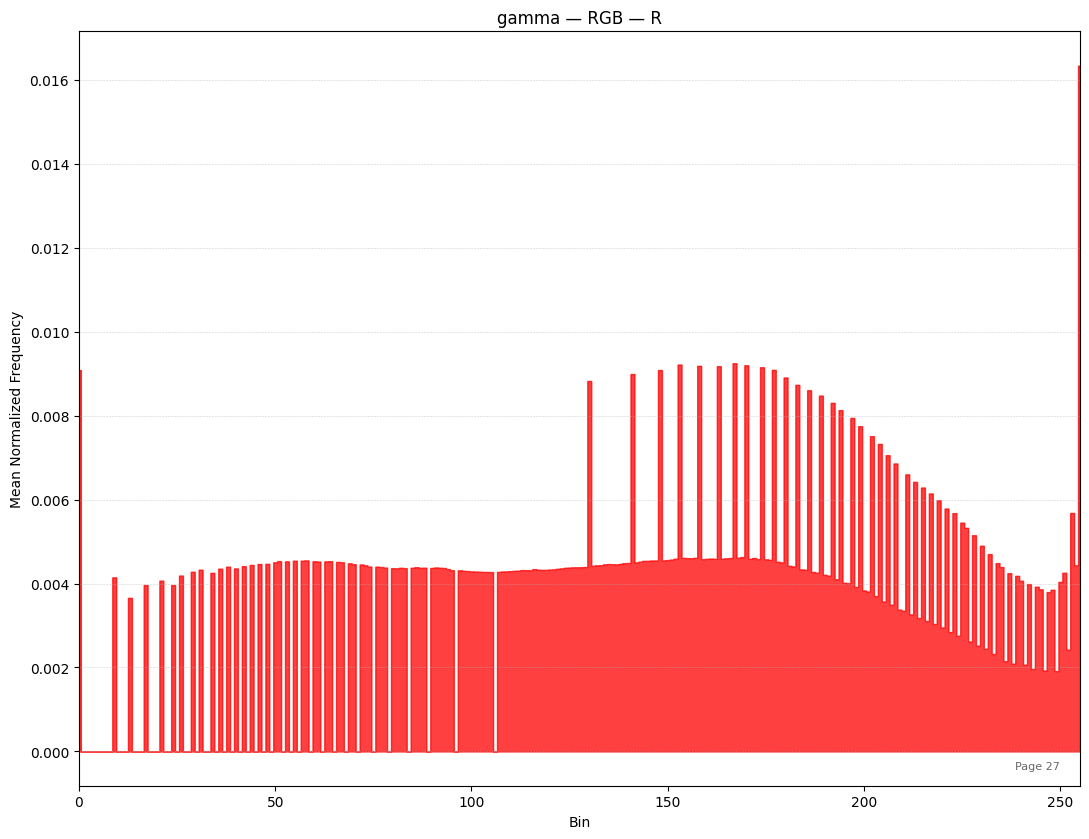

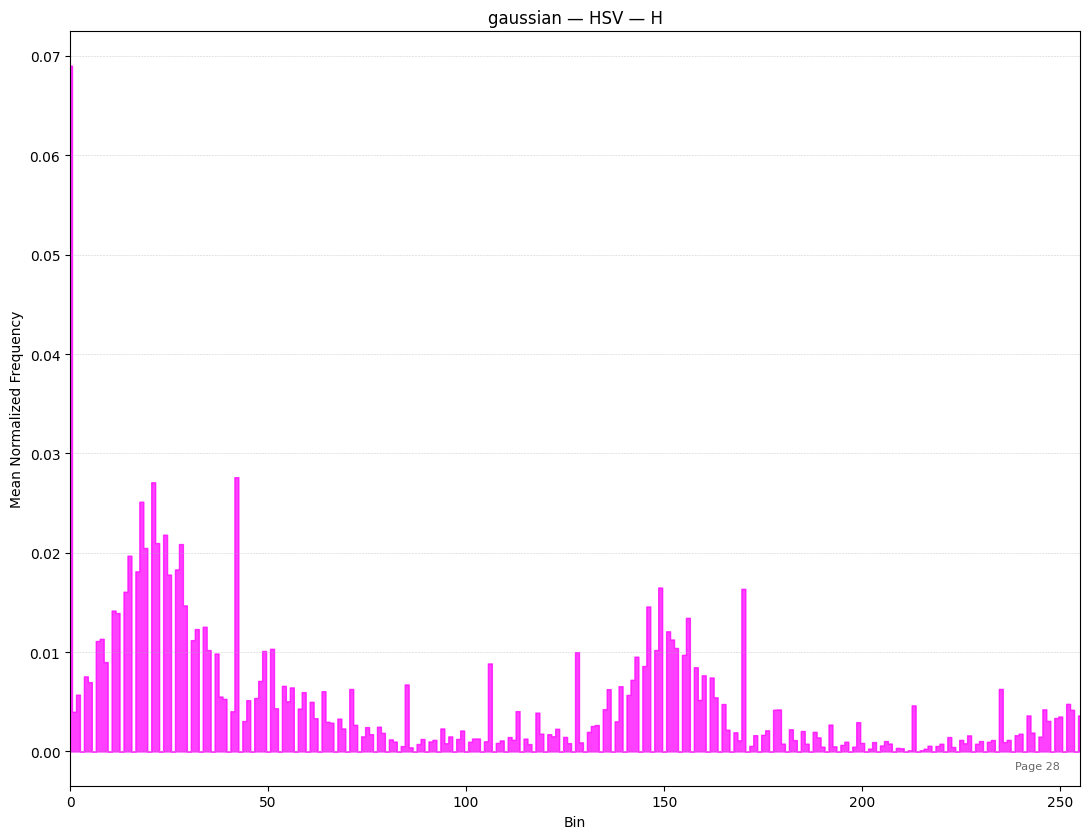

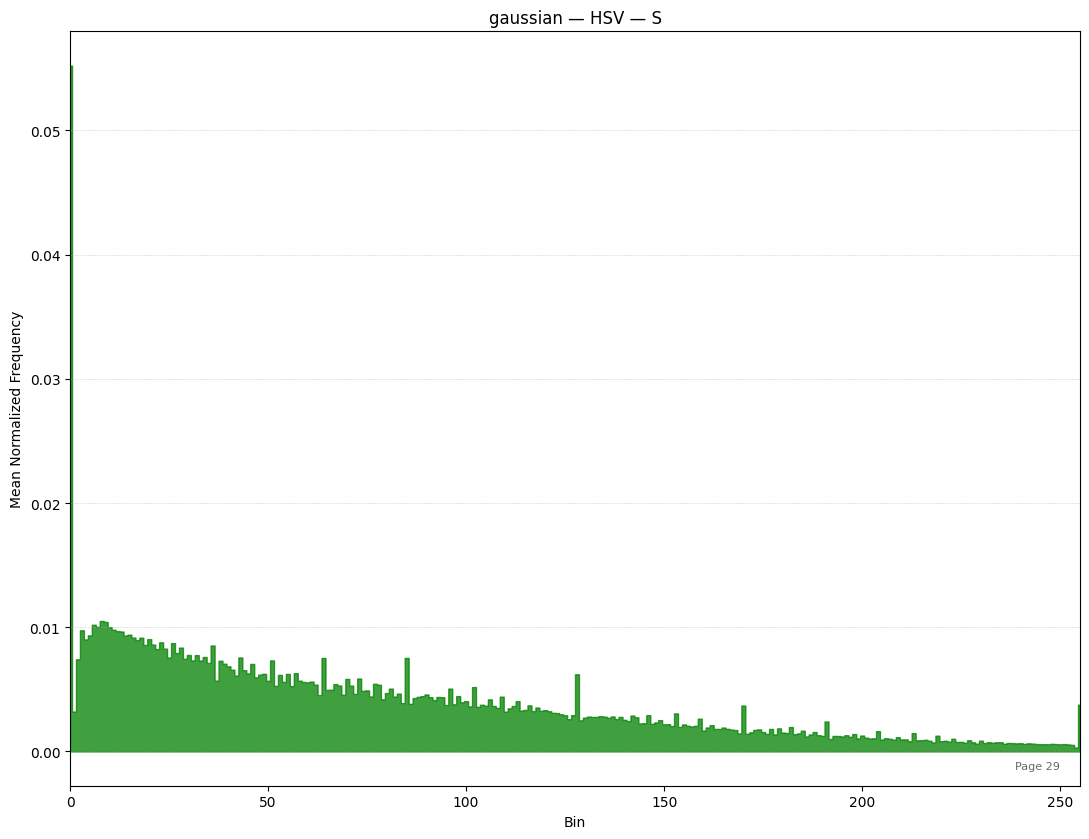

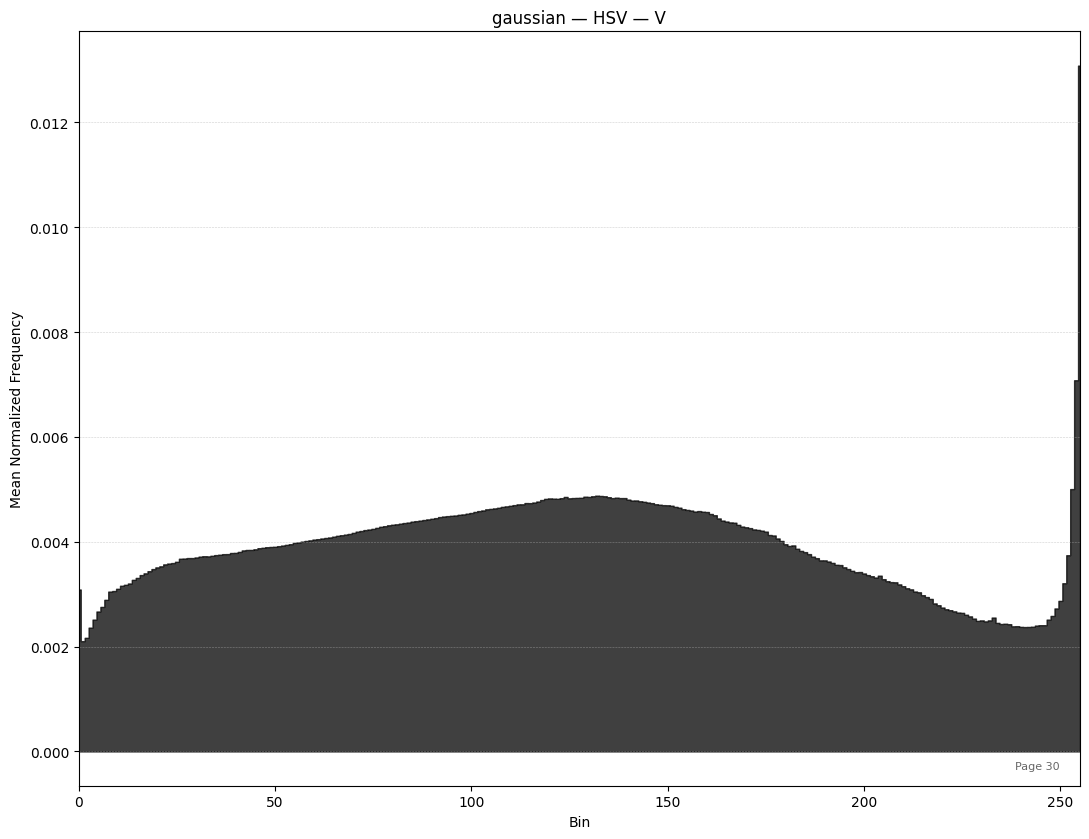

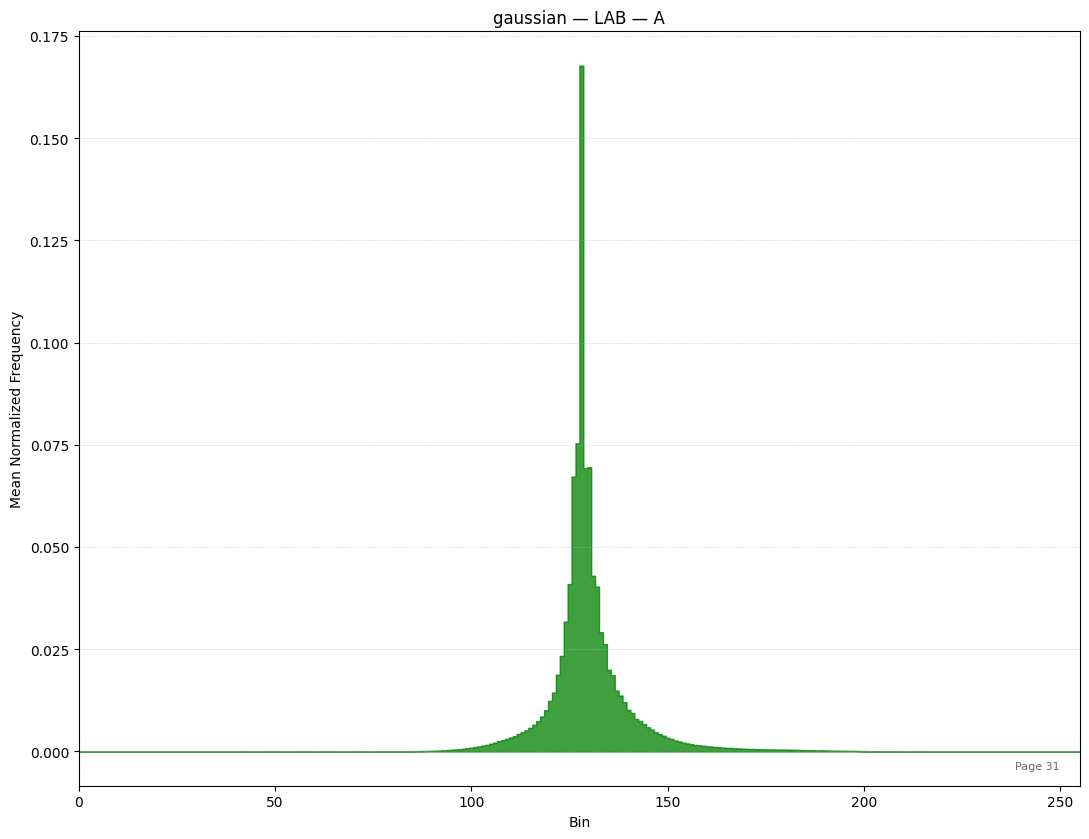

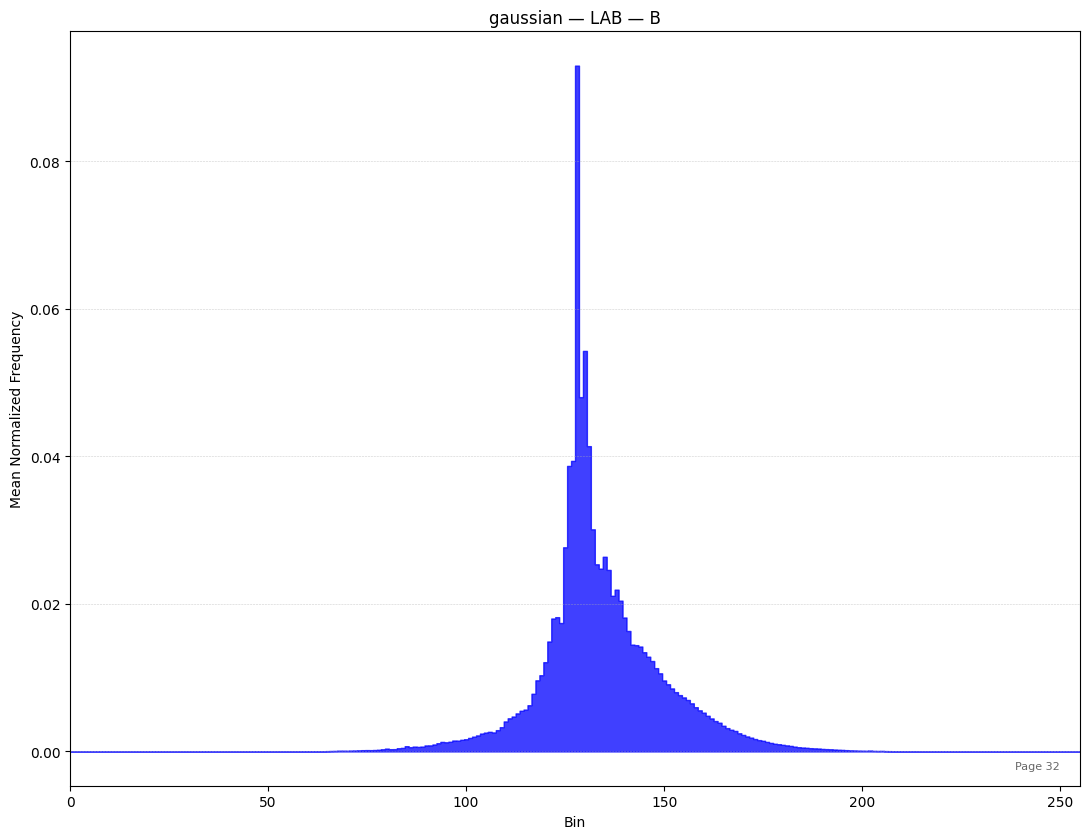

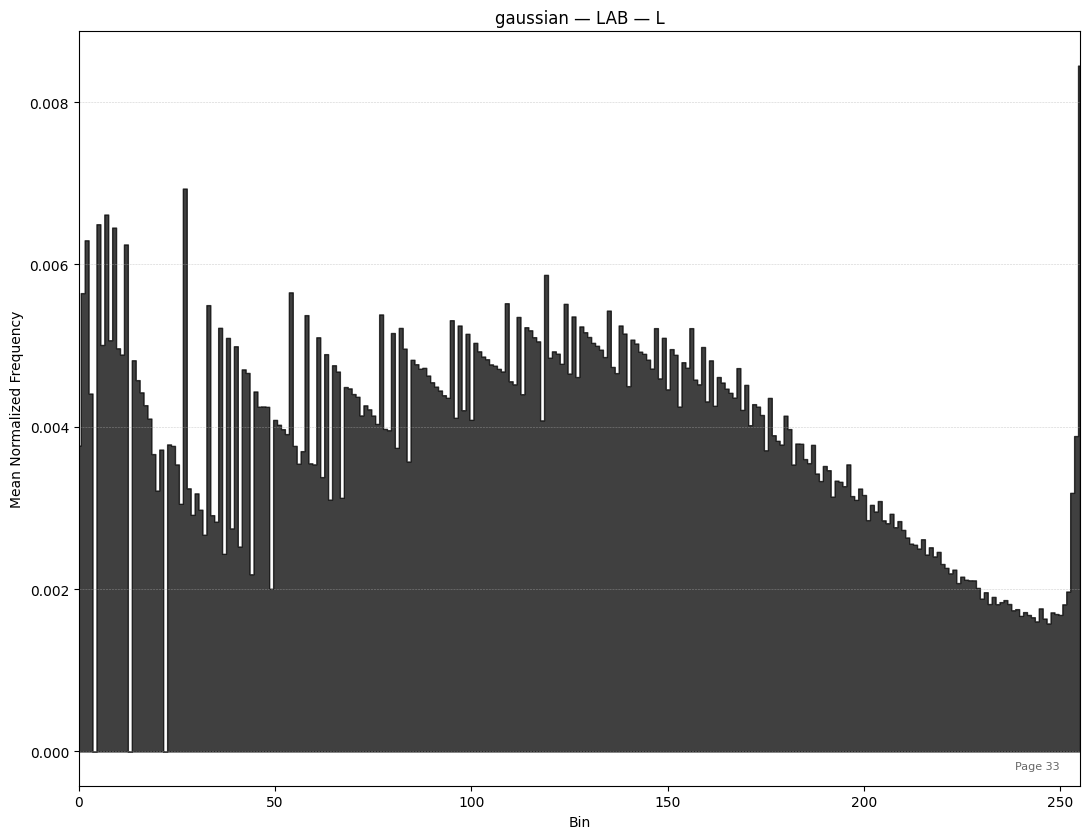

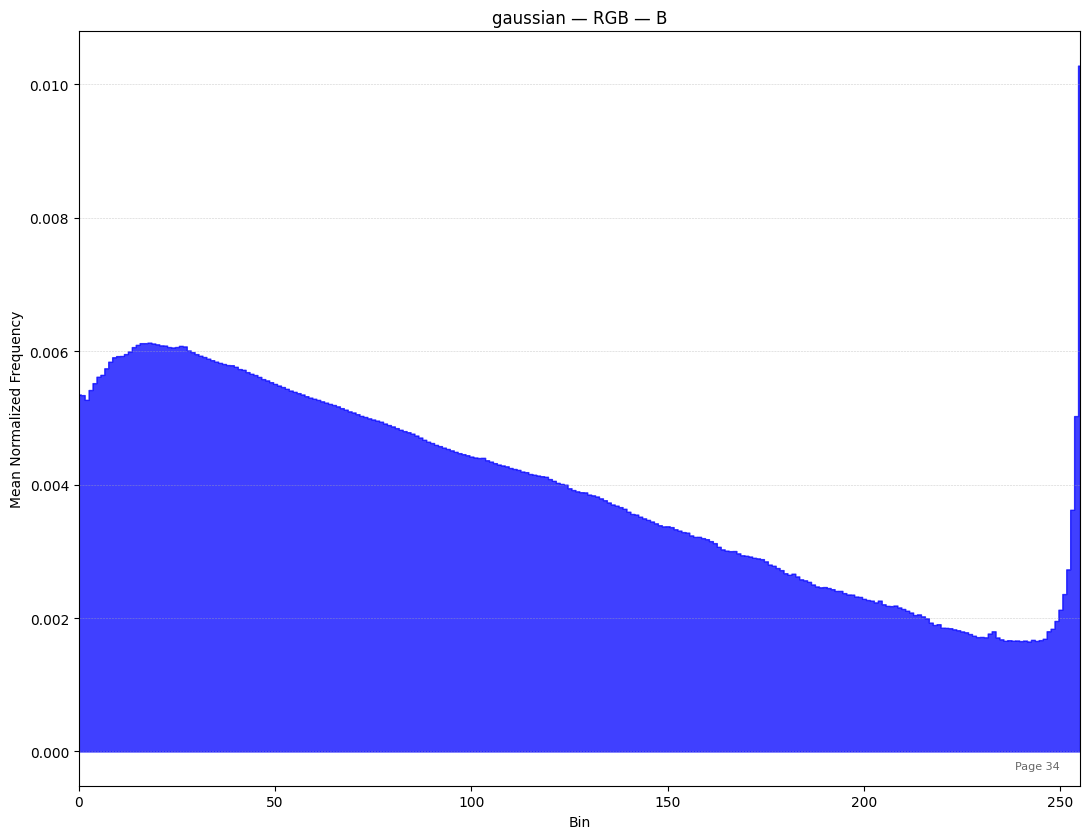

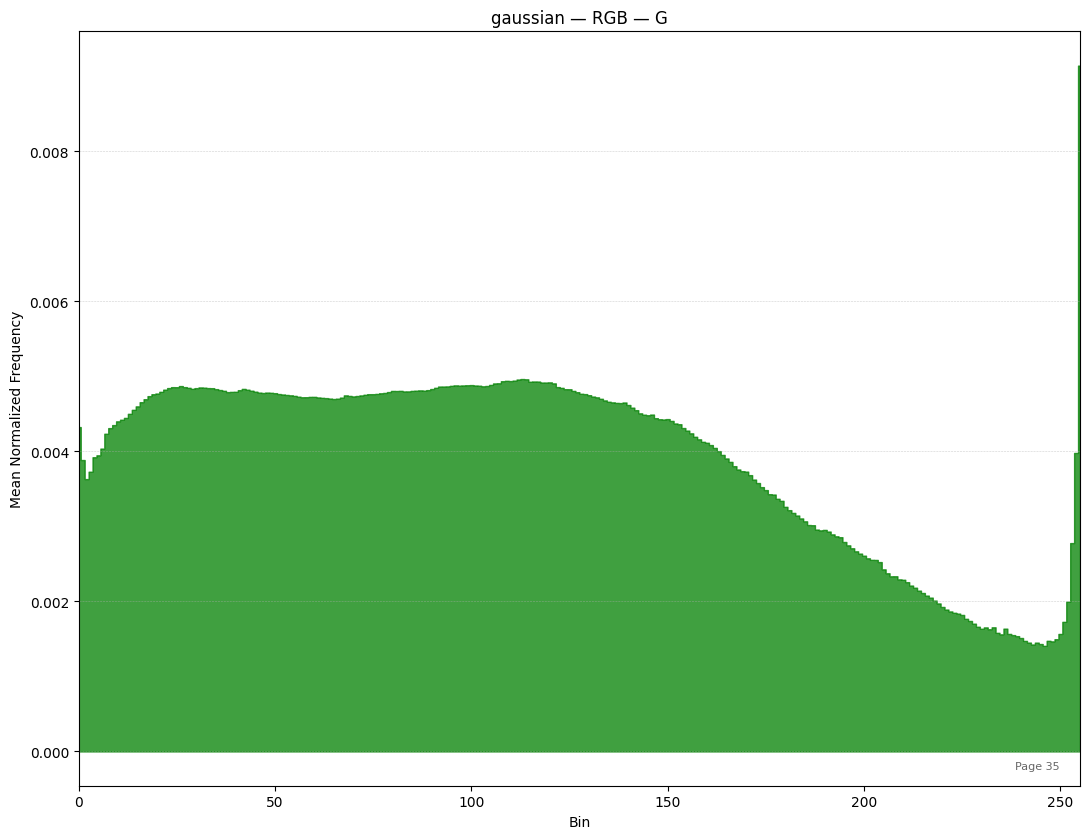

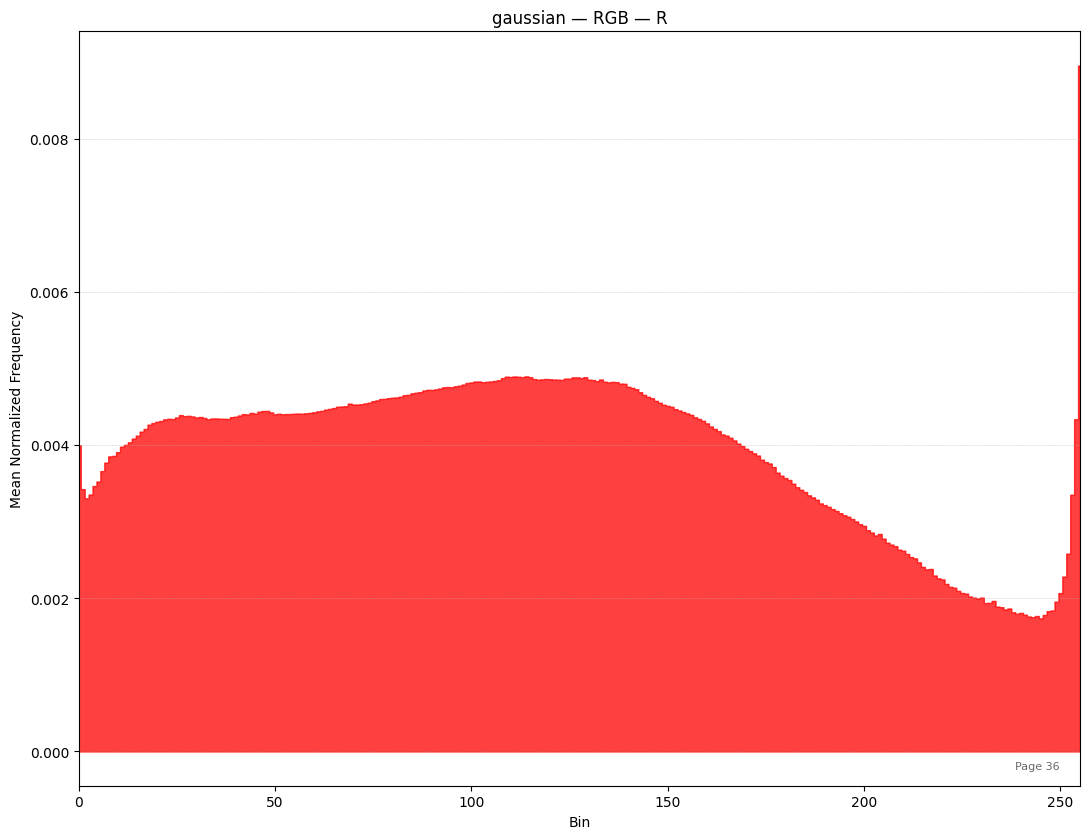

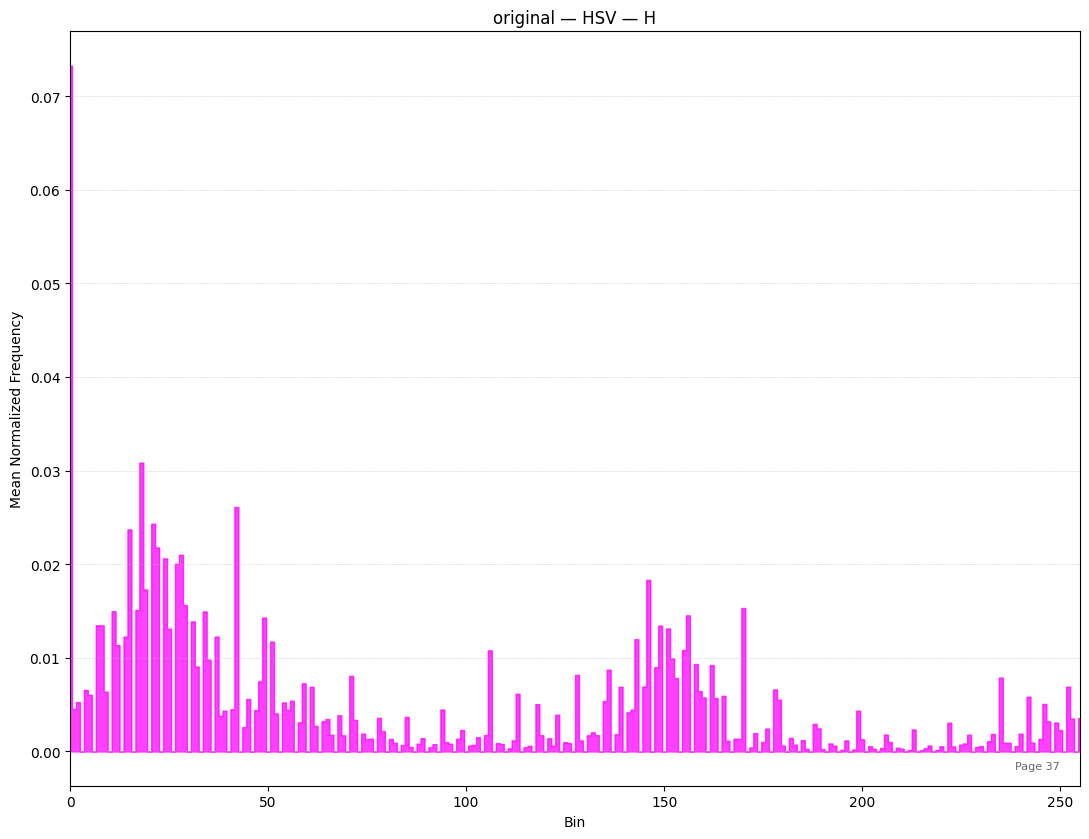

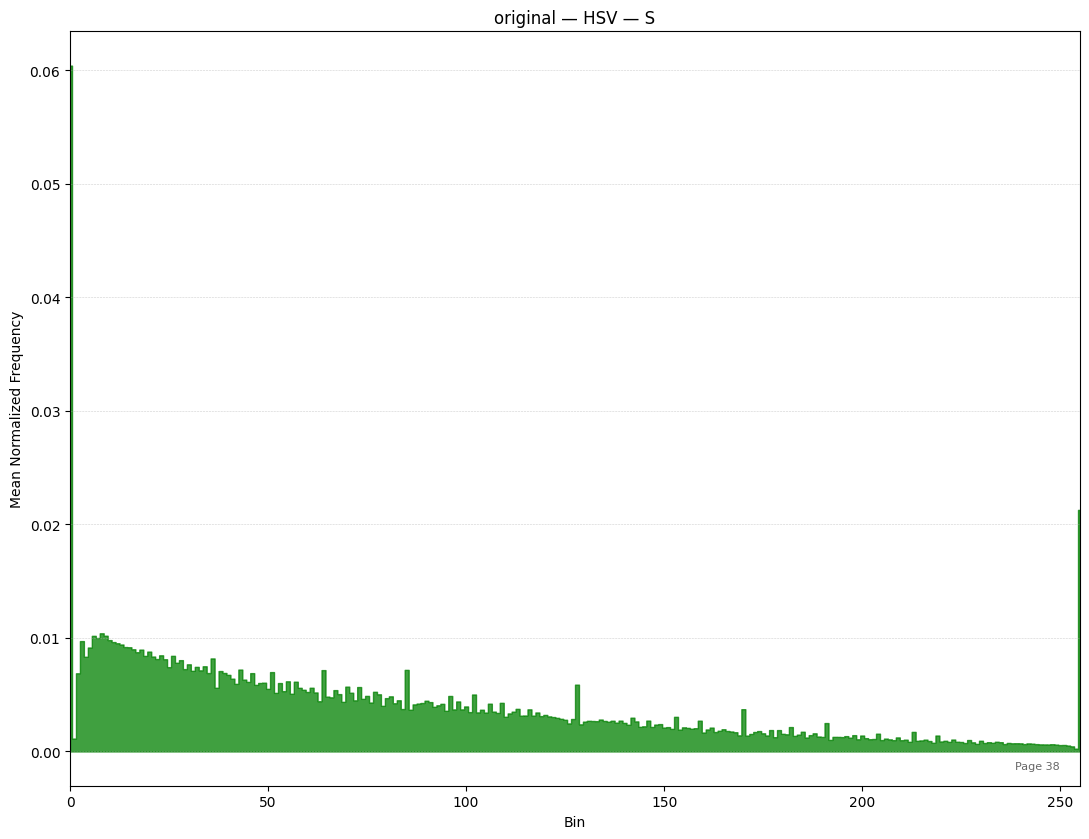

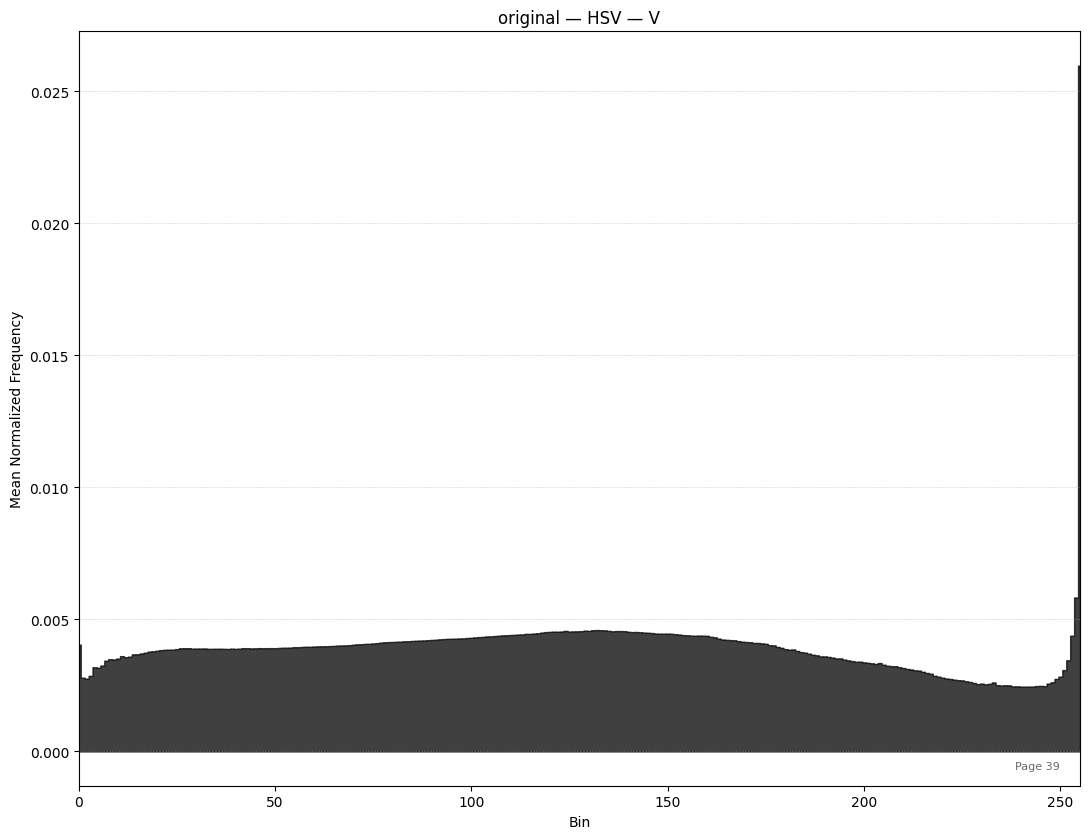

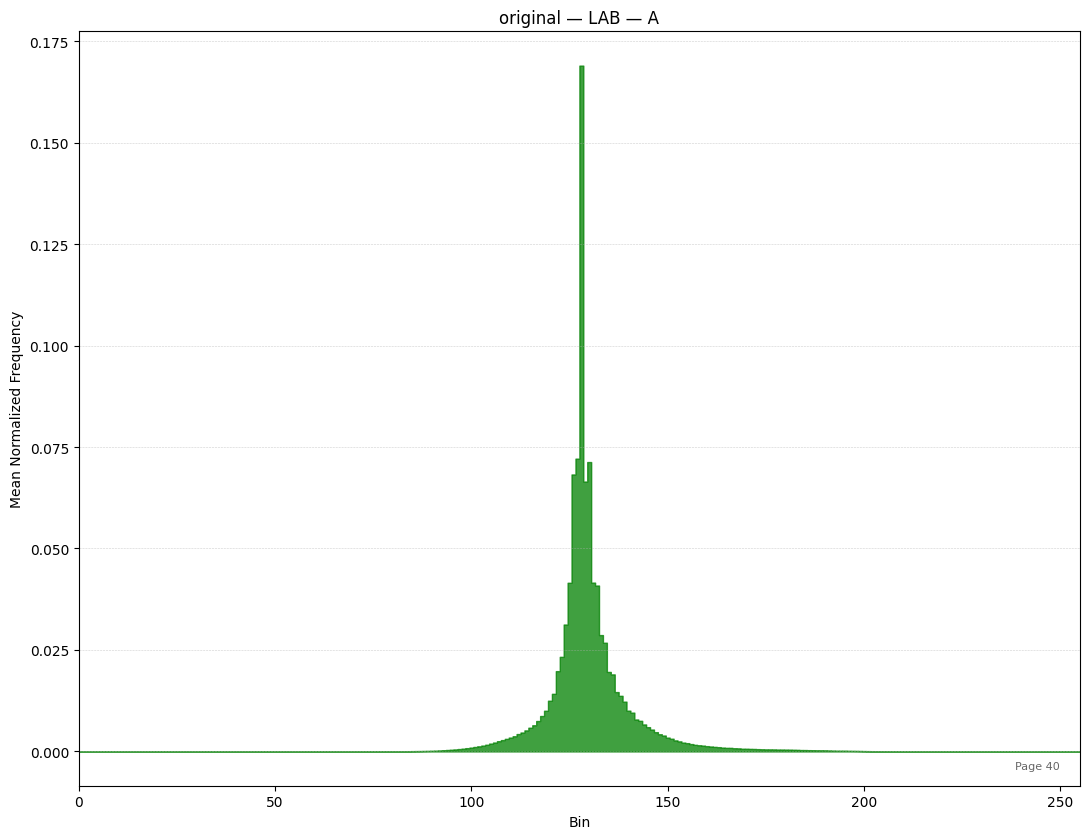

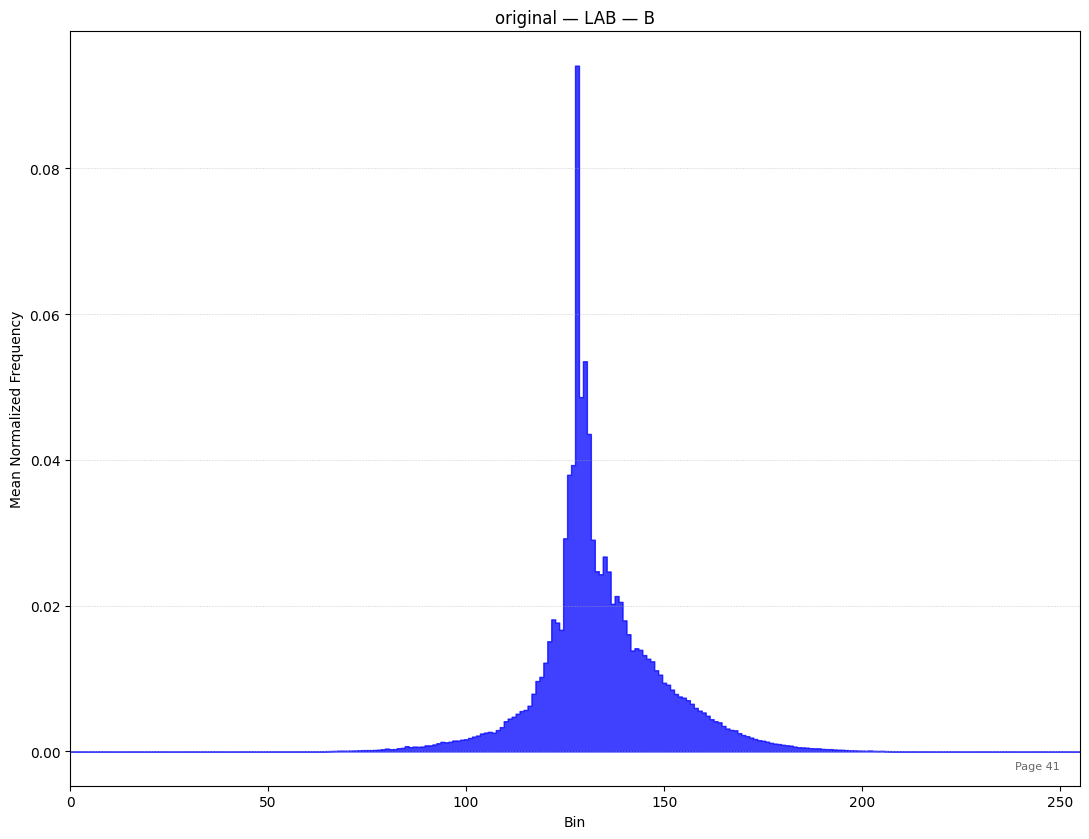

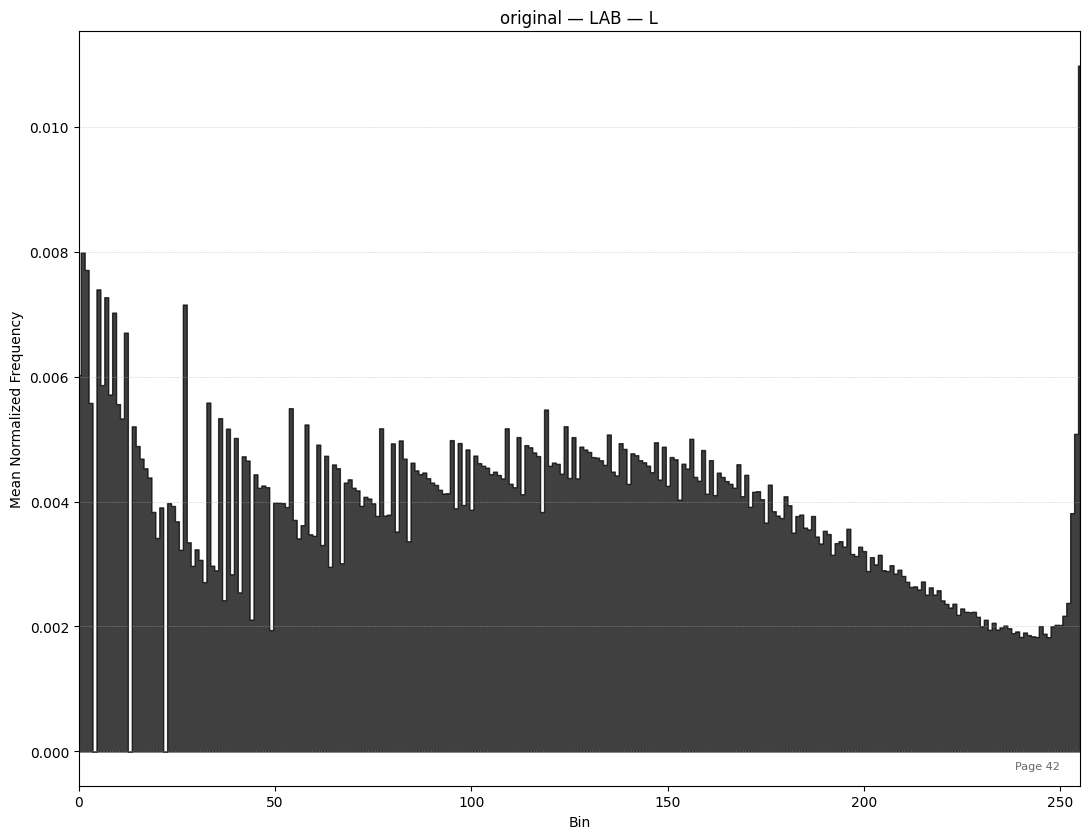

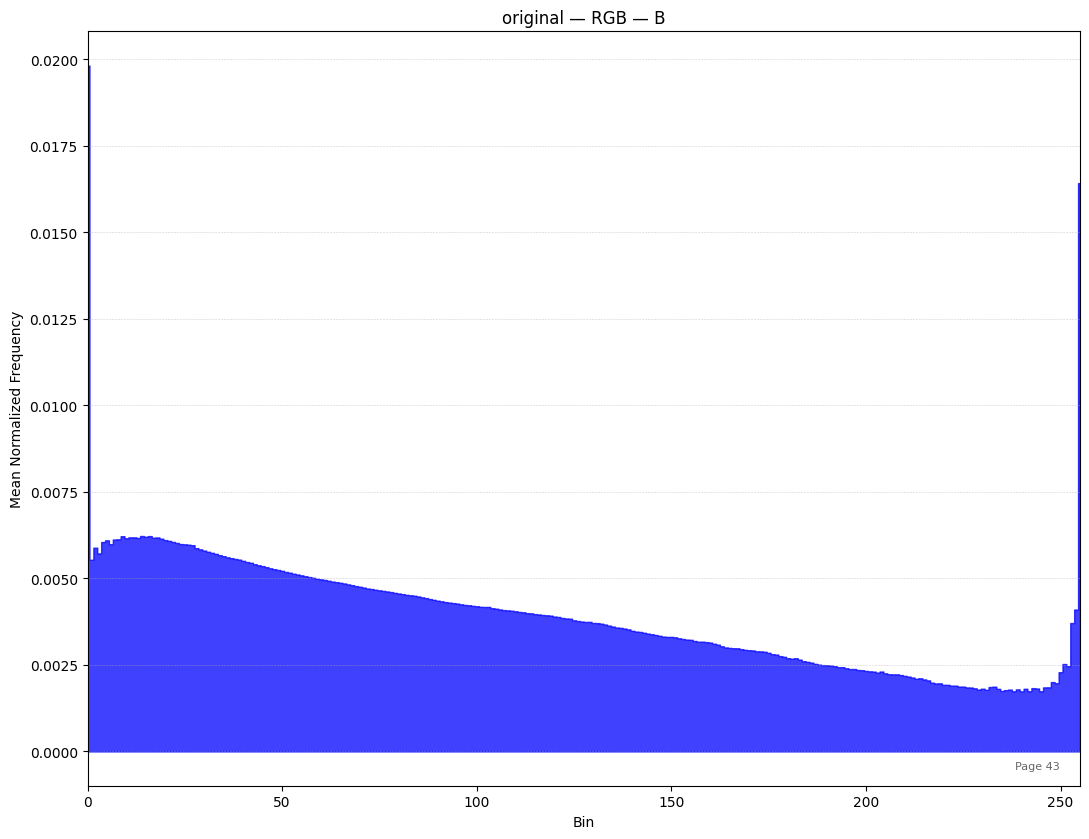

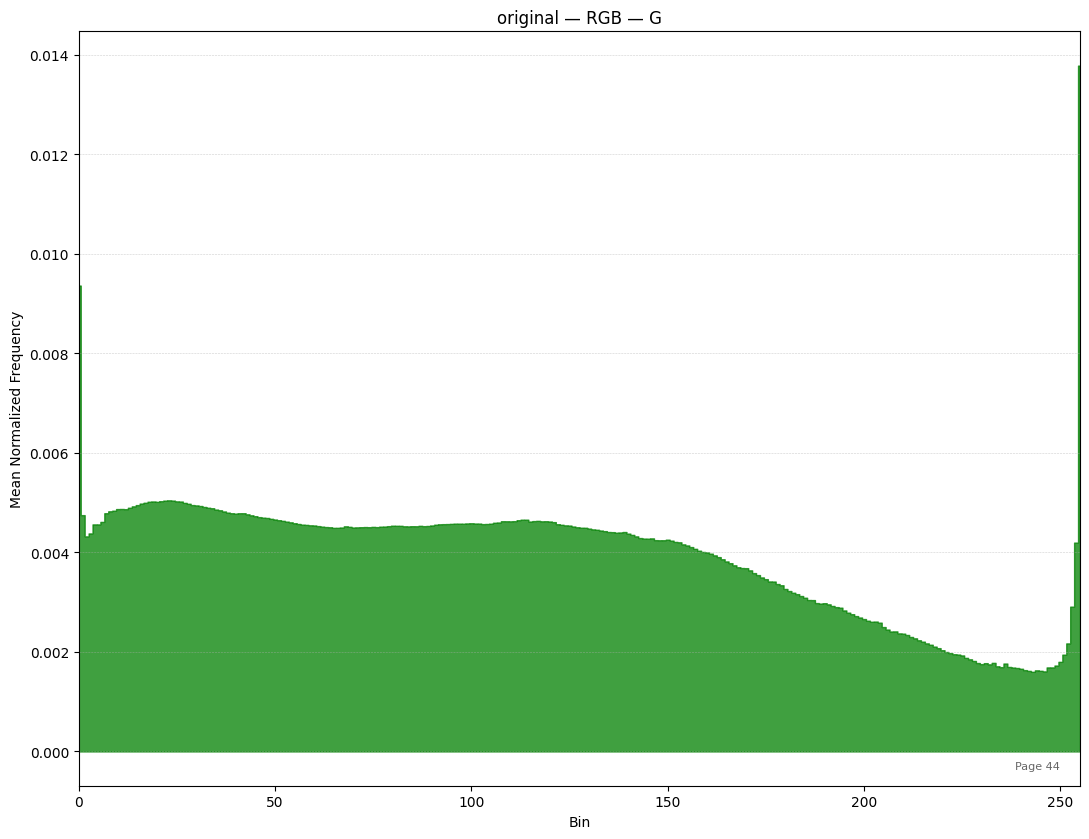

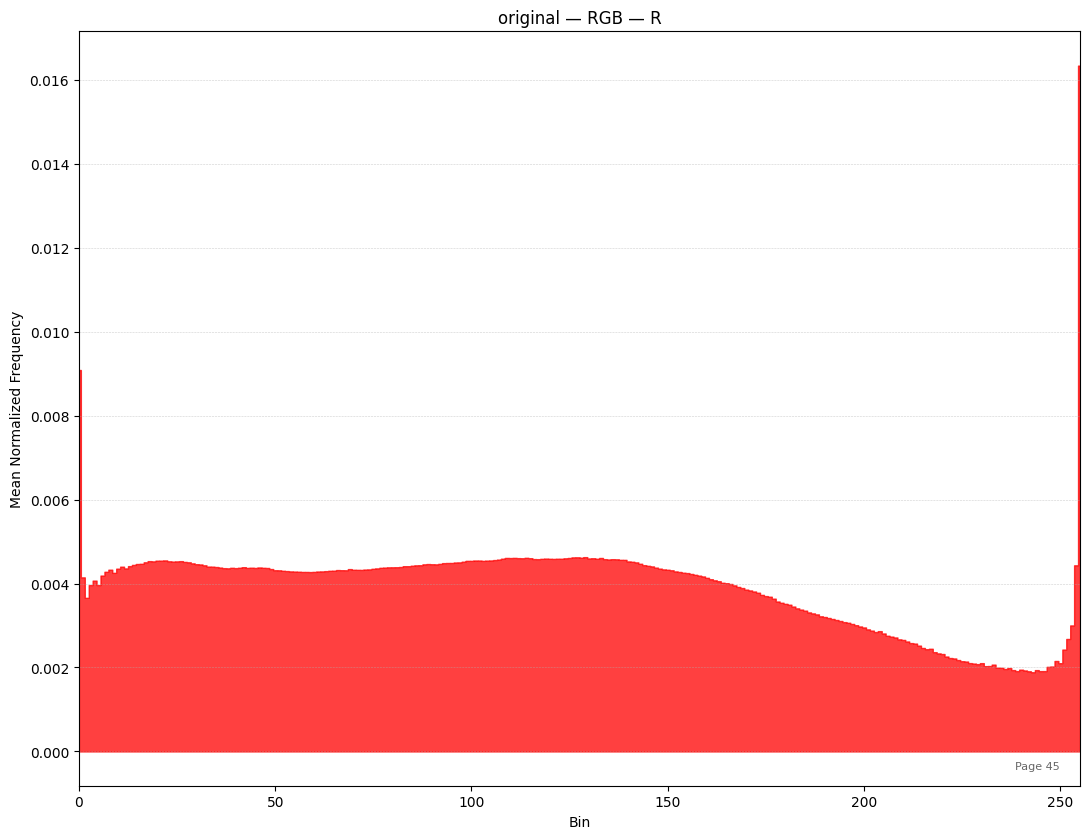

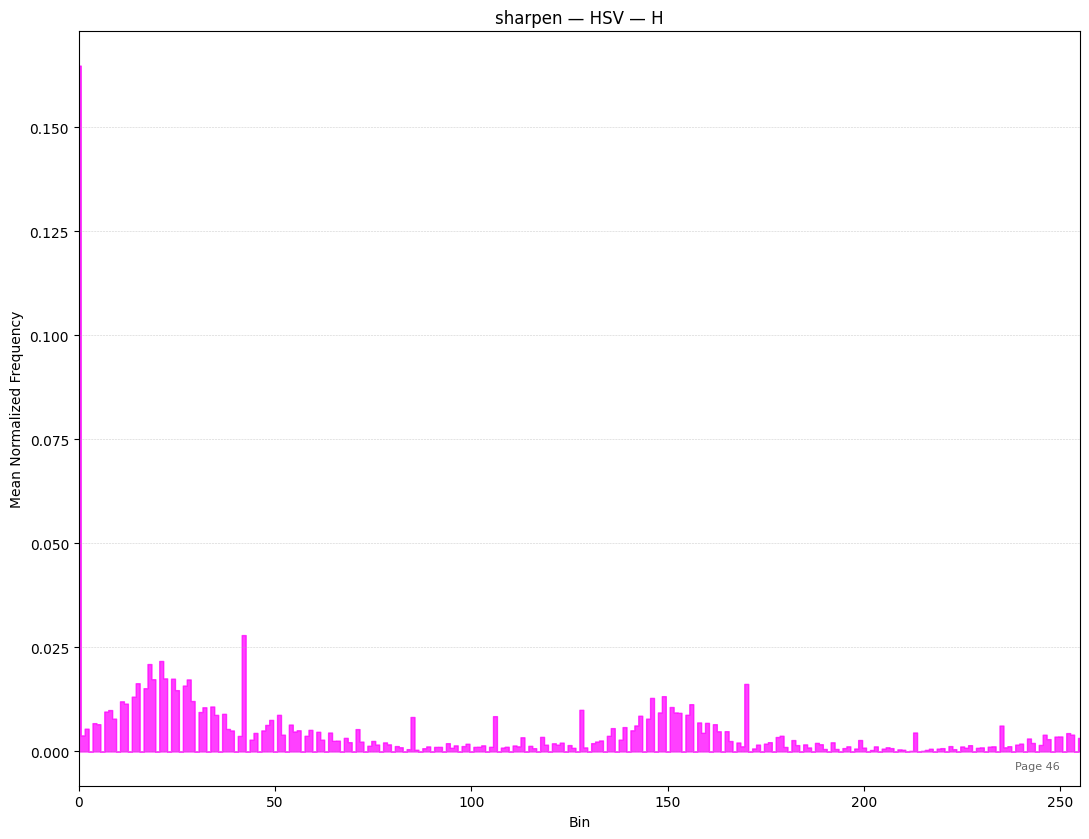

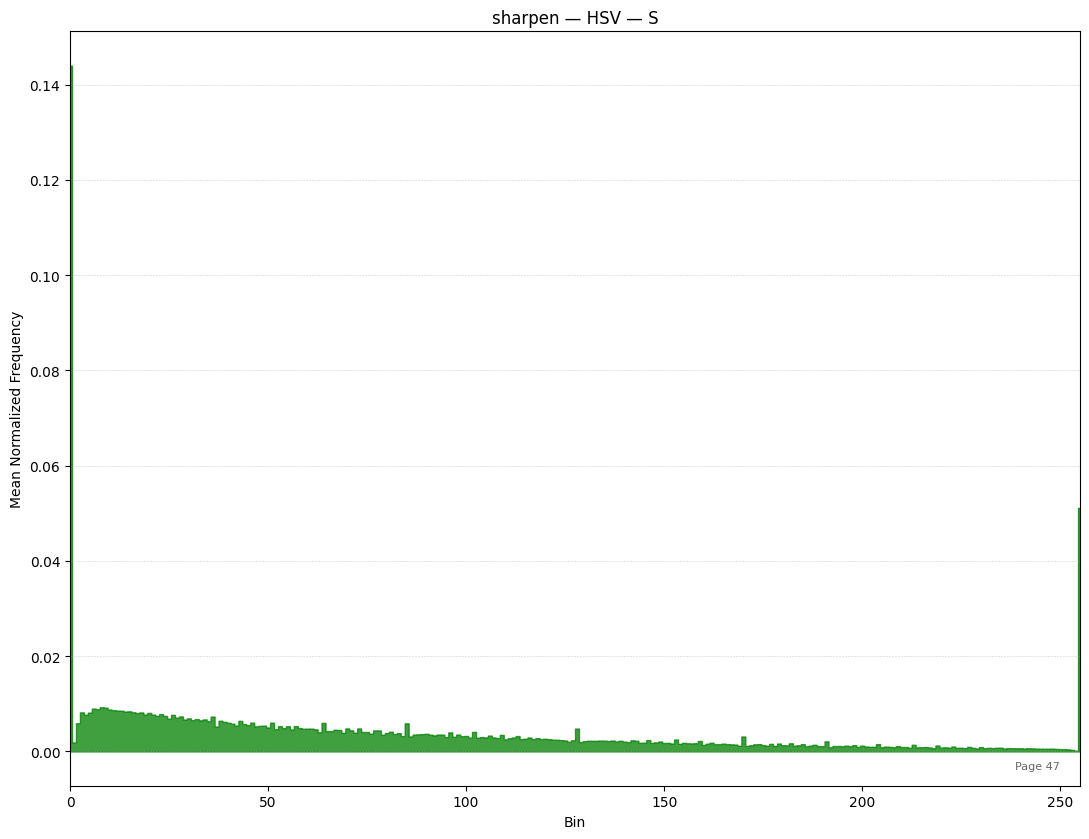

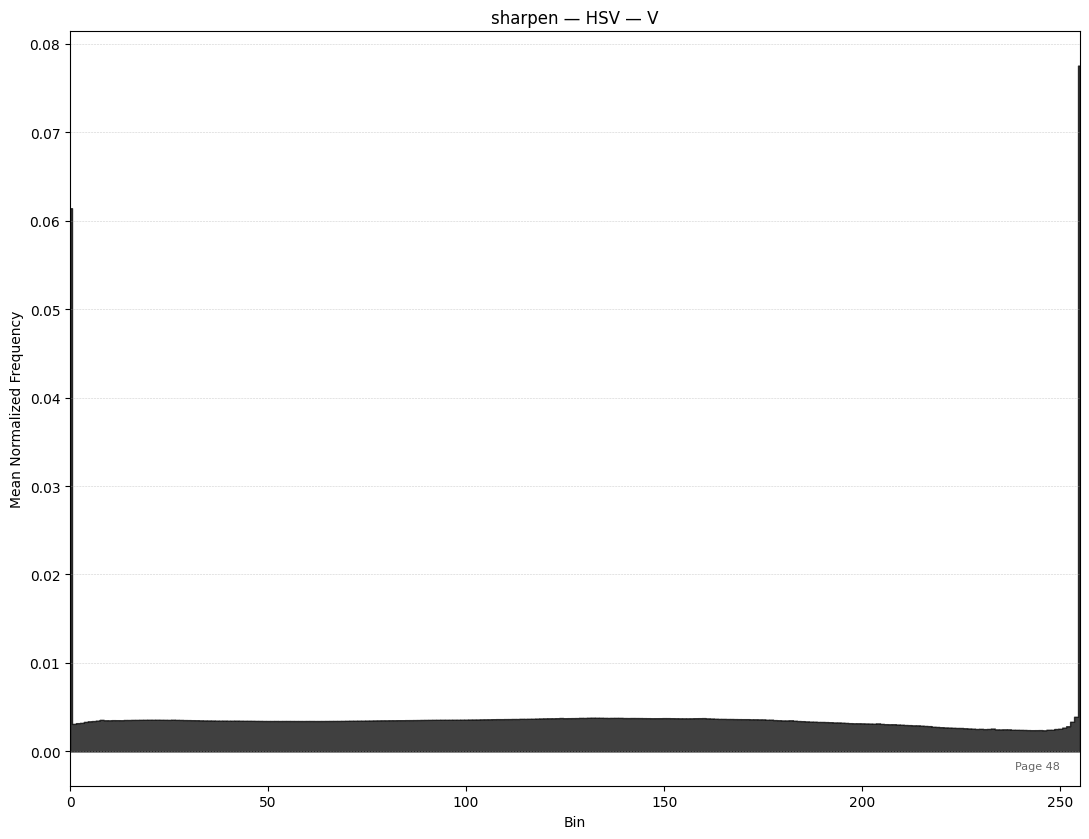

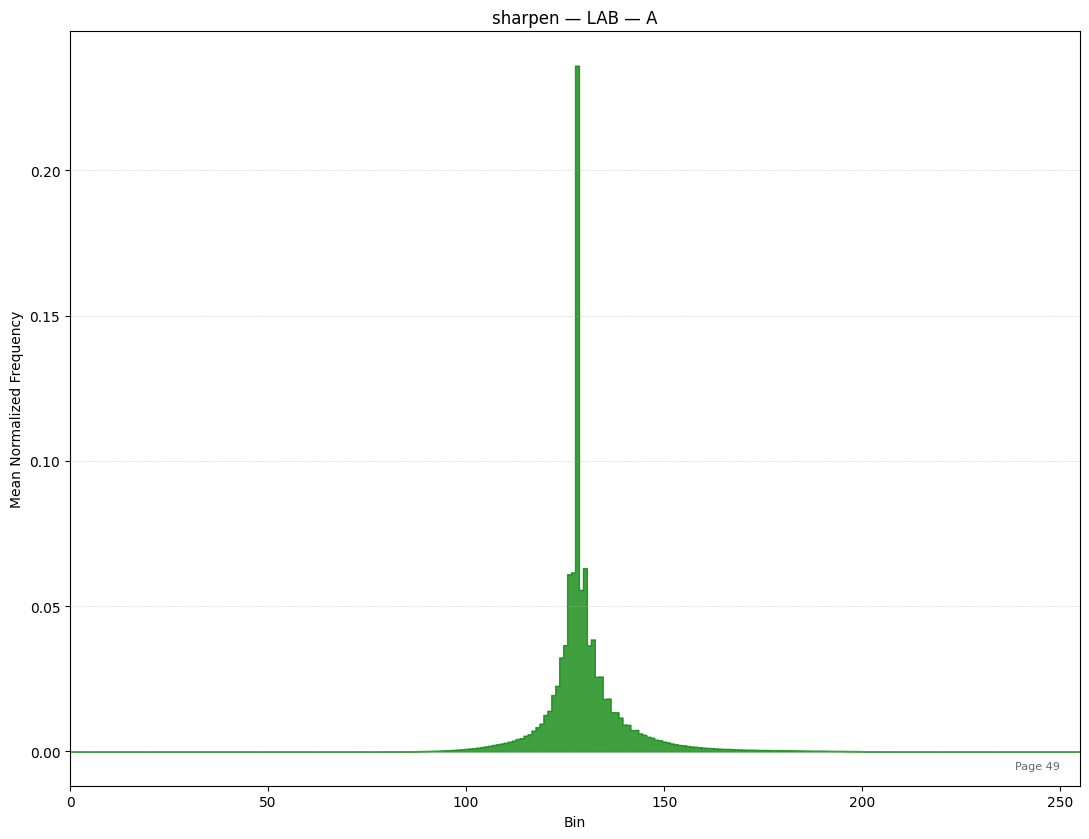

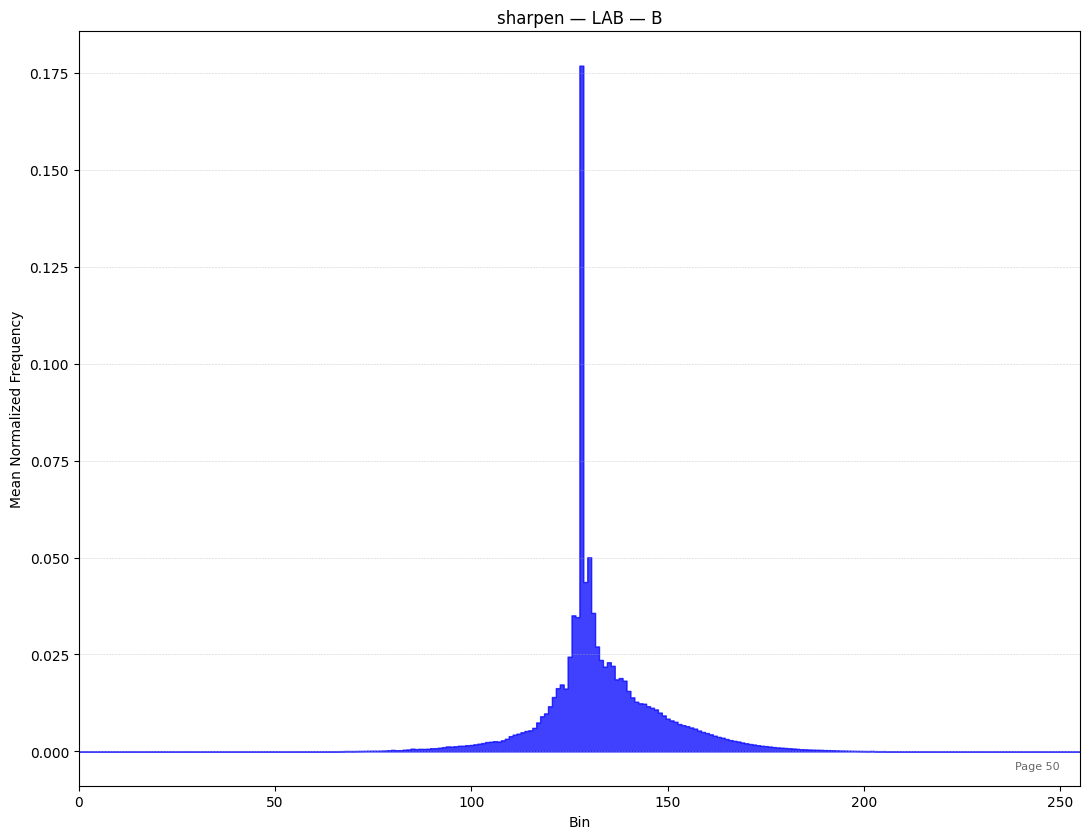

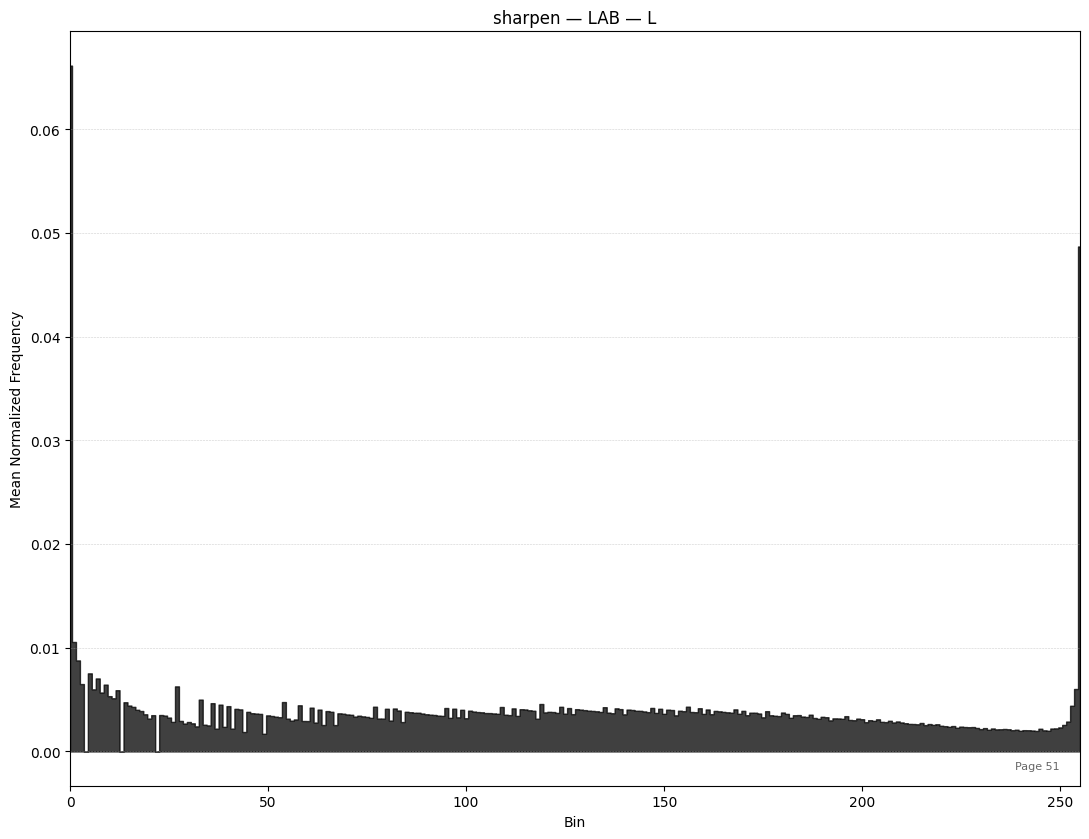

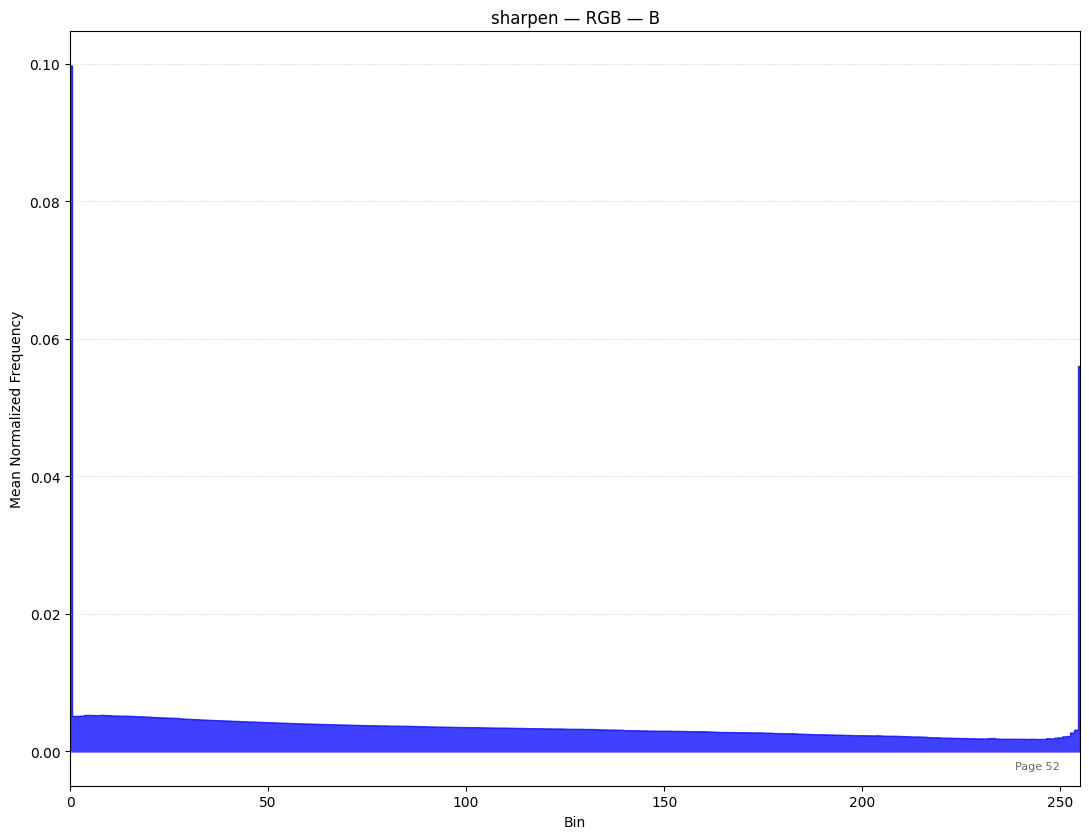

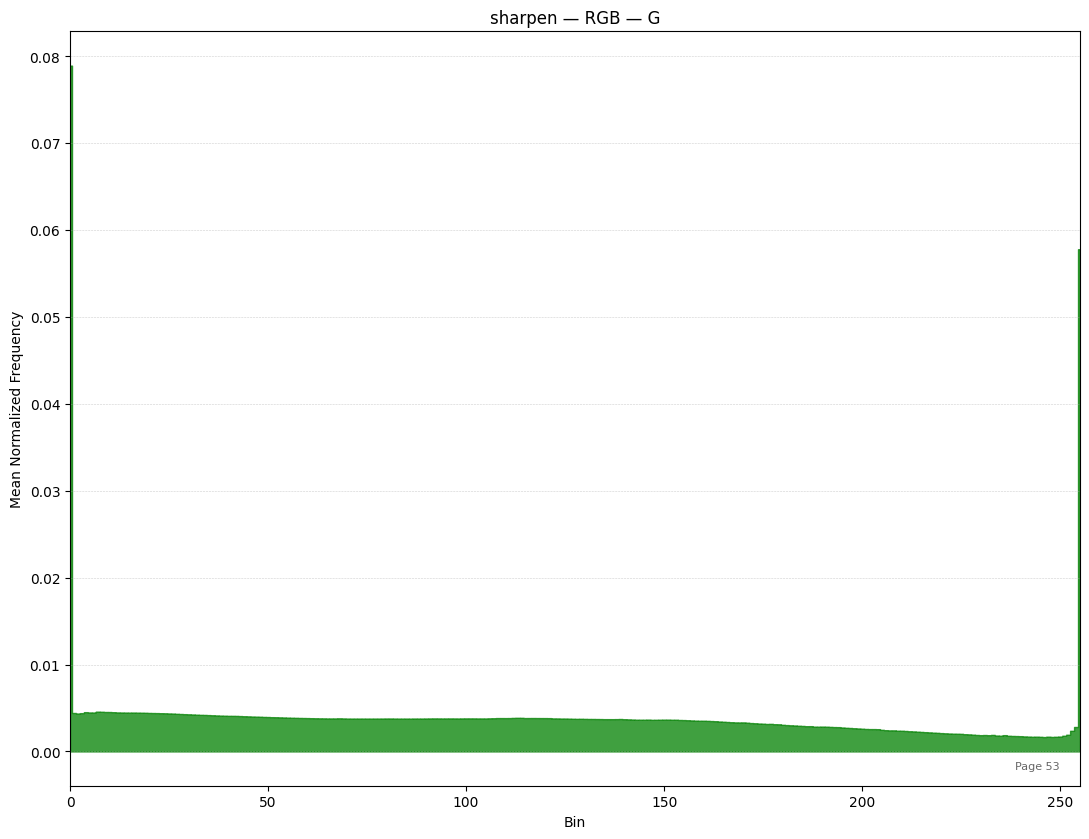

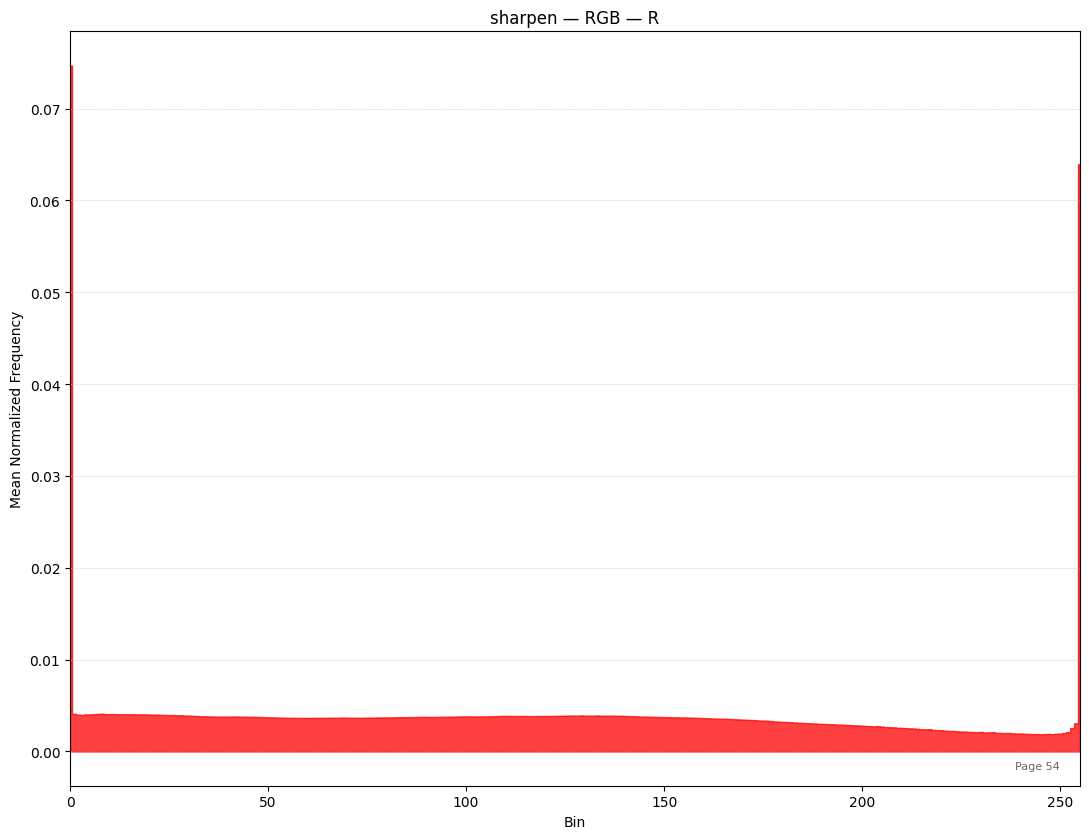

PDF saved: ./train_image_histograms.pdf
All done. Output files:
 - CSV: ./train_image_histograms.csv
 - PDF: ./train_image_histograms.pdf


In [ ]:
# ===================================
# 📌 Cell 7: Experiment 2.3 – Pre-processing (Equalization and Filters)
# # ===================================
# Before running: set FORCE_REGEN = True to force full re-scan even if CSV exists.
FORCE_REGEN = True     # <-- set True to force regeneration
ROOT = './'
IMG_DIR = os.path.join(ROOT, 'train', 'images')
CSV_PATH = os.path.join(ROOT, 'train_image_histograms.csv')
PDF_PATH = os.path.join(ROOT, 'train_image_histograms.pdf')
PROCESSED_DIR = os.path.join(ROOT, 'train', 'processed')


# Parameters (you can tweak)
GAMMA_VALUE = 0.6      # gamma used for gamma-correction step
GAUSSIAN_KSIZE = (5, 5)
SHARPEN_KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
BINS = 256

# Minimal imports (suppress non-critical warnings/logs)
import os, sys, math, traceback, warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # reduce TF/Keras logs if present

import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from collections import defaultdict

# --- small helper functions ---
def list_image_files(img_dir):
    exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp')
    files = []
    for root, _, filenames in os.walk(img_dir):
        for fn in filenames:
            if fn.lower().endswith(exts):
                files.append(os.path.join(root, fn))
    files.sort()
    return files

def apply_equalization(rgb_uint8):
    # RGB -> YCrCb, equalize Y channel, back to RGB
    ycrcb = cv2.cvtColor(rgb_uint8, cv2.COLOR_RGB2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)

def apply_gamma(rgb_uint8, gamma=GAMMA_VALUE):
    # s = c * r^gamma  ; build LUT
    lut = np.arange(256, dtype=np.float32) / 255.0
    lut = ((lut ** gamma) * 255.0).astype('uint8')
    return cv2.LUT(rgb_uint8, lut)

def apply_gaussian(rgb_uint8, ksize=GAUSSIAN_KSIZE):
    return cv2.GaussianBlur(rgb_uint8, ksize, 0)

def apply_sharpen(rgb_uint8, kernel=SHARPEN_KERNEL):
    return cv2.filter2D(rgb_uint8, -1, kernel)

def rgb_to_colorspaces(rgb_uint8):
    # returns dict of colorspace_name -> (3-channel uint8 np.array)
    out = {}
    out['RGB'] = rgb_uint8
    hsv = cv2.cvtColor(rgb_uint8, cv2.COLOR_RGB2HSV)  # H:0-179, S:0-255, V:0-255
    # Rescale Hue to 0-255 for consistent 256-bin histograms
    hsv_scaled = hsv.copy().astype(np.float32)
    hsv_scaled[:, :, 0] = (hsv_scaled[:, :, 0] * 255.0 / 179.0)
    hsv_scaled = np.clip(hsv_scaled, 0, 255).astype('uint8')
    out['HSV'] = hsv_scaled
    lab = cv2.cvtColor(rgb_uint8, cv2.COLOR_RGB2LAB)  # L,A,B all in 0-255
    out['LAB'] = lab
    return out

def compute_normalized_histogram(channel_flat):
    # channel_flat expected in 0..255 uint8
    hist = np.bincount(channel_flat, minlength=BINS)[:BINS].astype(np.float64)
    total = channel_flat.size if channel_flat.size>0 else 1
    hist = hist / float(total)
    return hist

# CSV header sample (for reference)
print("CSV schema (example header):")
print("operation,color_space,channel," + ",".join([f"bin_{i}" for i in range(BINS)]))
print()

# --- Step 1: File scan (preamble printed) ---
print(f"Preamble: scanning images in '{IMG_DIR}'. FORCE_REGEN={FORCE_REGEN}")
image_paths = list_image_files(IMG_DIR)
n_images_total = len(image_paths)
if n_images_total == 0:
    raise RuntimeError(f"No images found in {IMG_DIR} - aborting.")
print(f"Scan complete: found {n_images_total} image files.")  # one-line validation

# --- If cached CSV exists and not forced regeneration, try to load it ---
if (os.path.exists(CSV_PATH) and not FORCE_REGEN):
    try:
        df_cached = pd.read_csv(CSV_PATH)
        # quick validation: expected columns
        expected_prefix = {'operation', 'color_space', 'channel', 'bin_0'}
        if not expected_prefix.issubset(set(df_cached.columns[:4])):
            raise ValueError("CSV header doesn't match expected schema.")
        print(f"Loaded cached CSV '{CSV_PATH}' — skipping image scan and histogram recompute.")  # validation
        df_hist = df_cached
    except Exception as e:
        print(f"Warning: cached CSV appears corrupt or unreadable: {e}. Will regenerate from scratch.")
        df_hist = None
else:
    df_hist = None

# If df_hist is None -> we must compute from images
if df_hist is None:
    # Prepare accumulation structures
    operations = ['original', 'equalized', 'gamma', 'gaussian', 'sharpen', 'all']
    color_spaces = ['RGB', 'HSV', 'LAB']
    channels_map = {
        'RGB': ['R', 'G', 'B'],
        'HSV': ['H', 'S', 'V'],
        'LAB': ['L', 'A', 'B']
    }
    # accumulator: key -> sum histogram (length 256)
    accum = defaultdict(lambda: np.zeros(BINS, dtype=np.float64))
    images_processed = 0
    unreadable_files = 0
    # per-op processing counters for 10% step messages
    op_counts = {op: 0 for op in operations}
    op_next_threshold = {op: 10 for op in operations}  # next percent to announce

    # single updating progress line
    def print_progress(processed, total):
        pct = (processed / float(total)) * 100.0 if total>0 else 100.0
        sys.stdout.write(f"\rProgress: {pct:5.1f}% scanned")
        sys.stdout.flush()

    # iterate images
    for img_idx, img_path in enumerate(image_paths, start=1):
        try:
            with Image.open(img_path) as im:
                im = im.convert('RGB')
                rgb = np.array(im, dtype=np.uint8)
        except Exception as e:
            unreadable_files += 1
            print(f"\nWarning: unreadable file '{img_path}' (skipping).")
            continue

        # ensure shape HxWx3 uint8
        if rgb.ndim != 3 or rgb.shape[2] != 3:
            # convert forcibly
            rgb = np.dstack([rgb]*3).astype(np.uint8)

        # create all operation variants
        try:
            ops_images = {}
            ops_images['original'] = rgb.copy()
            ops_images['equalized'] = apply_equalization(rgb.copy())
            ops_images['gamma'] = apply_gamma(rgb.copy(), gamma=GAMMA_VALUE)
            ops_images['gaussian'] = apply_gaussian(rgb.copy(), ksize=GAUSSIAN_KSIZE)
            ops_images['sharpen'] = apply_sharpen(rgb.copy(), kernel=SHARPEN_KERNEL)
            # all: equalize -> gamma -> gaussian -> sharpen
            img_all = apply_equalization(rgb.copy())
            img_all = apply_gamma(img_all, gamma=GAMMA_VALUE)
            img_all = apply_gaussian(img_all, ksize=GAUSSIAN_KSIZE)
            img_all = apply_sharpen(img_all, kernel=SHARPEN_KERNEL)
            ops_images['all'] = img_all
        except Exception as e:
            print(f"\nWarning: processing error for '{img_path}': {e} (skipping file).")
            continue

        # --- Save processed images in separate folders ---
        img_name = os.path.basename(img_path)
        # For each operation produced, convert to color spaces and compute histograms per channel
        for op_name, img_rgb in ops_images.items():
            # Save images
            op_dir = os.path.join(PROCESSED_DIR, op_name)
            os.makedirs(op_dir, exist_ok=True)
            out_path = os.path.join(op_dir, img_name)
            try:
                Image.fromarray(img_rgb).save(out_path)
            except Exception as e:
                print(f"\nWarning: could not save '{out_path}': {e}")
            # convert to colorspaces
            cs_dict = rgb_to_colorspaces(img_rgb)
            for cs_name, cs_img in cs_dict.items():
                # cs_img is HxWx3 uint8
                H, W = cs_img.shape[:2]
                num_pixels = H * W
                # iterate channels
                channel_names = channels_map[cs_name]
                for ch_idx, ch_name in enumerate(channel_names):
                    channel_flat = cs_img[:, :, ch_idx].ravel()
                    hist_norm = compute_normalized_histogram(channel_flat)
                    accum[(op_name, cs_name, ch_name)] += hist_norm

            # update per-op counters and emit 10% steps as required
            op_counts[op_name] += 1
            pct_op = int((op_counts[op_name] / float(n_images_total)) * 100.0)
            while op_next_threshold[op_name] <= 100 and pct_op >= op_next_threshold[op_name]:
                print(f"\nOperation '{op_name}' — {op_next_threshold[op_name]}% completed")
                op_next_threshold[op_name] += 10

        images_processed += 1
        # update single-line global progress
        print_progress(images_processed, n_images_total)

    # finish progress line
    sys.stdout.write("\n")
    print(f"File scan + processing complete. Images processed: {images_processed}. Unreadable/skipped: {unreadable_files}.")
    if images_processed == 0:
        raise RuntimeError("No images could be processed successfully. Aborting.")

    # compute mean histograms (divide by images_processed)
    rows = []
    for key, hist_sum in accum.items():
        op_name, cs_name, ch_name = key
        mean_hist = hist_sum / float(images_processed)
        row = {
            'operation': op_name,
            'color_space': cs_name,
            'channel': ch_name
        }
        for b in range(BINS):
            row[f'bin_{b}'] = float(mean_hist[b])
        rows.append(row)

    df_hist = pd.DataFrame(rows)
    # sort rows for consistent ordering
    df_hist = df_hist.sort_values(['operation', 'color_space', 'channel']).reset_index(drop=True)

    # Save CSV
    try:
        df_hist.to_csv(CSV_PATH, index=False)
        print(f"CSV saved: {CSV_PATH}")  # one-line validation
    except Exception as e:
        print(f"Error saving CSV '{CSV_PATH}': {e}")
        raise

# --- Step: Generate PDF plots and display ---
# Color mapping for plotting
color_map = {
    'RGB': {'R': 'red',   'G': 'green', 'B': 'blue'},
    'HSV': {'H': 'magenta','S': 'green','V': 'black'},
    'LAB': {'L': 'black', 'A': 'green', 'B': 'blue'}
}

# Using PdfPages to create a multi-page landscape PDF
with PdfPages(PDF_PATH) as pdf:
    # iterate rows in desired order
    for idx, row in df_hist.iterrows():
        op = row['operation']
        cs = row['color_space']
        ch = row['channel']
        # collect bins
        bins_vals = np.array([row[f'bin_{i}'] for i in range(BINS)], dtype=np.float64)
        x = np.arange(BINS)

        fig = plt.figure(figsize=(11.0, 8.5))  # landscape
        ax = fig.add_subplot(111)
        # filled bar / area - use fill_between for smooth area plot
        ax.fill_between(x, bins_vals, step='mid', alpha=0.75, color=color_map.get(cs, {}).get(ch, 'gray'))
        ax.set_xlim(0, BINS-1)
        ax.set_xlabel('Bin')
        ax.set_ylabel('Mean Normalized Frequency')
        title = f"{op} — {cs} — {ch}"
        ax.set_title(title)
        ax.grid(axis='y', linestyle='--', linewidth=0.4, alpha=0.6)
        # page number in bottom-right
        ax.annotate(f"Page {idx+1}", xy=(0.98, 0.02), xycoords='axes fraction', ha='right', va='bottom', fontsize=8, alpha=0.6)
        plt.tight_layout()
        pdf.savefig(fig)
        plt.show()
        plt.close(fig)

print(f"PDF saved: {PDF_PATH}")  # one-line validation
print("All done. Output files:")
print(f" - CSV: {CSV_PATH}")
print(f" - PDF: {PDF_PATH}")


In [ ]:
# ===================================
# 📌 Cell 8: Feature extraction, PCA and plotting
# ===================================
# Requirements:
# - Keep other cells unchanged (this cell assumes previous cells set up environment & cwd)
# - Uses only: numpy, skimage, sklearn, cv2, matplotlib, pandas, torch, keras, ultralytics (plus stdlib)
# - Produces: image_class_scan.csv, scan_errors.log, pca_feature_analysis.pdf
# - FORCE_RESCAN controls whether scanning is re-run
# - Prints single-line phase messages; prints progress at each 10% during dataset scan
# - Shows plots (matplotlib.show()) and saves them to a single landscape PDF (one plot per page)
# - Multi-class images produce separate feature instances per (image, class)
# - Assumes data.yaml exists in root and maps numeric indices to class names
# - Suppresses noisy library outputs and warnings
# ===================================

import os
import sys
import glob
import csv
import math
import warnings
from collections import defaultdict
from datetime import datetime

import numpy as np
import pandas as pd
import cv2
from skimage import color, feature, exposure
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 for 3D projection

# ---------------------------
# Config
# ---------------------------
FORCE_RESCAN = False  # Change to True to force a fresh scan
ROOT = '.'  # dataset root
TRAIN_IMG_DIR = os.path.join(ROOT, 'train', 'images')
VALID_IMG_DIR = os.path.join(ROOT, 'valid', 'images')
TRAIN_LABEL_DIR = os.path.join(ROOT, 'train', 'labels')
VALID_LABEL_DIR = os.path.join(ROOT, 'valid', 'labels')
DATA_YAML = os.path.join(ROOT, 'data.yaml')

SCAN_CSV = os.path.join(ROOT, 'image_class_scan.csv')
SCAN_LOG = os.path.join(ROOT, 'scan_errors.log')
PDF_OUT = os.path.join(ROOT, 'pca_feature_analysis.pdf')

# Feature params
HSV_BINS = (8, 8, 4)  # H, S, V bins
LBP_P = 8
LBP_R = 1
HOG_PIXELS_PER_CELL = (16, 16)
HOG_CELLS_PER_BLOCK = (2, 2)
HOG_ORIENTATIONS = 9
RESIZE_FOR_HOG = (256, 256)  # resize for consistent HOG size

# Suppress warnings and noisy output
warnings.filterwarnings('ignore')

# ---------------------------
# Utility functions
# ---------------------------
def read_data_yaml(path):
    """
    Read simple data.yaml mapping lines like "0: aeroplane" -> {0: 'aeroplane'}
    If not present or parse error, returns empty dict.
    """
    mapping = {}
    if not os.path.isfile(path):
        return mapping
    try:
        with open(path, 'r', encoding='utf-8') as f:
            for line in f:
                line = line.strip()
                if not line or line.startswith('#'):
                    continue
                # accept "0: aeroplane" or "0: 'aeroplane'"
                if ':' in line:
                    k, v = line.split(':', 1)
                    k = k.strip()
                    v = v.strip().strip("'\"")
                    if k.isdigit():
                        mapping[int(k)] = v
    except Exception:
        pass
    return mapping

def parse_label_file(label_path):
    """
    Parse label file format:
    Each line: <class_index> x1 y1 x2 y2 x3 y3 x4 y4
    Return list of class indices found (ints). Duplicate class indices allowed if multiple boxes.
    """
    classes = []
    try:
        with open(label_path, 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                try:
                    cls = int(parts[0])
                    classes.append(cls)
                except Exception:
                    continue
    except Exception:
        pass
    return classes

def compute_hsv_hist(image_bgr, bins=HSV_BINS):
    """
    Compute a concatenated normalized histogram for HSV (flattened).
    image_bgr: OpenCV BGR image
    """
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
    # compute histogram for each channel then normalize and concat
    h, s, v = cv2.split(image_hsv)
    hist_h = np.histogram(h, bins=bins[0], range=(0, 180))[0].astype(np.float32)
    hist_s = np.histogram(s, bins=bins[1], range=(0, 256))[0].astype(np.float32)
    hist_v = np.histogram(v, bins=bins[2], range=(0, 256))[0].astype(np.float32)
    hist = np.concatenate([hist_h, hist_s, hist_v])
    # L1 normalize
    s = hist.sum()
    if s > 0:
        hist /= s
    return hist

def compute_lbp(image_gray, P=LBP_P, R=LBP_R):
    """
    Compute histogram of LBP features (uniform)
    """
    lbp = feature.local_binary_pattern(image_gray, P, R, method='uniform')
    # number of bins for 'uniform' is P + 2
    n_bins = P + 2
    hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    hist = hist.astype(np.float32)
    s = hist.sum()
    if s > 0:
        hist /= s
    return hist

def compute_hog(image_gray, pixels_per_cell=HOG_PIXELS_PER_CELL, cells_per_block=HOG_CELLS_PER_BLOCK, orientations=HOG_ORIENTATIONS):
    """
    Compute HOG descriptor using skimage.feature.hog.
    Returns feature vector (float32).
    """
    # ensure image is of size RESIZE_FOR_HOG (consistent)
    img_resized = cv2.resize(image_gray, RESIZE_FOR_HOG, interpolation=cv2.INTER_AREA)
    hog_vec = feature.hog(img_resized,
                          orientations=orientations,
                          pixels_per_cell=pixels_per_cell,
                          cells_per_block=cells_per_block,
                          block_norm='L2-Hys',
                          feature_vector=True)
    return hog_vec.astype(np.float32)

def single_line_status(msg):
    """Print single line status (overwrite)."""
    sys.stdout.write('\r' + msg)
    sys.stdout.flush()

# ---------------------------
# Phase 1: Scan dataset
# ---------------------------
print("Scanning dataset (building CSV and logging mismatches)...")  # single-line phase message

# Optionally reuse CSV
if os.path.isfile(SCAN_CSV) and (not FORCE_RESCAN):
    # Validate header minimal presence
    try:
        df_existing = pd.read_csv(SCAN_CSV)
        if set(['image_path','set','class_indices','class_names']).issubset(df_existing.columns):
            print("Scan CSV exists and FORCE_RESCAN=False — reusing existing CSV.")
            df_scan = df_existing.sort_values(by='image_path').reset_index(drop=True)
        else:
            raise ValueError("CSV missing required columns — rescanning.")
    except Exception:
        print("Existing CSV invalid — performing fresh scan.")
        FORCE = True
        df_scan = None
else:
    df_scan = None

if df_scan is None:
    # perform scan
    image_entries = []  # rows for CSV later
    errors = []
    # collect all image paths
    sets = [('train', TRAIN_IMG_DIR, TRAIN_LABEL_DIR), ('valid', VALID_IMG_DIR, VALID_LABEL_DIR)]
    # gather file lists and ensure deterministic alphabetical order
    all_pairs = []
    for set_name, img_dir, lbl_dir in sets:
        if not os.path.isdir(img_dir):
            errors.append(f"Missing image directory: {img_dir}")
            continue
        img_files = sorted(glob.glob(os.path.join(img_dir, '*')))
        for img_path in img_files:
            # skip non-files
            if not os.path.isfile(img_path):
                continue
            base = os.path.splitext(os.path.basename(img_path))[0]
            label_path = os.path.join(lbl_dir, base + '.txt')
            all_pairs.append((img_path, label_path, set_name))
    total = len(all_pairs)
    if total == 0:
        raise RuntimeError("No image files found in train/valid images directories.")
    # progress thresholds at each 10%
    next_pct = 0.1
    for idx, (img_path, label_path, set_name) in enumerate(all_pairs, start=1):
        # update progress at each 10%
        frac = idx / total
        if frac >= next_pct - 1e-9:
            pct = int(next_pct * 100)
            single_line_status(f"Scan progress: {pct}% ({idx}/{total})")
            next_pct += 0.1
        # check existence
        if not os.path.isfile(img_path):
            errors.append(f"Missing image for: {label_path}")
            continue
        if not os.path.isfile(label_path):
            errors.append(f"Missing label for: {img_path}")
            continue
        # parse label
        classes = parse_label_file(label_path)
        if not classes:
            # no classes found; still include row with empty classes?
            # Specification: skip missing image/label only. Keep images with empty labels?
            # We'll skip rows with zero classes (common in some splits).
            errors.append(f"No classes found in label: {label_path}")
            continue
        # map to names will be filled later
        image_entries.append({'image_path': os.path.relpath(img_path, ROOT).replace('\\','/'),
                              'set': set_name,
                              'class_indices': ','.join(str(c) for c in classes)})
    # ensure final status printed as 100%
    single_line_status(f"Scan progress: 100% ({total}/{total})\n")
    # Load class names from data.yaml
    class_map = read_data_yaml(DATA_YAML)
    rows = []
    for e in image_entries:
        cls_indices = [int(x) for x in e['class_indices'].split(',') if x.strip()!='']
        cls_names = [class_map.get(ci, str(ci)) for ci in cls_indices]
        rows.append({'image_path': e['image_path'],
                     'set': e['set'],
                     'class_indices': ','.join(str(ci) for ci in cls_indices),
                     'class_names': ','.join(cls_names)})
    # build dataframe and sort alphabetically by image filename
    df_scan = pd.DataFrame(rows)
    if df_scan.shape[0] > 0:
        df_scan = df_scan.sort_values(by='image_path').reset_index(drop=True)
    # write csv and log
    df_scan.to_csv(SCAN_CSV, index=False)
    with open(SCAN_LOG, 'w', encoding='utf-8') as flog:
        for err in errors:
            flog.write(err + '\n')
    print(f"Scan complete. CSV rows: {len(df_scan)}. Errors logged: {len(errors)}.")

# Simple validation of scan
if df_scan.shape[0] == 0:
    raise RuntimeError("Scan produced zero valid image rows. Check dataset and label formatting.")
else:
    print(f"Verified scan: {len(df_scan)} image rows available for processing.")

# ---------------------------
# Phase 2: Feature extraction per (image, class) instance
# ---------------------------
print("Extracting descriptors (HSV hist, LBP, HOG) for each (image, class) instance...")

# We'll create:
# - feature_list: list of feature vectors (np.ndarray)
# - meta_list: list of dicts with keys: image_path, set, class_index, class_name
feature_list = []
meta_list = []

# Iterate through df_scan rows
nrows = df_scan.shape[0]
next_pct = 0.1
for i, row in df_scan.iterrows():
    frac = (i+1)/nrows
    if frac >= next_pct - 1e-9:
        pct = int(next_pct * 100)
        single_line_status(f"Feature extraction progress: {pct}% ({i+1}/{nrows})")
        next_pct += 0.1
    img_rel = row['image_path']
    set_name = row['set']
    img_path = os.path.join(ROOT, img_rel)
    # read image with cv2 (BGR)
    img = cv2.imread(img_path)
    if img is None:
        # log and skip
        with open(SCAN_LOG, 'a', encoding='utf-8') as flog:
            flog.write(f"Failed to read image: {img_path}\n")
        continue
    # prepare grayscale for LBP and HOG
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # compute HSV hist
    hsv_hist = compute_hsv_hist(img, bins=HSV_BINS)
    # compute LBP hist
    lbp_hist = compute_lbp(img_gray, P=LBP_P, R=LBP_R)
    # compute HOG vec
    hog_vec = compute_hog(img_gray)
    # combine features into single vector
    feat = np.concatenate([hsv_hist.astype(np.float32), lbp_hist.astype(np.float32), hog_vec.astype(np.float32)])
    # For each class in this image, create a separate instance
    class_indices = [int(x) for x in str(row['class_indices']).split(',') if x.strip()!='']
    class_names = [x for x in str(row['class_names']).split(',') if x.strip()!='']
    # if mismatch in lengths, compute names from map
    if len(class_names) != len(class_indices):
        class_map = read_data_yaml(DATA_YAML)
        class_names = [class_map.get(ci, str(ci)) for ci in class_indices]
    for ci, cname in zip(class_indices, class_names):
        feature_list.append(feat)
        meta_list.append({'image_path': img_rel, 'set': set_name, 'class_index': int(ci), 'class_name': cname})
# finalize status
single_line_status(f"Feature extraction progress: 100% ({len(feature_list)} instances)\n")
print(f"Feature extraction complete. Instances: {len(feature_list)}. Feature vector length: {feature_list[0].shape[0] if feature_list else 0}")

# Validate features non-empty
if len(feature_list) == 0:
    raise RuntimeError("No features extracted. Aborting.")

# Convert to arrays and create DataFrame for meta
X = np.vstack(feature_list).astype(np.float32)
meta_df = pd.DataFrame(meta_list)

# ---------------------------
# Phase 3: PCA and plotting (2D & 3D) for train and valid separately
# ---------------------------
print("Performing PCA and plotting (2D and 3D) for train and valid sets...")

# Create PDF multipage (landscape). Each plot will be one page.
pdf = PdfPages(PDF_OUT)

# Determine unique classes and assign colors (matplotlib colormap)
unique_classes = sorted(meta_df['class_index'].unique())
class_to_name = {int(r['class_index']): r['class_name'] for _, r in meta_df.drop_duplicates(['class_index']).iterrows()}
# Use a colormap (tab20 or similar) - matplotlib default allowed
cmap = plt.get_cmap('tab20')
color_map = {ci: cmap(i % 20) for i, ci in enumerate(unique_classes)}

def plot_2d(ax, points, labels, title):
    ax.scatter(points[:,0], points[:,1], s=12, alpha=0.8, c=[color_map[l] for l in labels], linewidths=0)
    # annotate class centroids
    for ci in unique_classes:
        idxs = [i for i,l in enumerate(labels) if l==ci]
        if len(idxs)==0: continue
        centroid = points[idxs,:].mean(axis=0)
        ax.text(centroid[0], centroid[1], class_to_name.get(ci,str(ci)), fontsize=8, weight='bold')
    ax.set_title(title)
    ax.grid(True)

def plot_3d(ax, points, labels, title):
    for ci in unique_classes:
        idxs = [i for i,l in enumerate(labels) if l==ci]
        if len(idxs)==0: continue
        ax.scatter(points[idxs,0], points[idxs,1], points[idxs,2], s=10, alpha=0.8, label=class_to_name.get(ci,str(ci)))
    ax.set_title(title)
    ax.legend(fontsize='small', loc='best', ncol=2)
    ax.grid(True)

# process each set
for set_name in ['train', 'valid']:
    # collect indices for this set
    idxs = meta_df.index[meta_df['set'] == set_name].tolist()
    if not idxs:
        print(f"No instances found for set '{set_name}' — skipping PCA/plotting for this set.")
        continue
    X_set = X[idxs, :]
    labels_set = meta_df.loc[idxs, 'class_index'].astype(int).tolist()
    # 2D PCA
    print(f"Performing 2D PCA on {set_name} set...")
    pca2 = PCA(n_components=2, random_state=42)
    X2 = pca2.fit_transform(X_set)
    # 3D PCA
    print(f"Performing 3D PCA on {set_name} set...")
    pca3 = PCA(n_components=3, random_state=42)
    X3 = pca3.fit_transform(X_set)
    # Plot 2D
    fig = plt.figure(figsize=(11,8.5))  # landscape
    ax = fig.add_subplot(1,1,1)
    plot_2d(ax, X2, labels_set, title=f'PCA 2D - {set_name}')
    plt.tight_layout()
    plt.show()
    pdf.savefig(fig)
    plt.close(fig)
    # Plot 3D
    fig = plt.figure(figsize=(11,8.5))
    ax = fig.add_subplot(111, projection='3d')
    plot_3d(ax, X3, labels_set, title=f'PCA 3D - {set_name}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.tight_layout()
    plt.show()
    pdf.savefig(fig)
    plt.close(fig)
    print(f"PCA and plotting for set '{set_name}' complete. 2D/3D pages added to PDF.")

# finalize PDF
pdf.close()
print(f"PCA plotting complete. PDF saved at: {PDF_OUT}")

# ---------------------------
# Final validations & summary
# ---------------------------
# Validate CSV and PDF existence
csv_ok = os.path.isfile(SCAN_CSV)
pdf_ok = os.path.isfile(PDF_OUT)
if csv_ok and pdf_ok:
    print(f"All done. Outputs:\n- {SCAN_CSV}\n- {SCAN_LOG}\n- {PDF_OUT}")
else:
    missing = []
    if not csv_ok: missing.append(SCAN_CSV)
    if not pdf_ok: missing.append(PDF_OUT)
    raise RuntimeError("Missing expected outputs: " + ", ".join(missing))


Scanning dataset (building CSV and logging mismatches)...
Scan progress: 100% (17112/17112)
Scan complete. CSV rows: 16601. Errors logged: 511.
Verified scan: 16601 image rows available for processing.
Extracting descriptors (HSV hist, LBP, HOG) for each (image, class) instance...
Feature extraction progress: 100% (39191 instances)
Feature extraction complete. Instances: 39191. Feature vector length: 8130
Performing PCA and plotting (2D and 3D) for train and valid sets...
Performing 2D PCA on train set...
Performing 3D PCA on train set...
